# Analisi Dati - Questionario sul Medioevo
Questo notebook analizza i dati del questionario sulla percezione del medioevo.

**Contenuti:**
1. Caricamento dati e preprocessing
2. Conversione variabili categoriche in numeriche
3. Analisi preliminari (statistiche descrittive, correlazioni, distribuzioni)
4. Sistema interattivo di filtri per cross-tabulation

## 1. Load & Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Impostazioni grafiche
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Caricamento dati
df = pd.read_csv('risposte.csv')

print(f"Dimensioni dataset: {df.shape[0]} righe x {df.shape[1]} colonne")
print(f"\nColonne disponibili:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Dimensioni dataset: 349 righe x 45 colonne

Colonne disponibili:
1. Informazioni cronologiche
2. Sesso
3. Quanti anni compi nell'anno corrente 2025?
4. Qual è l'ultimo titolo di studi che hai conseguito?
5. Hai mai frequentato un corso universitario o accademico che trattava anche solo in parte di storia medievale?
6. Regione
7. Provincia (sigla)
8. Con quali modalità ti informi sul medioevo?
9. Qual è la tua opinione generale sul medioevo? [Medioevo]
10. Indica la data o il secolo in cui secondo te inizia il medioevo
11. Perché? Inizio
12. Indica la data o il secolo in cui secondo te finisce il medioevo
13. Perché?  Fine
14.  [Feudalesimo]
15. [Superstizione]
16. [Germanico]
17. [Eroico]
18. [Comunale]
19. [Sperimentazione]
20. [Cristiano]
21. [Oscurantismo]
22. [Rinascita]
23. [Decadenza]
24. Quali di questi termini associ più fortemente con la tua idea di medioevo? (Max 5 risposte)
25. [Federico II di Svevia]
26. [Teodorico]
27. [Lorenzo il Magnifico]
28. [Costantino]
29. [Petrarca]

In [3]:
# Visualizza prime righe e info sui tipi di dati
print("Prime 3 righe del dataset:")
display(df.head(3))
print(f"\nInfo sui tipi di dati:")
print(df.dtypes)

Prime 3 righe del dataset:


,Informazioni cronologiche,Sesso,Quanti anni compi nell'anno corrente 2025?,Qual è l'ultimo titolo di studi che hai conseguito?,Hai mai frequentato un corso universitario o accademico che trattava anche solo in parte di storia medievale?,Regione,Provincia (sigla),Con quali modalità ti informi sul medioevo?,Qual è la tua opinione generale sul medioevo? [Medioevo],Indica la data o il secolo in cui secondo te inizia il medioevo,Perché? Inizio,Indica la data o il secolo in cui secondo te finisce il medioevo,Perché? Fine,[Feudalesimo],[Superstizione],[Germanico],[Eroico],[Comunale],[Sperimentazione],[Cristiano],[Oscurantismo],[Rinascita],[Decadenza],Quali di questi termini associ più fortemente con la tua idea di medioevo? (Max 5 risposte),[Federico II di Svevia],[Teodorico],[Lorenzo il Magnifico],[Costantino],[Petrarca],[Dante],[Enrico VIII Tudor],[Francesco Hayez],[Leonardo da Vinci],[Martin Lutero],[Giustiniano],[Giotto],[San Francesco],[Sant’Agostino d’Ippona],[Giovanna d’Arco],[Matilde di Canossa],[Carlo Magno],[Riccardo Cuor di Leone],[San Tommaso d’Aquino],[Beato Angelico],Se volessi aggiungere un tuo commento facoltativo su cosa pensi sia il medioevo
0,28/03/2025 0.15.35,Donna,20-29,Diploma di istruzione liceale,Sì,Lombardia,MB,"Libri, Serie TV, Documentari",Parzialmente positiva,Dopo il 476,Perchè c’è la caduta di roma,1492,Scoperta dell’America,5,5,4,4,1,1,5,4,1,3,"Aratro, Caccia alle streghe, Vassalli, Invenzi...","Sì, è medievale","No, non è medievale","No, non è medievale","No, non è medievale","Sì, è medievale","Sì, è medievale","No, non è medievale","No, non è medievale","No, non è medievale","No, non è medievale","No, non è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale",È un periodo molto interessante e largamente s...
1,28/03/2025 0.47.56,Uomo,20-29,Licenza media,No,Lombardia,mb,"Libri, Videogiochi, Serie TV, Giochi di ruolo",Parzialmente positiva,500,Fine dell'impero romano d'occidente,1492,Scoperta delle Americhe,5,5,2,4,3,3,5,3,3,5,"Crociate, Invasioni Barbariche, Stato pontific...",Non conosco il personaggio,Non conosco il personaggio,Non conosco il personaggio,"No, non è medievale","Sì, è medievale","Sì, è medievale",Non conosco il personaggio,Non conosco il personaggio,"No, non è medievale","No, non è medievale",Non conosco il personaggio,"Sì, è medievale","Sì, è medievale",Non conosco il personaggio,"Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale",Non conosco il personaggio,Non conosco il personaggio,NaN
2,28/03/2025 7.21.21,Donna,20-29,Laurea triennale,No,Lombardia,MB,"Podcast, Video di YouTube",Parzialmente positiva,476,"Cade l'impero Romano d'Occidente, dando inizio...",XV secolo,Il XV secolo è un periodo di scoperte che culm...,5,5,3,4,4,4,5,4,4,3,"Stato pontificio, Caccia alle streghe, Repubbl...",Non conosco il personaggio,"Sì, è medievale","Sì, è medievale","No, non è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale","Sì, è medievale",Non conosco il personaggio,NaN



Info sui tipi di dati:
Informazioni cronologiche                                                                                        object
Sesso                                                                                                            object
Quanti anni compi nell'anno corrente 2025?                                                                       object
Qual è l'ultimo titolo di studi che hai conseguito?                                                              object
Hai mai frequentato un corso universitario o accademico che trattava anche solo in parte di storia medievale?    object
Regione                                                                                                          object
Provincia (sigla)                                                                                                object
Con quali modalità ti informi sul medioevo?                                                                      object
Qual è la tua op

In [4]:
# Rinomina colonne per facilità d'uso
column_mapping = {
    'Informazioni cronologiche': 'timestamp',
    'Sesso': 'sesso',
    'Quanti anni compi nell\'anno corrente 2025?': 'eta',
    'Qual è l\'ultimo titolo di studi che hai conseguito?': 'titolo_studio',
    'Hai mai frequentato un corso universitario o accademico che trattava anche solo in parte di storia medievale?': 'corso_medievale',
    'Regione': 'regione',
    'Provincia (sigla)': 'provincia',
    'Con quali modalità ti informi sul medioevo?': 'modalita_info',
    'Qual è la tua opinione generale sul medioevo? [Medioevo]': 'opinione_medioevo',
    ' [Feudalesimo]': 'feudalesimo',
    '[Superstizione]': 'superstizione',
    '[Germanico]': 'germanico',
    '[Eroico]': 'eroico',
    '[Comunale]': 'comunale',
    '[Sperimentazione]': 'sperimentazione',
    '[Cristiano]': 'cristiano',
    '[Oscurantismo]': 'oscurantismo',
    '[Rinascita]': 'rinascita',
    '[Decadenza]': 'decadenza'
}

# Applica il mapping dove possibile
for old_name, new_name in column_mapping.items():
    if old_name in df.columns:
        df = df.rename(columns={old_name: new_name})

# Pulizia nomi colonne
df.columns = df.columns.str.strip()

print("Colonne rinominate con successo!")
print(f"\nValori mancanti per colonna:")
missing = df.isnull().sum()
print(missing[missing > 0] if len(missing[missing > 0]) > 0 else "Nessun valore mancante")

Colonne rinominate con successo!

Valori mancanti per colonna:
Perché? Inizio                                                                      68
Perché?  Fine                                                                       61
Se volessi aggiungere un tuo commento facoltativo su cosa pensi sia il medioevo    192
dtype: int64


In [5]:
# Rimuovi duplicati
duplicati_prima = len(df)
df = df.drop_duplicates()
duplicati_dopo = len(df)
print(f"Righe rimosse come duplicati: {duplicati_prima - duplicati_dopo}")

# Standardizza la provincia (uppercase)
if 'provincia' in df.columns:
    df['provincia'] = df['provincia'].str.upper().str.strip()
    
print(f"\nDataset finale: {len(df)} risposte")

Righe rimosse come duplicati: 0

Dataset finale: 349 risposte


In [6]:
# Crea copia per le versioni numeriche
df_num = df.copy()

# ---- SESSO ----
sesso_map = {'Uomo': 1, 'Donna': 2, 'Non-binario': 3, 'Preferisco non rispondere': 4}
if 'sesso' in df_num.columns:
    df_num['sesso_num'] = df_num['sesso'].map(sesso_map)
    print("SESSO - Mapping:")
    for k, v in sesso_map.items():
        print(f"  {k} -> {v}")

# ---- ETÀ ----
# Converti range di età in punto medio numerico
eta_map = {
    '18-19': 18.5,
    '20-29': 24.5,
    '30-39': 34.5,
    '40-49': 44.5,
    '50-59': 54.5,
    '60-69': 64.5,
    '70+': 75
}
if 'eta' in df_num.columns:
    df_num['eta_num'] = df_num['eta'].map(eta_map)
    print("\nETÀ - Mapping (punto medio):")
    for k, v in eta_map.items():
        print(f"  {k} -> {v}")

# ---- TITOLO DI STUDIO ----
titolo_map = {
    'Licenza elementare': 1,
    'Licenza media': 2,
    'Diploma di istruzione professionale': 3,
    'Diploma di istruzione tecnica': 4,
    'Diploma di istruzione liceale': 5,
    'Laurea triennale': 6,
    'Laurea magistrale': 7,
    'Dottorato': 8
}
if 'titolo_studio' in df_num.columns:
    df_num['titolo_studio_num'] = df_num['titolo_studio'].map(titolo_map)
    print("\nTITOLO DI STUDIO - Mapping (ordinale):")
    for k, v in titolo_map.items():
        print(f"  {k} -> {v}")

SESSO - Mapping:
  Uomo -> 1
  Donna -> 2
  Non-binario -> 3
  Preferisco non rispondere -> 4

ETÀ - Mapping (punto medio):
  18-19 -> 18.5
  20-29 -> 24.5
  30-39 -> 34.5
  40-49 -> 44.5
  50-59 -> 54.5
  60-69 -> 64.5
  70+ -> 75

TITOLO DI STUDIO - Mapping (ordinale):
  Licenza elementare -> 1
  Licenza media -> 2
  Diploma di istruzione professionale -> 3
  Diploma di istruzione tecnica -> 4
  Diploma di istruzione liceale -> 5
  Laurea triennale -> 6
  Laurea magistrale -> 7
  Dottorato -> 8


In [7]:
# ---- CORSO MEDIEVALE (SI/NO) ----
corso_map = {'Sì': 1, 'No': 0}
if 'corso_medievale' in df_num.columns:
    df_num['corso_medievale_num'] = df_num['corso_medievale'].map(corso_map)
    print("CORSO MEDIEVALE - Mapping:")
    for k, v in corso_map.items():
        print(f"  {k} -> {v}")

# ---- OPINIONE MEDIOEVO ----
opinione_map = {
    'Assolutamente negativa': 1,
    'Parzialmente negativa': 2,
    'Neutrale': 3,
    'Parzialmente positiva': 4,
    'Assolutamente positiva': 5
}
if 'opinione_medioevo' in df_num.columns:
    df_num['opinione_medioevo_num'] = df_num['opinione_medioevo'].map(opinione_map)
    print("\nOPINIONE MEDIOEVO - Mapping:")
    for k, v in opinione_map.items():
        print(f"  {k} -> {v}")

# ---- PERSONAGGI MEDIEVALI (risposte binarie) ----
# Trova colonne dei personaggi (quelle con risposte Sì/No/Non conosco)
personaggi_cols = [col for col in df.columns if 'medievale' in str(df[col].iloc[0]) if df[col].dtype == 'object']

# Mapping per risposte sui personaggi
personaggio_map = {
    'Sì, è medievale': 1,
    'No, non è medievale': 0,
    'Non conosco il personaggio': -1  # valore speciale per "non conosco"
}

print("\nPERSONAGGI STORICI - Mapping:")
for k, v in personaggio_map.items():
    print(f"  {k} -> {v}")

CORSO MEDIEVALE - Mapping:
  Sì -> 1
  No -> 0

OPINIONE MEDIOEVO - Mapping:
  Assolutamente negativa -> 1
  Parzialmente negativa -> 2
  Neutrale -> 3
  Parzialmente positiva -> 4
  Assolutamente positiva -> 5

PERSONAGGI STORICI - Mapping:
  Sì, è medievale -> 1
  No, non è medievale -> 0
  Non conosco il personaggio -> -1


In [8]:
# Applica conversione numerica a tutte le colonne dei personaggi
personaggi_cols_detected = []
for col in df_num.columns:
    if df_num[col].dtype == 'object':
        unique_vals = df_num[col].dropna().unique()
        if any('medievale' in str(v) for v in unique_vals):
            personaggi_cols_detected.append(col)
            df_num[col + '_num'] = df_num[col].map(personaggio_map)

print(f"Colonne personaggi convertite: {len(personaggi_cols_detected)}")

# Le colonne già numeriche (Likert 1-5) sono già nel formato corretto
likert_cols = ['feudalesimo', 'superstizione', 'germanico', 'eroico', 
               'comunale', 'sperimentazione', 'cristiano', 'oscurantismo', 
               'rinascita', 'decadenza']

# Verifica quali colonne Likert esistono nel dataset
existing_likert = [col for col in likert_cols if col in df_num.columns]
print(f"\nColonne Likert già numeriche (1-5): {existing_likert}")

# Riepilogo delle variabili numeriche create
numeric_cols = df_num.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nTotale variabili numeriche disponibili: {len(numeric_cols)}")

Colonne personaggi convertite: 22

Colonne Likert già numeriche (1-5): ['feudalesimo', 'superstizione', 'germanico', 'eroico', 'comunale', 'sperimentazione', 'cristiano', 'oscurantismo', 'rinascita', 'decadenza']

Totale variabili numeriche disponibili: 37


In [9]:
# Funzione per calcolare la % di risposte "è medievale" per ogni categoria demografica
def calcola_percentuale_medievale(df_subset, personaggi_cols, personaggi_nomi):
    """
    Calcola la percentuale media di risposte 'Sì, è medievale' 
    per un subset del dataset (escludendo 'Non conosco il personaggio')
    """
    if len(df_subset) == 0:
        return 0
    
    totale_medievale = 0
    totale_valide = 0
    
    for col in personaggi_cols:
        valide = df_subset[col].notna() & (df_subset[col] != 'Non conosco il personaggio')
        medievale = df_subset[col] == 'Sì, è medievale'
        
        totale_valide += valide.sum()
        totale_medievale += medievale.sum()
    
    return (totale_medievale / totale_valide * 100) if totale_valide > 0 else 0

print("✅ Funzione calcola_percentuale_medievale() definita!")
print("   Questa funzione calcola la % media di risposte 'Sì, è medievale'")
print("   per un dato gruppo di rispondenti.")

✅ Funzione calcola_percentuale_medievale() definita!
   Questa funzione calcola la % media di risposte 'Sì, è medievale'
   per un dato gruppo di rispondenti.


## 2. Analisi Preliminari - Statistiche Descrittive

### Analisi Demografica

Sarebbe da aggiungere analisi geografica

In [10]:
# Statistiche descrittive per variabili demografiche
print("=" * 60)
print("DISTRIBUZIONE VARIABILI DEMOGRAFICHE")
print("=" * 60)

# Sesso
if 'sesso' in df.columns:
    print("\n📊 SESSO:")
    sesso_counts = df['sesso'].value_counts()
    sesso_pct = df['sesso'].value_counts(normalize=True) * 100
    for val in sesso_counts.index:
        print(f"  {val}: {sesso_counts[val]} ({sesso_pct[val]:.1f}%)")

# Età
if 'eta' in df.columns:
    print("\n📊 FASCIA D'ETÀ:")
    eta_counts = df['eta'].value_counts().sort_index()
    eta_pct = df['eta'].value_counts(normalize=True).sort_index() * 100
    for val in eta_counts.index:
        print(f"  {val}: {eta_counts[val]} ({eta_pct[val]:.1f}%)")

# Titolo di studio
if 'titolo_studio' in df.columns:
    print("\n📊 TITOLO DI STUDIO:")
    titolo_counts = df['titolo_studio'].value_counts()
    titolo_pct = df['titolo_studio'].value_counts(normalize=True) * 100
    for val in titolo_counts.index:
        print(f"  {val}: {titolo_counts[val]} ({titolo_pct[val]:.1f}%)")

DISTRIBUZIONE VARIABILI DEMOGRAFICHE

📊 SESSO:
  Donna: 188 (53.9%)
  Uomo: 155 (44.4%)
  Non-Binario: 4 (1.1%)
  Altro: 2 (0.6%)

📊 FASCIA D'ETÀ:
  18-19: 16 (4.6%)
  20-29: 139 (39.8%)
  30-39: 40 (11.5%)
  40-49: 38 (10.9%)
  50-59: 71 (20.3%)
  60-69: 37 (10.6%)
  70-79: 6 (1.7%)
  80+: 2 (0.6%)

📊 TITOLO DI STUDIO:
  Laurea magistrale: 83 (23.8%)
  Diploma di istruzione liceale: 74 (21.2%)
  Laurea triennale: 74 (21.2%)
  Diploma di istruzione tecnica: 58 (16.6%)
  Licenza media: 29 (8.3%)
  Diploma di istruzione professionale: 24 (6.9%)
  Dottorato: 6 (1.7%)
  Licenza elementare: 1 (0.3%)


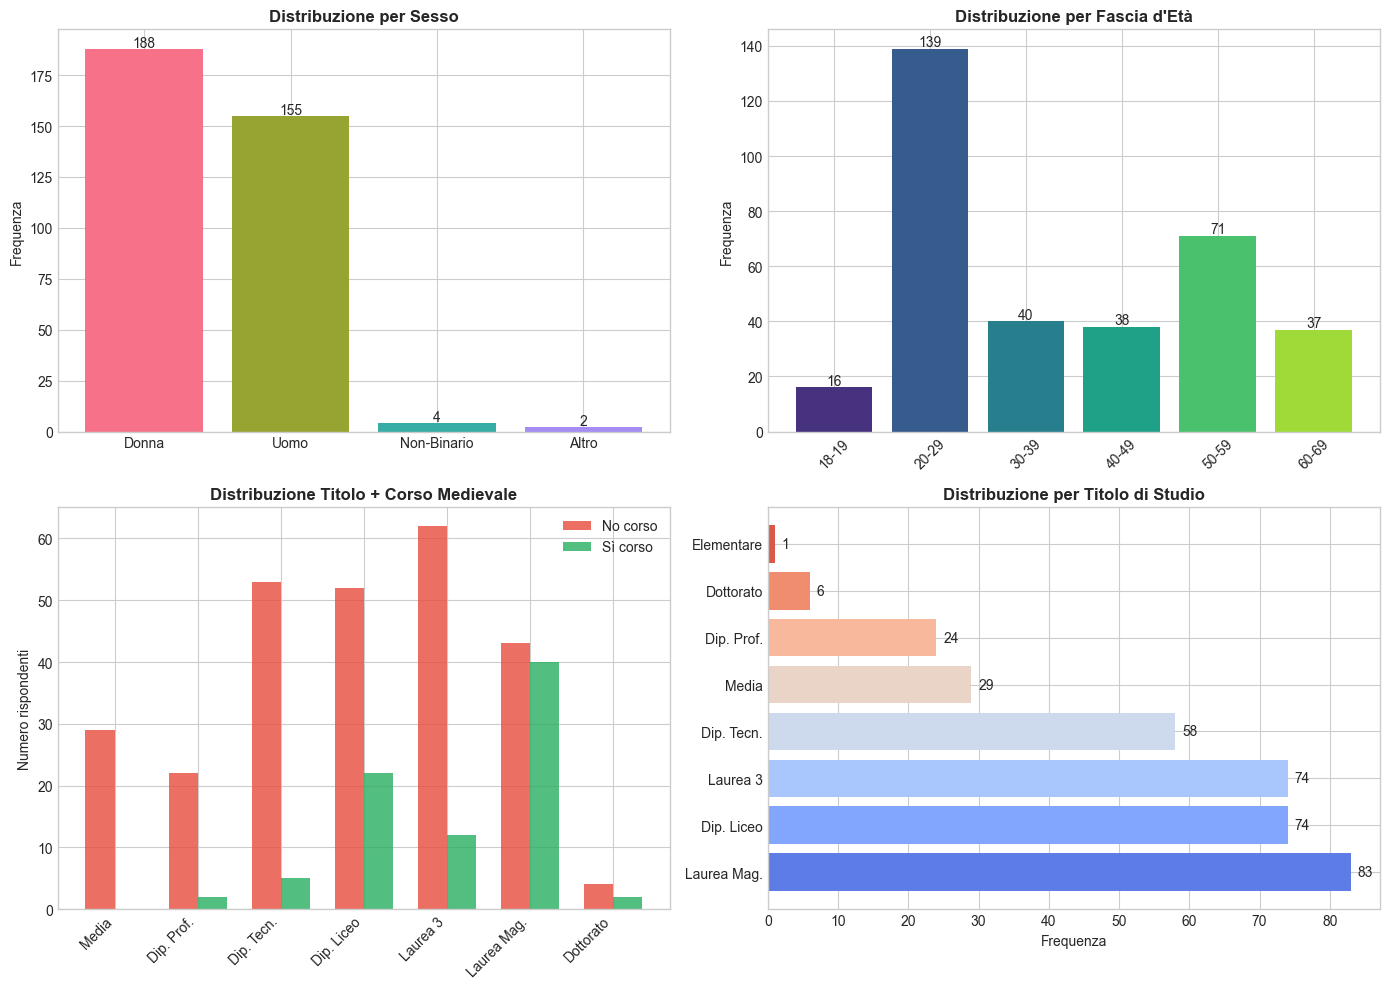

In [60]:
# Grafici delle distribuzioni demografiche
titolo_order = ['Licenza media', 'Diploma di istruzione professionale', 
                'Diploma di istruzione tecnica', 'Diploma di istruzione liceale',
                'Laurea triennale', 'Laurea magistrale', 'Dottorato']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribuzione per sesso
if 'sesso' in df.columns:
    ax1 = axes[0, 0]
    sesso_counts = df['sesso'].value_counts()
    colors = sns.color_palette("husl", len(sesso_counts))
    bars = ax1.bar(sesso_counts.index, sesso_counts.values, color=colors)
    ax1.set_title('Distribuzione per Sesso', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Frequenza')
    for bar, count in zip(bars, sesso_counts.values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(count), ha='center', fontsize=10)

# 2. Distribuzione per età
if 'eta' in df.columns:
    ax2 = axes[0, 1]
    eta_order = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
    eta_counts = df['eta'].value_counts()
    eta_ordered = [eta_counts.get(e, 0) for e in eta_order if e in eta_counts.index]
    eta_labels = [e for e in eta_order if e in eta_counts.index]
    bars = ax2.bar(eta_labels, eta_ordered, color=sns.color_palette("viridis", len(eta_labels)))
    ax2.set_title('Distribuzione per Fascia d\'Età', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Frequenza')
    ax2.tick_params(axis='x', rotation=45)
    for bar, count in zip(bars, eta_ordered):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(count), ha='center', fontsize=10)

# 3. Distribuzione per opinione
if 'titolo_studio' in df.columns and 'corso_medievale' in df.columns:
    ax3 = axes[1, 0]
    cross_counts = pd.crosstab(df['titolo_studio'], df['corso_medievale'])
    cross_counts = cross_counts.reindex([t for t in titolo_order if t in cross_counts.index])
    
    x = np.arange(len(cross_counts))
    width = 0.35
    
    bars1 = ax3.bar(x - width/2, cross_counts.get('No', 0), width, label='No corso', color='#e74c3c', alpha=0.8)
    bars2 = ax3.bar(x + width/2, cross_counts.get('Sì', 0), width, label='Sì corso', color='#27ae60', alpha=0.8)
    
    ax3.set_ylabel('Numero rispondenti')
    ax3.set_title('Distribuzione Titolo + Corso Medievale', fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels([titolo_short.get(t, t) for t in cross_counts.index], rotation=45, ha='right')
    ax3.legend()

# 4. Distribuzione per titolo di studio
if 'titolo_studio' in df.columns:
    ax4 = axes[1, 1]
    titolo_counts = df['titolo_studio'].value_counts()
    # Abbrevia i nomi
    titolo_short = {
        'Licenza elementare': 'Elementare',
        'Licenza media': 'Media',
        'Diploma di istruzione professionale': 'Dip. Prof.',
        'Diploma di istruzione tecnica': 'Dip. Tecn.',
        'Diploma di istruzione liceale': 'Dip. Liceo',
        'Laurea triennale': 'Laurea 3',
        'Laurea magistrale': 'Laurea Mag.',
        'Dottorato': 'Dottorato'
    }
    labels = [titolo_short.get(t, t) for t in titolo_counts.index]
    bars = ax4.barh(labels, titolo_counts.values, color=sns.color_palette("coolwarm", len(labels)))
    ax4.set_title('Distribuzione per Titolo di Studio', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Frequenza')
    for bar, count in zip(bars, titolo_counts.values):
        ax4.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                str(count), va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Opinione generale medioevo

In [11]:
# Opinione generale sul medioevo
print("=" * 60)
print("OPINIONE GENERALE SUL MEDIOEVO")
print("=" * 60)

if 'opinione_medioevo' in df.columns:
    opinione_order = ['Assolutamente negativa', 'Parzialmente negativa', 'Neutrale', 
                      'Parzialmente positiva', 'Assolutamente positiva']
    opinione_counts = df['opinione_medioevo'].value_counts()
    opinione_pct = df['opinione_medioevo'].value_counts(normalize=True) * 100
    
    for val in opinione_order:
        if val in opinione_counts.index:
            print(f"  {val}: {opinione_counts[val]} ({opinione_pct[val]:.1f}%)")
    
    # Media numerica
    if 'opinione_medioevo_num' in df_num.columns:
        print(f"\n  Media: {df_num['opinione_medioevo_num'].mean():.2f}")
        print(f"  Mediana: {df_num['opinione_medioevo_num'].median():.2f}")

OPINIONE GENERALE SUL MEDIOEVO
  Assolutamente negativa: 22 (6.3%)
  Parzialmente negativa: 94 (26.9%)
  Neutrale: 131 (37.5%)
  Parzialmente positiva: 74 (21.2%)
  Assolutamente positiva: 28 (8.0%)

  Media: 2.98
  Mediana: 3.00


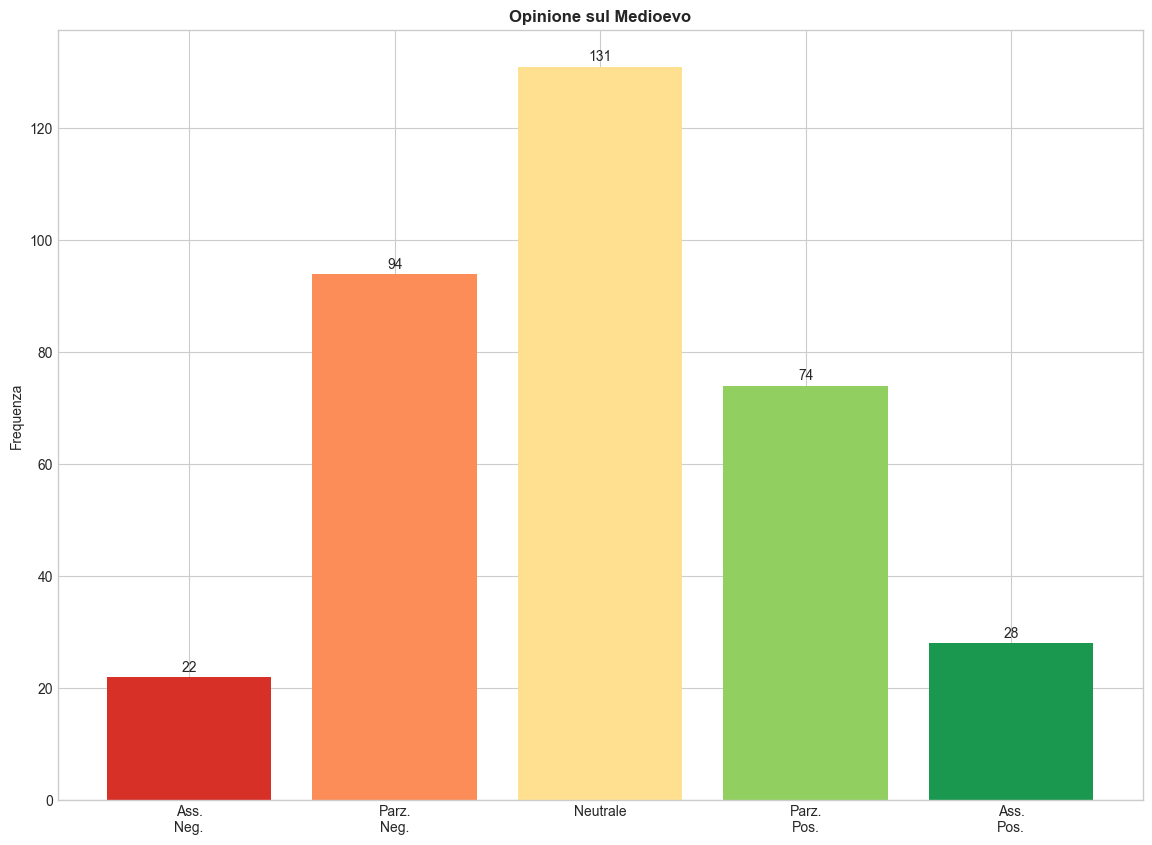

In [62]:

fig, axes = plt.subplots(figsize=(14, 10))

if 'opinione_medioevo' in df.columns:
    ax = axes
    opinione_order = ['Assolutamente negativa', 'Parzialmente negativa', 'Neutrale', 
                      'Parzialmente positiva', 'Assolutamente positiva']
    opinione_counts = df['opinione_medioevo'].value_counts()
    opinione_ordered = [opinione_counts.get(o, 0) for o in opinione_order]
    colors = ['#d73027', '#fc8d59', '#fee090', '#91cf60', '#1a9850']
    bars = ax.bar(range(len(opinione_order)), opinione_ordered, color=colors)
    ax.set_xticks(range(len(opinione_order)))
    ax.set_xticklabels(['Ass.\nNeg.', 'Parz.\nNeg.', 'Neutrale', 'Parz.\nPos.', 'Ass.\nPos.'])
    ax.set_title('Opinione sul Medioevo', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequenza')
    for bar, count in zip(bars, opinione_ordered):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(count), ha='center', fontsize=10)

### Analisi scala Likert termini

In [13]:
# Statistiche descrittive per le scale Likert
print("=" * 60)
print("STATISTICHE SCALE LIKERT (1-5)")
print("=" * 60)

likert_cols = ['feudalesimo', 'superstizione', 'germanico', 'eroico', 
               'comunale', 'sperimentazione', 'cristiano', 'oscurantismo', 
               'rinascita', 'decadenza']

existing_likert = [col for col in likert_cols if col in df_num.columns]

if existing_likert:
    likert_stats = df_num[existing_likert].describe().T
    likert_stats['mediana'] = df_num[existing_likert].median()
    likert_stats['moda'] = df_num[existing_likert].mode().iloc[0]
    
    display(likert_stats[['count', 'mean', 'mediana', 'moda', 'std', 'min', 'max']].round(2))
else:
    print("Colonne Likert non trovate nel dataset")

STATISTICHE SCALE LIKERT (1-5)


,count,mean,mediana,moda,std,min,max
feudalesimo,349.0,4.17,5.0,5,1.01,1.0,5.0
superstizione,349.0,3.91,4.0,5,1.20,1.0,5.0
germanico,349.0,3.00,3.0,3,1.16,1.0,5.0
eroico,349.0,2.91,3.0,3,1.19,1.0,5.0
comunale,349.0,3.05,3.0,3,1.28,1.0,5.0
sperimentazione,349.0,2.52,2.0,3,1.21,1.0,5.0
cristiano,349.0,4.02,4.0,5,1.09,1.0,5.0
oscurantismo,349.0,3.23,3.0,3,1.28,1.0,5.0
rinascita,349.0,2.45,2.0,2,1.18,1.0,5.0
decadenza,349.0,2.79,3.0,3,1.14,1.0,5.0


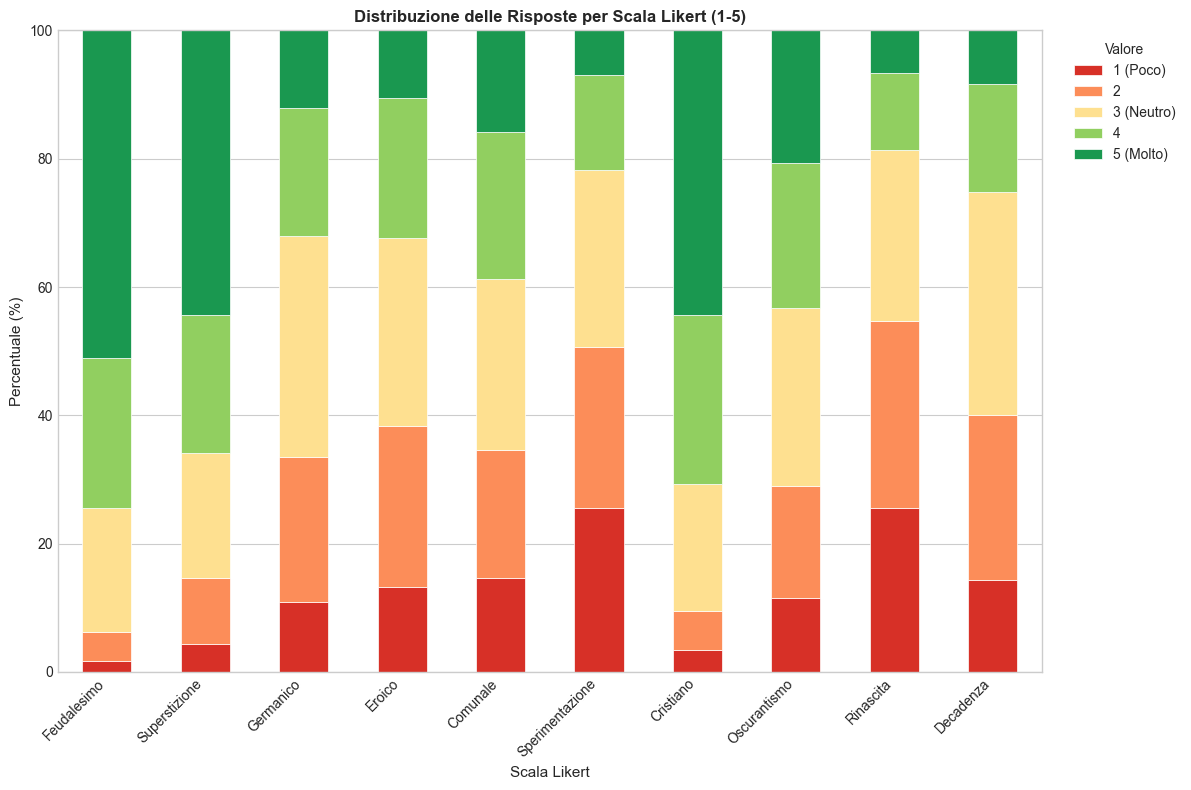


📊 INTERPRETAZIONE:
------------------------------------------------------------
   Feudalesimo        | Media: 4.17 | MOLTO associato
   Superstizione      | Media: 3.91 | Moderatamente associato
   Germanico          | Media: 3.00 | Poco associato
   Eroico             | Media: 2.91 | Poco associato
   Comunale           | Media: 3.05 | Moderatamente associato
   Sperimentazione    | Media: 2.52 | Poco associato
   Cristiano          | Media: 4.02 | MOLTO associato
   Oscurantismo       | Media: 3.23 | Moderatamente associato
   Rinascita          | Media: 2.45 | Poco associato
   Decadenza          | Media: 2.79 | Poco associato


In [14]:
# Visualizzazione grafica delle scale Likert (1-5) - Distribuzione percentuale
if existing_likert:
    # Calcola la distribuzione percentuale per ogni scala
    likert_pct = df_num[existing_likert].apply(
        lambda x: x.value_counts(normalize=True).sort_index().reindex([1,2,3,4,5], fill_value=0)
    ) * 100  # Converti in percentuale
    
    # Trasponi per avere le scale come righe
    likert_pct_T = likert_pct.T
    
    # Grafico a barre impilate
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Colori dalla scala RdYlGn (rosso=1, giallo=3, verde=5)
    colors = ['#d73027', '#fc8d59', '#fee090', '#91cf60', '#1a9850']
    
    likert_pct_T.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='white', linewidth=0.5)
    
    ax.set_xlabel('Scala Likert', fontsize=11)
    ax.set_ylabel('Percentuale (%)', fontsize=11)
    ax.set_title('Distribuzione delle Risposte per Scala Likert (1-5)', fontsize=12, fontweight='bold')
    ax.set_xticklabels([col.capitalize() for col in existing_likert], rotation=45, ha='right')
    ax.legend(title='Valore', labels=['1 (Poco)', '2', '3 (Neutro)', '4', '5 (Molto)'], 
              bbox_to_anchor=(1.02, 1), loc='upper left')
    ax.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()

# Interpretazione
print("\n📊 INTERPRETAZIONE:")
print("-" * 60)
for col in existing_likert:
    val = df_num[col].mean()
    if val >= 4:
        interp = "MOLTO associato"
    elif val >= 3:
        interp = "Moderatamente associato"
    elif val >= 2:
        interp = "Poco associato"
    else:
        interp = "Quasi per nulla associato"
    print(f"   {col.capitalize():18} | Media: {val:.2f} | {interp}")

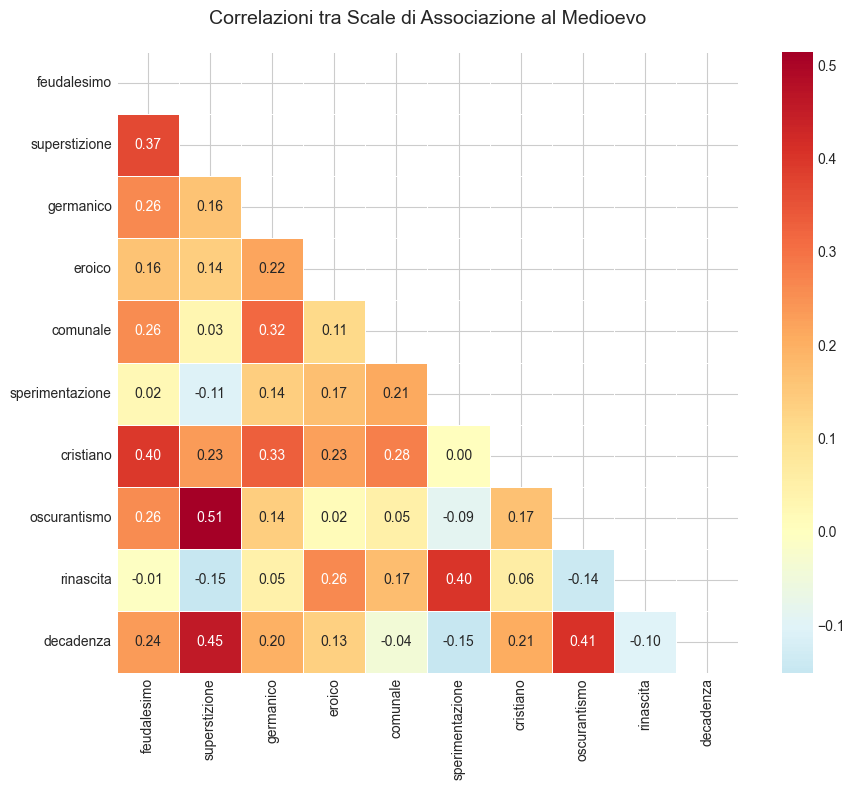


📈 CORRELAZIONI PIÙ FORTI (|r| > 0.3):
  feudalesimo <-> superstizione: r = 0.368
  feudalesimo <-> cristiano: r = 0.396
  superstizione <-> oscurantismo: r = 0.514
  superstizione <-> decadenza: r = 0.453
  germanico <-> comunale: r = 0.316
  germanico <-> cristiano: r = 0.331
  sperimentazione <-> rinascita: r = 0.402
  oscurantismo <-> decadenza: r = 0.406


In [15]:
# Matrice di correlazione per le scale Likert
likert_cols = ['feudalesimo', 'superstizione', 'germanico', 'eroico', 
               'comunale', 'sperimentazione', 'cristiano', 'oscurantismo', 
               'rinascita', 'decadenza']

existing_likert = [col for col in likert_cols if col in df_num.columns]

if len(existing_likert) > 1:
    fig, ax = plt.subplots(figsize=(10, 8))
    corr_matrix = df_num[existing_likert].corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='RdYlBu_r', center=0, ax=ax,
                square=True, linewidths=0.5)
    
    plt.title('Correlazioni tra Scale di Associazione al Medioevo', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Correlazioni più forti
    print("\n📈 CORRELAZIONI PIÙ FORTI (|r| > 0.3):")
    for i in range(len(existing_likert)):
        for j in range(i+1, len(existing_likert)):
            r = corr_matrix.iloc[i, j]
            if abs(r) > 0.3:
                print(f"  {existing_likert[i]} <-> {existing_likert[j]}: r = {r:.3f}")

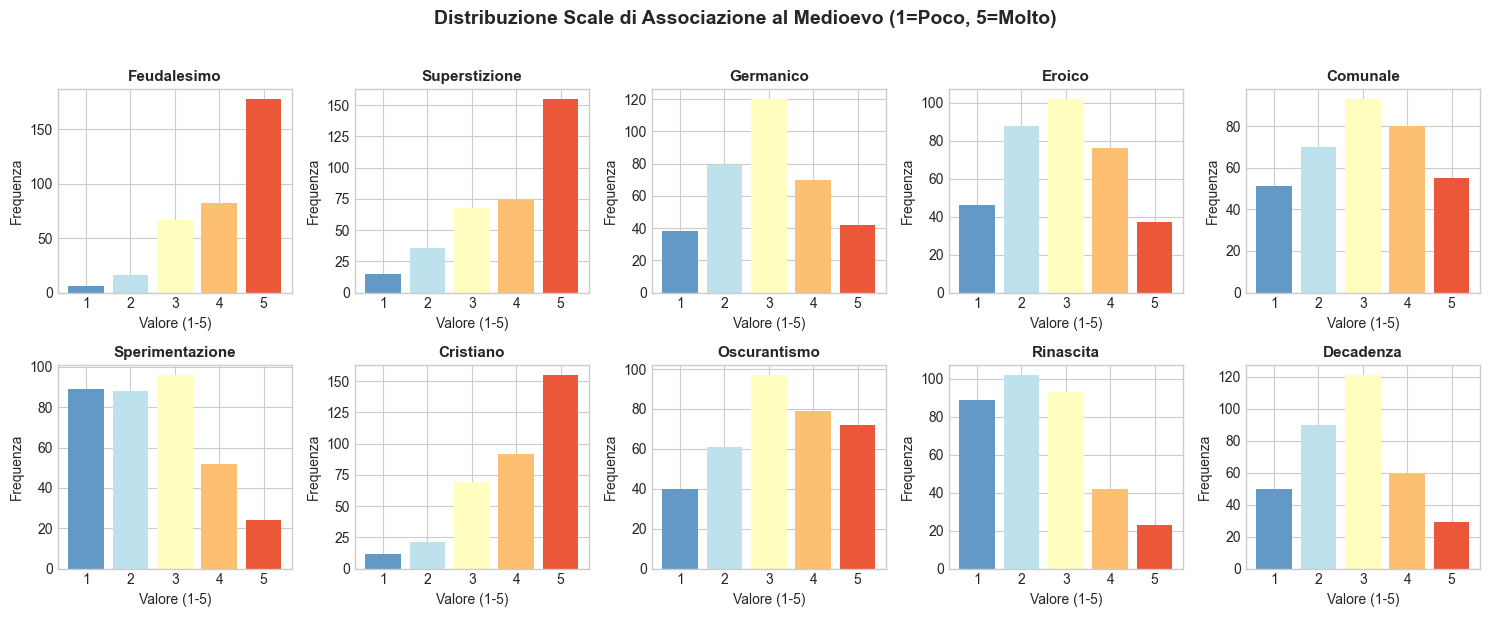

In [16]:
# Distribuzione delle scale Likert
likert_cols = ['feudalesimo', 'superstizione', 'germanico', 'eroico', 
               'comunale', 'sperimentazione', 'cristiano', 'oscurantismo', 
               'rinascita', 'decadenza']

existing_likert = [col for col in likert_cols if col in df_num.columns]

if existing_likert:
    n_cols = 5
    n_rows = (len(existing_likert) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(existing_likert):
        ax = axes[i]
        counts = df_num[col].value_counts().sort_index()
        colors = sns.color_palette("RdYlBu_r", 5)
        ax.bar(counts.index, counts.values, color=[colors[int(x)-1] for x in counts.index])
        ax.set_title(col.capitalize(), fontsize=11, fontweight='bold')
        ax.set_xlabel('Valore (1-5)')
        ax.set_ylabel('Frequenza')
        ax.set_xticks([1, 2, 3, 4, 5])
    
    # Nascondi assi vuoti
    for j in range(len(existing_likert), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('Distribuzione Scale di Associazione al Medioevo (1=Poco, 5=Molto)', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

### Analisi dei Termini Associati al Medioevo
Analizziamo quali termini i rispondenti associano più fortemente alla loro idea di medioevo.

In [17]:
# Analisi dei termini associati al medioevo
print("=" * 70)
print("📚 ANALISI TERMINI ASSOCIATI AL MEDIOEVO")
print("=" * 70)

# Trova la colonna dei termini
termini_col = 'Quali di questi termini associ più fortemente con la tua idea di medioevo? (Max 5 risposte)'
if termini_col in df.columns:
    # Estrai tutti i termini e conta le frequenze
    termini_counts = {}
    totale_rispondenti = 0
    
    for val in df[termini_col].dropna():
        totale_rispondenti += 1
        termini_list = [t.strip() for t in str(val).split(',')]
        for termine in termini_list:
            if termine:
                termini_counts[termine] = termini_counts.get(termine, 0) + 1
    
    # Ordina per frequenza
    termini_sorted = sorted(termini_counts.items(), key=lambda x: -x[1])
    
    print(f"\n📊 Frequenza dei termini associati (n={totale_rispondenti} rispondenti):\n")
    print("-" * 85)
    print(f"{'Termine':<35} | {'Frequenza':>10} | {'%':>8} | {'Grafico':<30}")
    print("-" * 85)
    
    for termine, count in termini_sorted:
        pct = count / totale_rispondenti * 100
        bar = "█" * int(pct / 2)
        print(f"{termine:<35} | {count:>10} | {pct:>7.1f}% | {bar}")
    
    # Salva per analisi successive
    df_termini = pd.DataFrame(termini_sorted, columns=['termine', 'frequenza'])
    df_termini['percentuale'] = df_termini['frequenza'] / totale_rispondenti * 100
    
    print("\n" + "=" * 70)
    print("📊 STATISTICHE RIEPILOGATIVE")
    print("=" * 70)
    print(f"\n🔹 Numero totale di termini distinti: {len(termini_counts)}")
    print(f"🔹 Termine più frequente: {termini_sorted[0][0]} ({termini_sorted[0][1]} selezioni, {termini_sorted[0][1]/totale_rispondenti*100:.1f}%)")
    print(f"🔹 Termine meno frequente: {termini_sorted[-1][0]} ({termini_sorted[-1][1]} selezioni, {termini_sorted[-1][1]/totale_rispondenti*100:.1f}%)")
    print(f"🔹 Media selezioni per termine: {sum(termini_counts.values())/len(termini_counts):.1f}")
    
    # Top 5 e Bottom 5
    print(f"\n🏆 TOP 5 TERMINI PIÙ ASSOCIATI:")
    for i, (termine, count) in enumerate(termini_sorted[:5], 1):
        print(f"   {i}. {termine}: {count} ({count/totale_rispondenti*100:.1f}%)")
    
    print(f"\n⬇️ 5 TERMINI MENO ASSOCIATI:")
    for i, (termine, count) in enumerate(termini_sorted[-5:], 1):
        print(f"   {i}. {termine}: {count} ({count/totale_rispondenti*100:.1f}%)")
else:
    print("Colonna termini non trovata nel dataset")

📚 ANALISI TERMINI ASSOCIATI AL MEDIOEVO

📊 Frequenza dei termini associati (n=349 rispondenti):

-------------------------------------------------------------------------------------
Termine                             |  Frequenza |        % | Grafico                       
-------------------------------------------------------------------------------------
Crociate                            |        259 |    74.2% | █████████████████████████████████████
Vassalli                            |        213 |    61.0% | ██████████████████████████████
Caccia alle streghe                 |        211 |    60.5% | ██████████████████████████████
Peste                               |        211 |    60.5% | ██████████████████████████████
Stato pontificio                    |        132 |    37.8% | ██████████████████
Invasioni Barbariche                |        118 |    33.8% | ████████████████
Aratro                              |         83 |    23.8% | ███████████
Repubbliche Marinare     

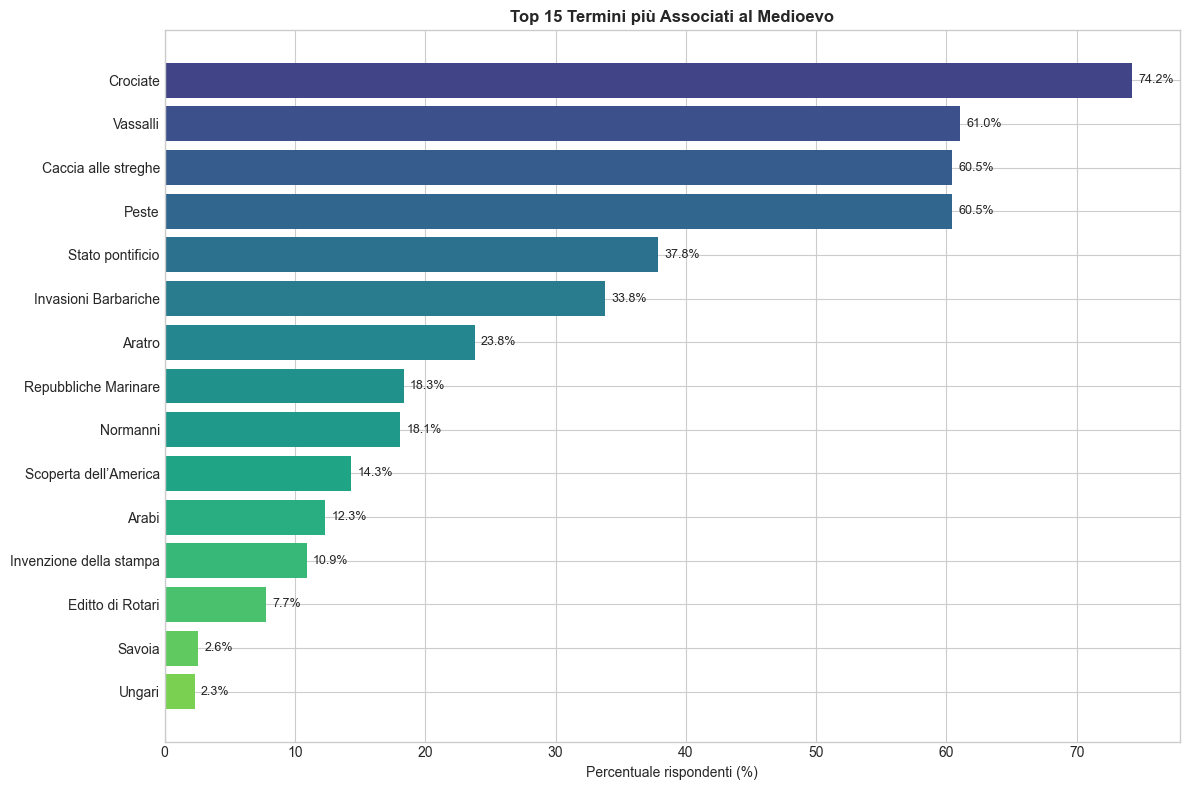

In [18]:
# Visualizzazione grafica dei termini
if 'df_termini' in dir() and len(df_termini) > 0:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Bar chart dei top 15 termini
    top_15 = df_termini.head(15)
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_15)))
    bars = ax.barh(top_15['termine'][::-1], top_15['percentuale'][::-1], color=colors[::-1])
    ax.set_xlabel('Percentuale rispondenti (%)')
    ax.set_title('Top 15 Termini più Associati al Medioevo', fontsize=12, fontweight='bold')
    
    # Aggiungi valori sulle barre
    for bar, pct in zip(bars, top_15['percentuale'][::-1]):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{pct:.1f}%', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

### Analisi dei Personaggi Storici
Analizziamo come i rispondenti hanno classificato i personaggi storici: quali sono percepiti come più o meno medievali?

In [19]:
# Analisi delle risposte sui personaggi storici - PERCEZIONE
print("=" * 70)
print("🎭 ANALISI PERSONAGGI STORICI - PERCEZIONE")
print("=" * 70)

# Identifica le colonne dei personaggi (contengono risposte medievale/non medievale)
# Escludiamo colonne di testo libero
personaggi_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].dropna().unique()
        # Verifica che contenga risposte sul medioevo E che sia una colonna di personaggio (con parentesi quadra)
        if any('medievale' in str(v).lower() for v in unique_vals) and col.startswith('['):
            personaggi_cols.append(col)

# Estrai nomi dei personaggi dalle colonne
personaggi_nomi = {}
for col in personaggi_cols:
    nome = col.replace('[', '').replace(']', '').strip()
    personaggi_nomi[col] = nome

print(f"\n📊 Trovate {len(personaggi_cols)} colonne di personaggi")

# Calcola statistiche per ogni personaggio
print("\n" + "-" * 85)
print(f"{'Personaggio':<30} | {'Medievale':>10} | {'Non Med.':>10} | {'Non conosce':>12} | {'% Med.':>8}")
print("-" * 85)

risultati_personaggi = []

for col in personaggi_cols:
    nome = personaggi_nomi[col]
    
    # Conta le risposte
    totale = df[col].notna().sum()
    medievale = (df[col] == 'Sì, è medievale').sum()
    non_medievale = (df[col] == 'No, non è medievale').sum()
    non_conosco = (df[col] == 'Non conosco il personaggio').sum()
    
    # Percentuale considerato medievale (escludendo "non conosco")
    valide = medievale + non_medievale
    pct_medievale = (medievale / valide * 100) if valide > 0 else 0
    pct_non_conosco = (non_conosco / totale * 100) if totale > 0 else 0
    
    risultati_personaggi.append({
        'nome': nome,
        'medievale': medievale,
        'non_medievale': non_medievale,
        'non_conosco': non_conosco,
        'pct_medievale': pct_medievale,
        'pct_non_conosco': pct_non_conosco
    })
    
    print(f"{nome:<30} | {medievale:>10} | {non_medievale:>10} | {non_conosco:>12} | {pct_medievale:>7.1f}%")

# Crea DataFrame per analisi
df_personaggi = pd.DataFrame(risultati_personaggi)
df_personaggi = df_personaggi.sort_values('pct_medievale', ascending=False)

🎭 ANALISI PERSONAGGI STORICI - PERCEZIONE

📊 Trovate 20 colonne di personaggi

-------------------------------------------------------------------------------------
Personaggio                    |  Medievale |   Non Med. |  Non conosce |   % Med.
-------------------------------------------------------------------------------------
Federico II di Svevia          |        202 |         77 |           70 |    72.4%
Teodorico                      |        205 |         76 |           68 |    73.0%
Lorenzo il Magnifico           |        176 |        145 |           28 |    54.8%
Costantino                     |        115 |        218 |           16 |    34.5%
Petrarca                       |        227 |        111 |           11 |    67.2%
Dante                          |        290 |         56 |            3 |    83.8%
Enrico VIII Tudor              |        120 |        170 |           59 |    41.4%
Francesco Hayez                |         25 |        196 |          128 |    11.3%
Le

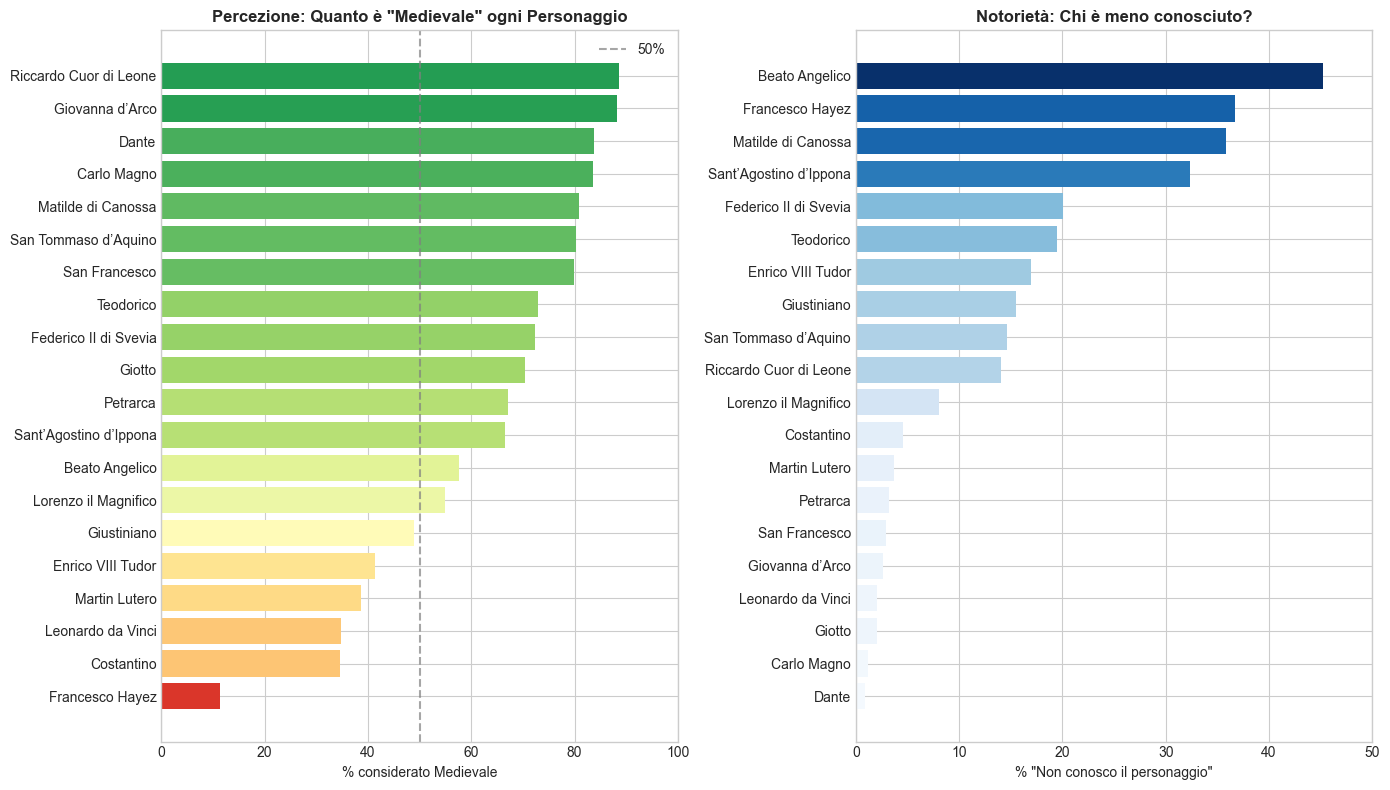


📊 STATISTICHE RIEPILOGATIVE PERCEZIONE

🎯 Personaggi PIÙ PERCEPITI come medievali:
   • Riccardo Cuor di Leone: 88.7% medievale
   • Giovanna d’Arco: 88.2% medievale
   • Dante: 83.8% medievale
   • Carlo Magno: 83.5% medievale
   • Matilde di Canossa: 80.8% medievale

🎯 Personaggi MENO PERCEPITI come medievali:
   • Francesco Hayez: 11.3% medievale (88.7% non medievale)
   • Costantino: 34.5% medievale (65.5% non medievale)
   • Leonardo da Vinci: 34.8% medievale (65.2% non medievale)
   • Martin Lutero: 38.7% medievale (61.3% non medievale)
   • Enrico VIII Tudor: 41.4% medievale (58.6% non medievale)

❓ Personaggi MENO CONOSCIUTI:
   • Beato Angelico: 45.3% non lo conoscono
   • Francesco Hayez: 36.7% non lo conoscono
   • Matilde di Canossa: 35.8% non lo conoscono
   • Sant’Agostino d’Ippona: 32.4% non lo conoscono
   • Federico II di Svevia: 20.1% non lo conoscono

📈 Media generale:
   • % media considerato medievale: 62.8%
   • % media 'non conosco': 14.1%


In [20]:
# Visualizzazione percezione personaggi
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# 1. Grafico % considerato medievale (ordinato)
ax1 = axes[0]
df_plot = df_personaggi.sort_values('pct_medievale', ascending=True)
colors = plt.cm.RdYlGn(df_plot['pct_medievale'] / 100)
bars = ax1.barh(df_plot['nome'], df_plot['pct_medievale'], color=colors)
ax1.set_xlabel('% considerato Medievale')
ax1.set_title('Percezione: Quanto è "Medievale" ogni Personaggio', fontsize=12, fontweight='bold')
ax1.axvline(x=50, color='gray', linestyle='--', alpha=0.7, label='50%')
ax1.set_xlim(0, 100)
ax1.legend()

# 2. Grafico % "Non conosco il personaggio"
ax2 = axes[1]
df_unknown = df_personaggi.sort_values('pct_non_conosco', ascending=True)
colors = plt.cm.Blues(df_unknown['pct_non_conosco'] / df_unknown['pct_non_conosco'].max())
bars = ax2.barh(df_unknown['nome'], df_unknown['pct_non_conosco'], color=colors)
ax2.set_xlabel('% "Non conosco il personaggio"')
ax2.set_title('Notorietà: Chi è meno conosciuto?', fontsize=12, fontweight='bold')
ax2.set_xlim(0, 50)

plt.tight_layout()
plt.show()

# Statistiche riepilogative
print("\n" + "=" * 70)
print("📊 STATISTICHE RIEPILOGATIVE PERCEZIONE")
print("=" * 70)

print(f"\n🎯 Personaggi PIÙ PERCEPITI come medievali:")
top5 = df_personaggi.nlargest(5, 'pct_medievale')
for _, row in top5.iterrows():
    print(f"   • {row['nome']}: {row['pct_medievale']:.1f}% medievale")

print(f"\n🎯 Personaggi MENO PERCEPITI come medievali:")
bottom5 = df_personaggi.nsmallest(5, 'pct_medievale')
for _, row in bottom5.iterrows():
    print(f"   • {row['nome']}: {row['pct_medievale']:.1f}% medievale ({100-row['pct_medievale']:.1f}% non medievale)")

print(f"\n❓ Personaggi MENO CONOSCIUTI:")
unknown5 = df_personaggi.nlargest(5, 'pct_non_conosco')
for _, row in unknown5.iterrows():
    print(f"   • {row['nome']}: {row['pct_non_conosco']:.1f}% non lo conoscono")

# Media complessiva
print(f"\n📈 Media generale:")
print(f"   • % media considerato medievale: {df_personaggi['pct_medievale'].mean():.1f}%")
print(f"   • % media 'non conosco': {df_personaggi['pct_non_conosco'].mean():.1f}%")

## 3. Analisi per Titolo di Studio (e Corso di Storia Medievale)
Come variano le risposte in base al livello di istruzione? E come influisce l'aver frequentato un corso universitario di storia medievale?

Questa sezione replica le analisi preliminari suddividendole per:
- **Titolo di studio** (dal diploma alla laurea/dottorato)
- **Frequenza di un corso di storia medievale** (Sì/No)

In [65]:
# Analisi per Titolo di Studio - Distribuzione e Opinione
print("=" * 70)
print("📚 ANALISI PER TITOLO DI STUDIO")
print("=" * 70)

# Ordine dei titoli di studio
titolo_order = ['Licenza media', 'Diploma di istruzione professionale', 
                'Diploma di istruzione tecnica', 'Diploma di istruzione liceale',
                'Laurea triennale', 'Laurea magistrale', 'Dottorato']

titolo_short = {
    'Licenza media': 'Media',
    'Diploma di istruzione professionale': 'Dip. Prof.',
    'Diploma di istruzione tecnica': 'Dip. Tecn.',
    'Diploma di istruzione liceale': 'Dip. Liceo',
    'Laurea triennale': 'Laurea 3',
    'Laurea magistrale': 'Laurea Mag.',
    'Dottorato': 'Dottorato'
}

# 1. Distribuzione per titolo di studio
print("\n📊 DISTRIBUZIONE PER TITOLO DI STUDIO:")
if 'titolo_studio' in df.columns:
    titolo_counts = df['titolo_studio'].value_counts()
    for titolo in titolo_order:
        if titolo in titolo_counts.index:
            count = titolo_counts[titolo]
            pct = count / len(df) * 100
            print(f"   {titolo:<40} | {count:>4} ({pct:>5.1f}%)")

# 2. Distribuzione corso medievale per titolo
print("\n📊 FREQUENZA CORSO STORIA MEDIEVALE PER TITOLO:")
if 'corso_medievale' in df.columns and 'titolo_studio' in df.columns:
    cross_tab = pd.crosstab(df['titolo_studio'], df['corso_medievale'], normalize='index') * 100
    cross_tab = cross_tab.reindex([t for t in titolo_order if t in cross_tab.index])
    
    for titolo in cross_tab.index:
        si_pct = cross_tab.loc[titolo, 'Sì'] if 'Sì' in cross_tab.columns else 0
        print(f"   {titolo_short.get(titolo, titolo):<15} | Corso Sì: {si_pct:>5.1f}%")


📚 ANALISI PER TITOLO DI STUDIO

📊 DISTRIBUZIONE PER TITOLO DI STUDIO:
   Licenza media                            |   29 (  8.3%)
   Diploma di istruzione professionale      |   24 (  6.9%)
   Diploma di istruzione tecnica            |   58 ( 16.6%)
   Diploma di istruzione liceale            |   74 ( 21.2%)
   Laurea triennale                         |   74 ( 21.2%)
   Laurea magistrale                        |   83 ( 23.8%)
   Dottorato                                |    6 (  1.7%)

📊 FREQUENZA CORSO STORIA MEDIEVALE PER TITOLO:
   Media           | Corso Sì:   0.0%
   Dip. Prof.      | Corso Sì:   8.3%
   Dip. Tecn.      | Corso Sì:   8.6%
   Dip. Liceo      | Corso Sì:  29.7%
   Laurea 3        | Corso Sì:  16.2%
   Laurea Mag.     | Corso Sì:  48.2%
   Dottorato       | Corso Sì:  33.3%


### Opinione generale medioevo

In [67]:
# Opinione sul Medioevo per Titolo di Studio - Medie e Distribuzione %
print("=" * 70)
print("📊 OPINIONE SUL MEDIOEVO PER TITOLO DI STUDIO")
print("=" * 70)

opinione_order = ['Assolutamente negativa', 'Parzialmente negativa', 'Neutrale',
                  'Parzialmente positiva', 'Assolutamente positiva']
opinione_short_names = ['Ass. Neg.', 'Parz. Neg.', 'Neutrale', 'Parz. Pos.', 'Ass. Pos.']

# 1. Opinione media per titolo
print("\n📊 OPINIONE MEDIA PER TITOLO:")
if 'opinione_medioevo_num' in df_num.columns and 'titolo_studio' in df_num.columns:
    opinione_per_titolo = df_num.groupby('titolo_studio')['opinione_medioevo_num'].agg(['mean', 'std', 'count'])
    opinione_per_titolo = opinione_per_titolo.reindex([t for t in titolo_order if t in opinione_per_titolo.index])
    
    for titolo in opinione_per_titolo.index:
        media = opinione_per_titolo.loc[titolo, 'mean']
        std = opinione_per_titolo.loc[titolo, 'std']
        n = int(opinione_per_titolo.loc[titolo, 'count'])
        emoji = "😊" if media >= 3.5 else "😐" if media >= 2.5 else "😔"
        print(f"   {emoji} {titolo_short.get(titolo, titolo):<15} | Media: {media:.2f} ± {std:.2f} (n={n})")

# 2. Distribuzione % delle risposte (1-5) per titolo di studio
print("\n📊 DISTRIBUZIONE % RISPOSTE OPINIONE PER TITOLO DI STUDIO:")
print("-" * 90)

if 'opinione_medioevo' in df.columns and 'titolo_studio' in df.columns:
    # Cross-tabulation normalizzata per riga (% per titolo)
    cross_opinione_titolo = pd.crosstab(df['titolo_studio'], df['opinione_medioevo'], normalize='index') * 100
    cross_opinione_titolo = cross_opinione_titolo.reindex(
        index=[t for t in titolo_order if t in cross_opinione_titolo.index],
        columns=[o for o in opinione_order if o in cross_opinione_titolo.columns],
        fill_value=0
    )
    
    # Stampa header
    header = f"   {'Titolo':<15}"
    for short in opinione_short_names:
        header += f" | {short:>10}"
    header += f" | {'n':>5}"
    print(header)
    print("   " + "-" * (15 + 11 * 5 + 8))
    
    # Stampa valori
    for titolo in cross_opinione_titolo.index:
        row = f"   {titolo_short.get(titolo, titolo):<15}"
        for op in opinione_order:
            val = cross_opinione_titolo.loc[titolo, op] if op in cross_opinione_titolo.columns else 0
            row += f" | {val:>9.1f}%"
        n = len(df[df['titolo_studio'] == titolo])
        row += f" | {n:>5}"
        print(row)
    
    # Mostra anche come DataFrame formattato
    display_df = cross_opinione_titolo.copy()
    display_df.index = [titolo_short.get(t, t) for t in display_df.index]
    display_df.columns = opinione_short_names[:len(display_df.columns)]
    print("\n📋 Tabella completa (%):")
    display(display_df.round(1))

# 3. Stessa distribuzione % separata per CORSO Sì vs No
print("\n\n📊 DISTRIBUZIONE % OPINIONE PER TITOLO × CORSO MEDIEVALE:")
print("=" * 90)

if 'corso_medievale' in df.columns:
    for corso in ['Sì', 'No']:
        label_corso = "CON corso medievale" if corso == 'Sì' else "SENZA corso medievale"
        emoji_corso = "🎓" if corso == 'Sì' else "📚"
        print(f"\n{emoji_corso} {label_corso}:")
        print("-" * 90)
        
        df_corso = df[df['corso_medievale'] == corso]
        cross_corso = pd.crosstab(df_corso['titolo_studio'], df_corso['opinione_medioevo'], 
                                   normalize='index') * 100
        cross_corso = cross_corso.reindex(
            index=[t for t in titolo_order if t in cross_corso.index],
            columns=[o for o in opinione_order if o in cross_corso.columns],
            fill_value=0
        )
        
        # Header
        header = f"   {'Titolo':<15}"
        for short in opinione_short_names:
            header += f" | {short:>10}"
        header += f" | {'n':>5}"
        print(header)
        print("   " + "-" * (15 + 11 * 5 + 8))
        
        for titolo in cross_corso.index:
            row = f"   {titolo_short.get(titolo, titolo):<15}"
            for op in opinione_order:
                val = cross_corso.loc[titolo, op] if op in cross_corso.columns else 0
                row += f" | {val:>9.1f}%"
            n = len(df_corso[df_corso['titolo_studio'] == titolo])
            row += f" | {n:>5}"
            print(row)
    
    # Confronto aggregato Corso Sì vs No (senza separare per titolo)
    print("\n\n📊 CONFRONTO AGGREGATO - CORSO Sì vs No (tutti i titoli):")
    print("-" * 70)
    for corso in ['Sì', 'No']:
        df_c = df[df['corso_medievale'] == corso]
        dist = df_c['opinione_medioevo'].value_counts(normalize=True) * 100
        emoji_c = "🎓" if corso == 'Sì' else "📚"
        row = f"   {emoji_c} Corso {corso:<3} (n={len(df_c):>3})"
        for op in opinione_order:
            val = dist.get(op, 0)
            row += f" | {val:>5.1f}%"
        print(row)

# 4. Opinione media per titolo + corso
print("\n\n📊 OPINIONE MEDIA PER TITOLO + CORSO MEDIEVALE:")
if 'corso_medievale' in df_num.columns:
    for titolo in titolo_order:
        if titolo in df_num['titolo_studio'].values:
            subset = df_num[df_num['titolo_studio'] == titolo]
            for corso in ['Sì', 'No']:
                subsubset = subset[subset['corso_medievale'] == corso]
                if len(subsubset) > 2:
                    media = subsubset['opinione_medioevo_num'].mean()
                    n = len(subsubset)
                    emoji = "🎓" if corso == 'Sì' else "📚"
                    print(f"   {titolo_short.get(titolo, titolo):<15} + Corso {corso}: Media {media:.2f} (n={n})")

# 5. % medievale per titolo (necessario per il grafico successivo)
pct_medievale_titolo = {}
for titolo in titolo_order:
    if titolo in df['titolo_studio'].values:
        subset = df[df['titolo_studio'] == titolo]
        pct = calcola_percentuale_medievale(subset, personaggi_cols, personaggi_nomi)
        pct_medievale_titolo[titolo] = {'pct_medievale': pct, 'n': len(subset)}

📊 OPINIONE SUL MEDIOEVO PER TITOLO DI STUDIO

📊 OPINIONE MEDIA PER TITOLO:
   😐 Media           | Media: 3.00 ± 1.07 (n=29)
   😐 Dip. Prof.      | Media: 2.58 ± 1.21 (n=24)
   😐 Dip. Tecn.      | Media: 2.76 ± 1.05 (n=58)
   😐 Dip. Liceo      | Media: 2.97 ± 0.88 (n=74)
   😐 Laurea 3        | Media: 2.96 ± 0.87 (n=74)
   😐 Laurea Mag.     | Media: 3.19 ± 1.10 (n=83)
   😊 Dottorato       | Media: 3.50 ± 1.64 (n=6)

📊 DISTRIBUZIONE % RISPOSTE OPINIONE PER TITOLO DI STUDIO:
------------------------------------------------------------------------------------------
   Titolo          |  Ass. Neg. | Parz. Neg. |   Neutrale | Parz. Pos. |  Ass. Pos. |     n
   ------------------------------------------------------------------------------
   Media           |       6.9% |      24.1% |      41.4% |      17.2% |      10.3% |    29
   Dip. Prof.      |      20.8% |      29.2% |      29.2% |      12.5% |       8.3% |    24
   Dip. Tecn.      |      12.1% |      31.0% |      27.6% |      27.6% |   

,Ass. Neg.,Parz. Neg.,Neutrale,Parz. Pos.,Ass. Pos.
Media,6.9,24.1,41.4,17.2,10.3
Dip. Prof.,20.8,29.2,29.2,12.5,8.3
Dip. Tecn.,12.1,31.0,27.6,27.6,1.7
Dip. Liceo,2.7,25.7,48.6,17.6,5.4
Laurea 3,4.1,25.7,41.9,27.0,1.4
Laurea Mag.,2.4,27.7,34.9,18.1,16.9
Dottorato,16.7,16.7,0.0,33.3,33.3




📊 DISTRIBUZIONE % OPINIONE PER TITOLO × CORSO MEDIEVALE:

🎓 CON corso medievale:
------------------------------------------------------------------------------------------
   Titolo          |  Ass. Neg. | Parz. Neg. |   Neutrale | Parz. Pos. |  Ass. Pos. |     n
   ------------------------------------------------------------------------------
   Dip. Prof.      |       0.0% |      50.0% |      50.0% |       0.0% |       0.0% |     2
   Dip. Tecn.      |       0.0% |      60.0% |      20.0% |       0.0% |      20.0% |     5
   Dip. Liceo      |       4.5% |      18.2% |      45.5% |      18.2% |      13.6% |    22
   Laurea 3        |      16.7% |      16.7% |      16.7% |      50.0% |       0.0% |    12
   Laurea Mag.     |       2.5% |      32.5% |      25.0% |      20.0% |      20.0% |    40
   Dottorato       |      50.0% |       0.0% |       0.0% |       0.0% |      50.0% |     2

📚 SENZA corso medievale:
--------------------------------------------------------------------------

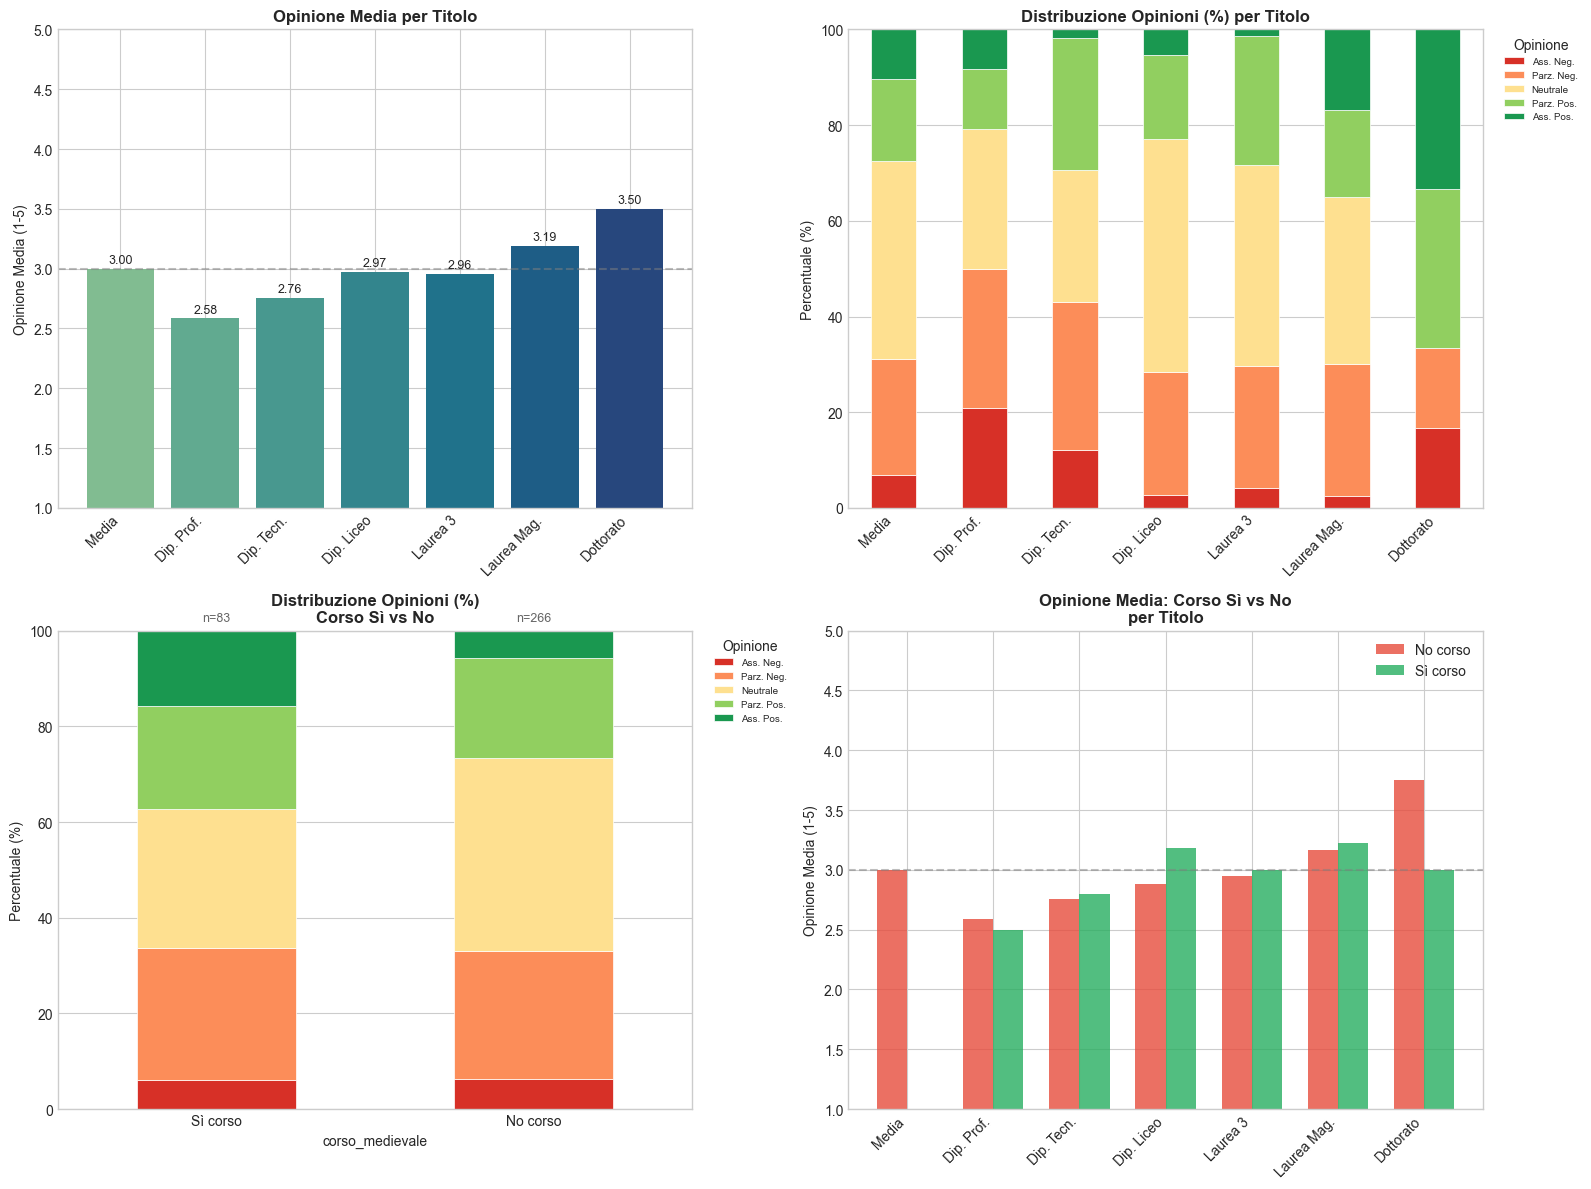

In [69]:
# Visualizzazione Opinione per Titolo di Studio
# Si potrebbero aggiungere grafici singoli per ogni titolo + grafici di confronto tra corso sì vs no, ma per ora mostriamo un grafico complessivo con media e distribuzione
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

colors_op = ['#d73027', '#fc8d59', '#fee090', '#91cf60', '#1a9850']
titoli_plot = [t for t in titolo_order if t in df_num['titolo_studio'].values]
labels_plot = [titolo_short.get(t, t) for t in titoli_plot]

# 1. Opinione media per titolo
ax1 = axes[0, 0]
if 'opinione_medioevo_num' in df_num.columns:
    opinioni = [df_num[df_num['titolo_studio'] == t]['opinione_medioevo_num'].mean() for t in titoli_plot]
    colors = sns.color_palette("crest", len(titoli_plot))
    bars = ax1.bar(range(len(titoli_plot)), opinioni, color=colors)
    ax1.set_xticks(range(len(titoli_plot)))
    ax1.set_xticklabels(labels_plot, rotation=45, ha='right')
    ax1.set_ylabel('Opinione Media (1-5)')
    ax1.set_title('Opinione Media per Titolo', fontweight='bold')
    ax1.axhline(y=3, color='gray', linestyle='--', alpha=0.5)
    ax1.set_ylim(1, 5)
    for bar, val in zip(bars, opinioni):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                f'{val:.2f}', ha='center', fontsize=9)

# 2. Distribuzione % opinioni per titolo (stacked bar)
ax2 = axes[0, 1]
if 'cross_opinione_titolo' in dir():
    cross_opinione_titolo.index = [titolo_short.get(t, t) for t in cross_opinione_titolo.index]
    cross_opinione_titolo.plot(kind='bar', stacked=True, ax=ax2, color=colors_op[:len(cross_opinione_titolo.columns)],
                               edgecolor='white', linewidth=0.5)
    ax2.set_ylabel('Percentuale (%)')
    ax2.set_title('Distribuzione Opinioni (%) per Titolo', fontweight='bold')
    ax2.set_xticklabels(cross_opinione_titolo.index, rotation=45, ha='right')
    ax2.legend(title='Opinione', labels=opinione_short_names[:len(cross_opinione_titolo.columns)],
               bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=7)
    ax2.set_ylim(0, 100)

# 3. Confronto Corso Sì vs No - distribuzione % opinioni (stacked)
ax3 = axes[1, 0]
if 'corso_medievale' in df.columns:
    cross_corso_agg = pd.crosstab(df['corso_medievale'], df['opinione_medioevo'], normalize='index') * 100
    cross_corso_agg = cross_corso_agg.reindex(
        columns=[o for o in opinione_order if o in cross_corso_agg.columns], fill_value=0)
    cross_corso_agg = cross_corso_agg.reindex(['Sì', 'No'])
    
    cross_corso_agg.plot(kind='bar', stacked=True, ax=ax3, color=colors_op[:len(cross_corso_agg.columns)],
                          edgecolor='white', linewidth=0.5)
    ax3.set_ylabel('Percentuale (%)')
    ax3.set_title('Distribuzione Opinioni (%)\nCorso Sì vs No', fontweight='bold')
    ax3.set_xticklabels(['Sì corso', 'No corso'], rotation=0)
    ax3.legend(title='Opinione', labels=opinione_short_names[:len(cross_corso_agg.columns)],
               bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=7)
    ax3.set_ylim(0, 100)
    
    # Aggiungi n come annotazione
    for i, corso in enumerate(['Sì', 'No']):
        n = len(df[df['corso_medievale'] == corso])
        ax3.text(i, 102, f'n={n}', ha='center', fontsize=9, alpha=0.7)

# 4. Opinione media per titolo separata per corso
ax4 = axes[1, 1]
if 'corso_medievale' in df_num.columns:
    x = np.arange(len(titoli_plot))
    width = 0.35
    
    si_vals = []
    no_vals = []
    for t in titoli_plot:
        subset = df_num[df_num['titolo_studio'] == t]
        si_subset = subset[subset['corso_medievale'] == 'Sì']['opinione_medioevo_num']
        no_subset = subset[subset['corso_medievale'] == 'No']['opinione_medioevo_num']
        si_vals.append(si_subset.mean() if len(si_subset) > 0 else np.nan)
        no_vals.append(no_subset.mean() if len(no_subset) > 0 else np.nan)
    
    ax4.bar(x - width/2, no_vals, width, label='No corso', color='#e74c3c', alpha=0.8)
    ax4.bar(x + width/2, si_vals, width, label='Sì corso', color='#27ae60', alpha=0.8)
    ax4.set_xticks(x)
    ax4.set_xticklabels(labels_plot, rotation=45, ha='right')
    ax4.set_ylabel('Opinione Media (1-5)')
    ax4.set_title('Opinione Media: Corso Sì vs No\nper Titolo', fontweight='bold')
    ax4.axhline(y=3, color='gray', linestyle='--', alpha=0.5)
    ax4.set_ylim(1, 5)
    ax4.legend()

plt.tight_layout()
plt.show()

### Scale Likert per Titolo di Studio
Distribuzione delle risposte alle scale Likert (1-5) suddivise per livello di istruzione.

In [23]:
# Scale Likert per Titolo di Studio - Analisi dettagliata
print("=" * 70)
print("📊 SCALE LIKERT PER TITOLO DI STUDIO")
print("=" * 70)

likert_cols = ['feudalesimo', 'superstizione', 'germanico', 'eroico', 
               'comunale', 'sperimentazione', 'cristiano', 'oscurantismo', 
               'rinascita', 'decadenza']
existing_likert = [col for col in likert_cols if col in df_num.columns]

# 1. Tabella medie per titolo
print("\n📊 MEDIE SCALE LIKERT PER TITOLO:")
if existing_likert and 'titolo_studio' in df_num.columns:
    likert_per_titolo = df_num.groupby('titolo_studio')[existing_likert].mean()
    likert_per_titolo = likert_per_titolo.reindex([t for t in titolo_order if t in likert_per_titolo.index])
    display(likert_per_titolo.round(2))

# 2. Differenze significative tra titoli
print("\n📊 DIFFERENZE TRA LIVELLI DI ISTRUZIONE:")
for col in existing_likert:
    vals_per_titolo = df_num.groupby('titolo_studio')[col].mean()
    min_val = vals_per_titolo.min()
    max_val = vals_per_titolo.max()
    diff = max_val - min_val
    if diff > 0.5:
        titolo_max = vals_per_titolo.idxmax()
        titolo_min = vals_per_titolo.idxmin()
        print(f"   • {col.capitalize()}: max {titolo_short.get(titolo_max, titolo_max)} ({max_val:.2f}) vs min {titolo_short.get(titolo_min, titolo_min)} ({min_val:.2f}), Δ={diff:.2f}")

# 3. Confronto scale per corso medievale (aggregato per tutti i titoli)
print("\n📊 EFFETTO CORSO MEDIEVALE SULLE SCALE:")
if 'corso_medievale' in df_num.columns:
    for col in existing_likert:
        si_mean = df_num[df_num['corso_medievale'] == 'Sì'][col].mean()
        no_mean = df_num[df_num['corso_medievale'] == 'No'][col].mean()
        diff = si_mean - no_mean
        if abs(diff) > 0.3:
            direction = "↑" if diff > 0 else "↓"
            print(f"   {direction} {col.capitalize()}: Corso Sì {si_mean:.2f} vs No {no_mean:.2f} (Δ={diff:+.2f})")

📊 SCALE LIKERT PER TITOLO DI STUDIO

📊 MEDIE SCALE LIKERT PER TITOLO:


,feudalesimo,superstizione,germanico,eroico,comunale,sperimentazione,cristiano,oscurantismo,rinascita,decadenza
titolo_studio,,,,,,,,,,
Licenza media,3.90,4.00,3.14,3.31,2.93,2.93,3.52,3.34,2.66,3.00
Diploma di istruzione professionale,3.50,3.42,2.58,2.54,2.42,2.00,3.42,2.83,2.42,2.83
Diploma di istruzione tecnica,4.10,4.10,2.79,2.95,2.71,2.43,4.09,3.36,2.55,3.02
Diploma di istruzione liceale,4.27,4.26,3.04,3.16,3.04,2.27,4.08,3.39,2.45,2.88
Laurea triennale,4.39,4.07,3.04,2.88,3.08,2.58,4.28,3.43,2.32,2.80
Laurea magistrale,4.27,3.47,3.16,2.70,3.47,2.71,4.11,2.96,2.48,2.52
Dottorato,3.83,3.50,3.00,2.83,3.50,3.17,3.67,2.83,2.00,2.33



📊 DIFFERENZE TRA LIVELLI DI ISTRUZIONE:
   • Feudalesimo: max Laurea 3 (4.39) vs min Dip. Prof. (3.50), Δ=0.89
   • Superstizione: max Licenza elementare (5.00) vs min Dip. Prof. (3.42), Δ=1.58
   • Germanico: max Laurea Mag. (3.16) vs min Licenza elementare (1.00), Δ=2.16
   • Eroico: max Media (3.31) vs min Licenza elementare (1.00), Δ=2.31
   • Comunale: max Dottorato (3.50) vs min Dip. Prof. (2.42), Δ=1.08
   • Sperimentazione: max Licenza elementare (4.00) vs min Dip. Prof. (2.00), Δ=2.00
   • Cristiano: max Laurea 3 (4.28) vs min Licenza elementare (1.00), Δ=3.28
   • Oscurantismo: max Laurea 3 (3.43) vs min Licenza elementare (1.00), Δ=2.43
   • Rinascita: max Media (2.66) vs min Licenza elementare (1.00), Δ=1.66
   • Decadenza: max Dip. Tecn. (3.02) vs min Licenza elementare (1.00), Δ=2.02

📊 EFFETTO CORSO MEDIEVALE SULLE SCALE:
   ↓ Superstizione: Corso Sì 3.46 vs No 4.06 (Δ=-0.60)
   ↑ Comunale: Corso Sì 3.48 vs No 2.92 (Δ=+0.56)
   ↑ Sperimentazione: Corso Sì 2.78 vs No 2.4

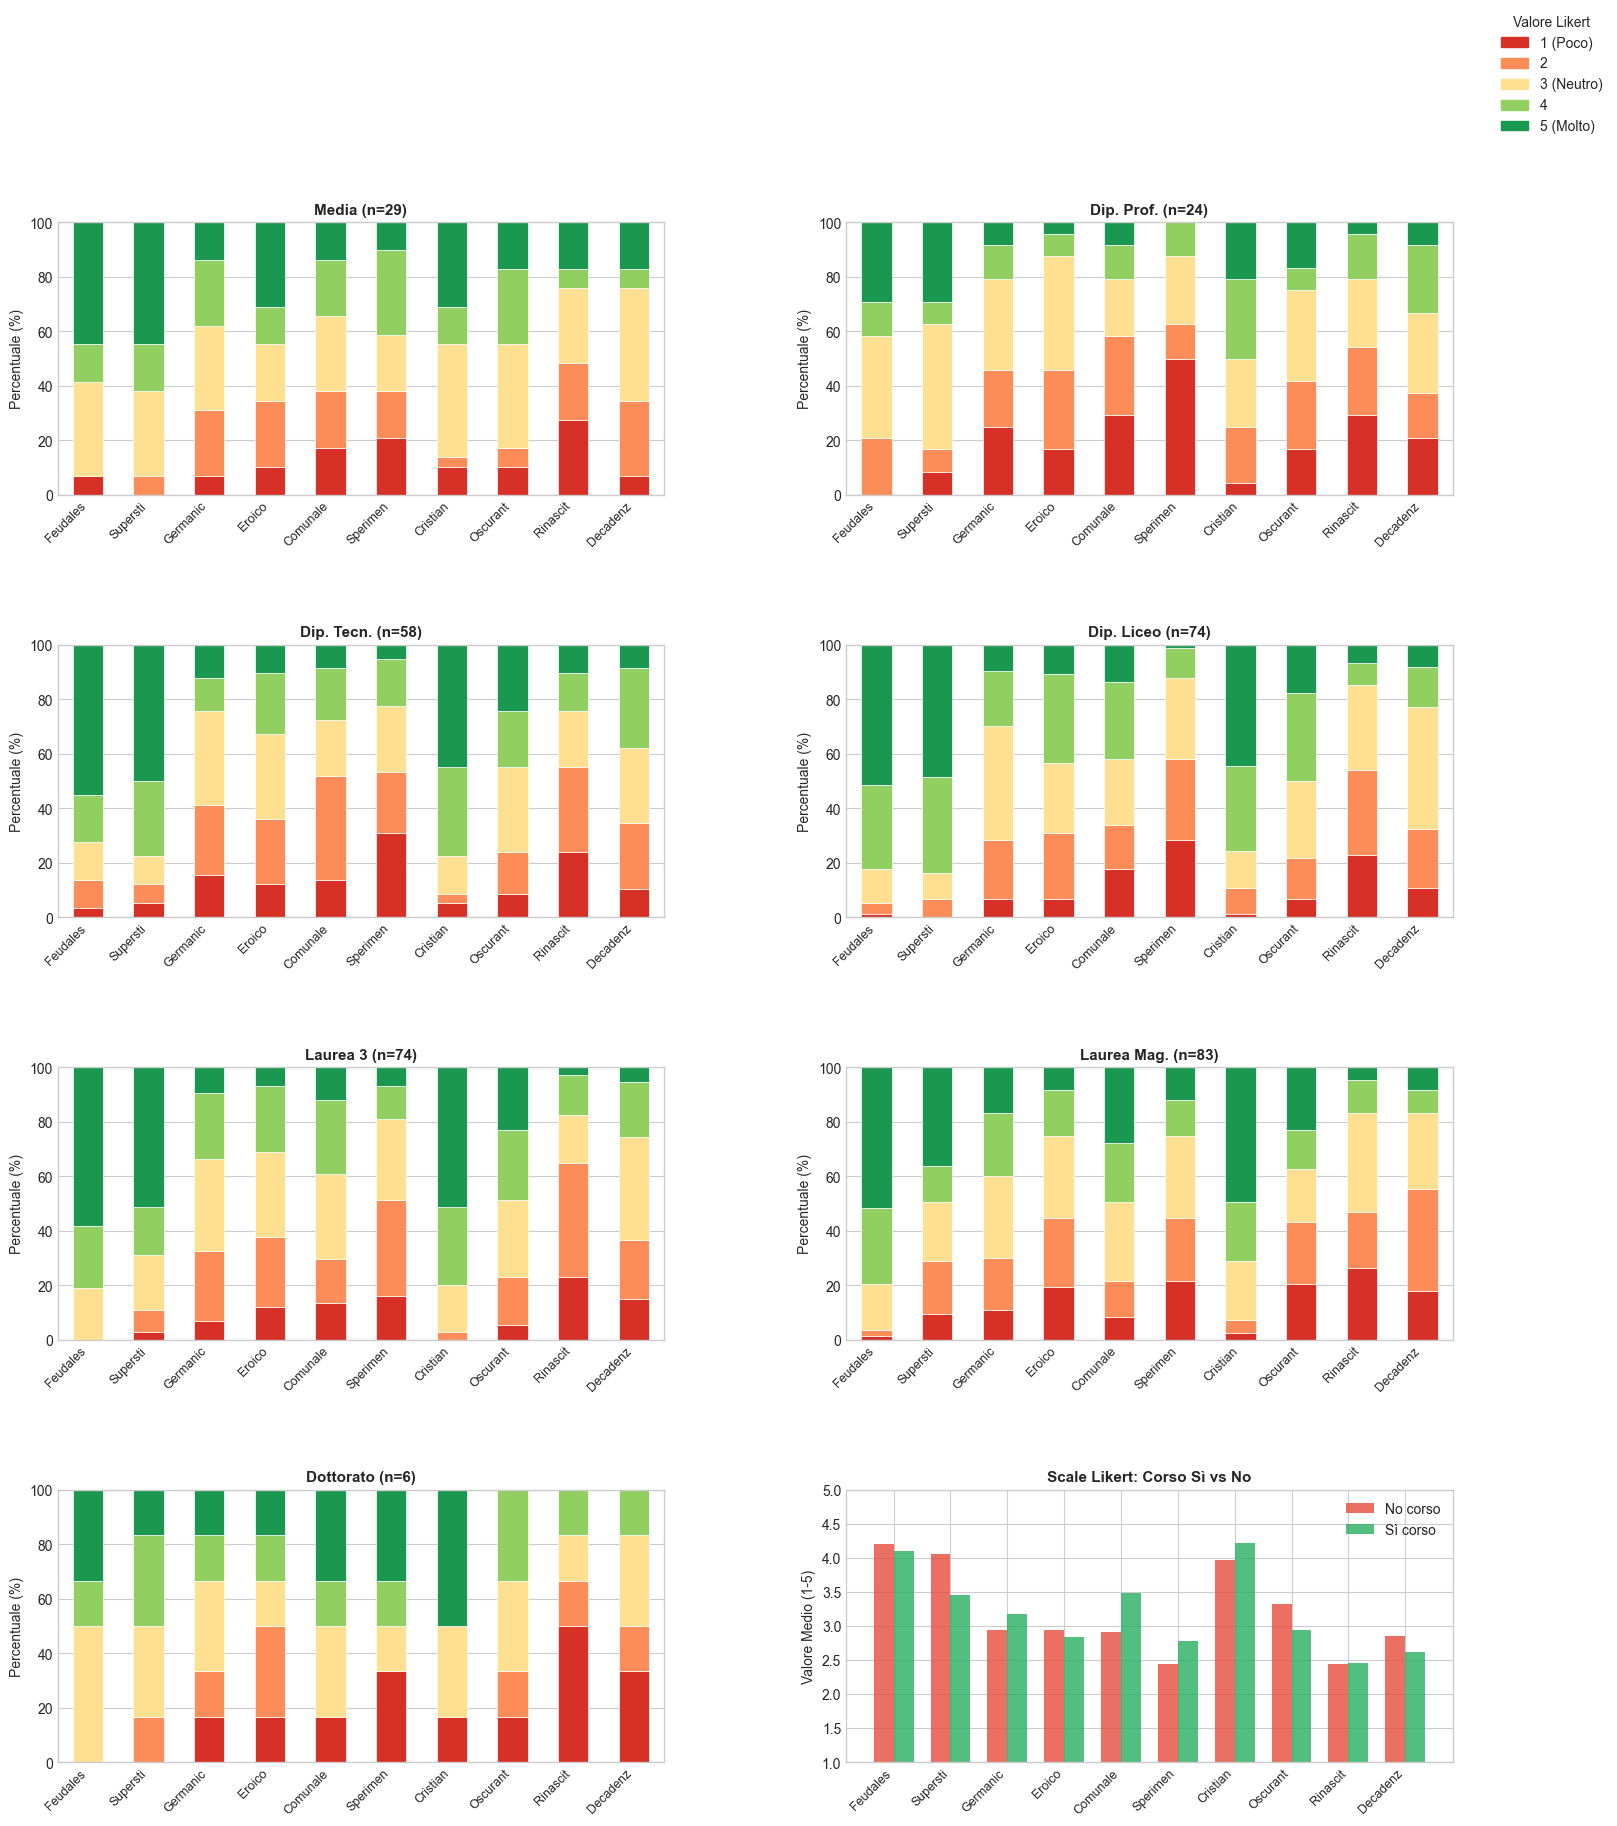

In [24]:
# Visualizzazione Scale Likert per Titolo - Distribuzione percentuale
fig, axes = plt.subplots(4, 2, figsize=(18, 20))

# Colori scala RdYlGn
colors_likert = ['#d73027', '#fc8d59', '#fee090', '#91cf60', '#1a9850']

# Seleziona alcuni titoli rappresentativi per il confronto
titoli_confronto = [t for t in titolo_order if t in df_num['titolo_studio'].values]

for idx, titolo in enumerate(titoli_confronto):
    ax = axes[idx // 2, idx % 2]
    subset = df_num[df_num['titolo_studio'] == titolo]
    
    if len(subset) > 5:
        likert_pct = subset[existing_likert].apply(
            lambda x: x.value_counts(normalize=True).sort_index().reindex([1,2,3,4,5], fill_value=0)
        ) * 100
        likert_pct_T = likert_pct.T
        
        likert_pct_T.plot(kind='bar', stacked=True, ax=ax, color=colors_likert, edgecolor='white', linewidth=0.5, legend=False)
        ax.set_xlabel('')
        ax.set_ylabel('Percentuale (%)')
        ax.set_title(f'{titolo_short.get(titolo, titolo)} (n={len(subset)})', fontweight='bold', fontsize=11)
        ax.set_xticklabels([col[:8].capitalize() for col in existing_likert], rotation=45, ha='right', fontsize=9)
        ax.set_ylim(0, 100)

# Confronto Corso Sì vs No — ultimo subplot disponibile
ax8 = axes[3, 1]
if 'corso_medievale' in df_num.columns:
    x = np.arange(len(existing_likert))
    width = 0.35
    
    si_vals = [df_num[df_num['corso_medievale'] == 'Sì'][col].mean() for col in existing_likert]
    no_vals = [df_num[df_num['corso_medievale'] == 'No'][col].mean() for col in existing_likert]
    
    ax8.bar(x - width/2, no_vals, width, label='No corso', color='#e74c3c', alpha=0.8)
    ax8.bar(x + width/2, si_vals, width, label='Sì corso', color='#27ae60', alpha=0.8)
    ax8.set_ylabel('Valore Medio (1-5)')
    ax8.set_title('Scale Likert: Corso Sì vs No', fontweight='bold', fontsize=11)
    ax8.set_xticks(x)
    ax8.set_xticklabels([col[:8].capitalize() for col in existing_likert], rotation=45, ha='right', fontsize=9)
    ax8.legend()
    ax8.set_ylim(1, 5)

# Aggiungi legenda comune
handles = [plt.Rectangle((0,0),1,1, color=c) for c in colors_likert]
fig.legend(handles, ['1 (Poco)', '2', '3 (Neutro)', '4', '5 (Molto)'], 
           loc='upper right', title='Valore Likert', bbox_to_anchor=(0.99, 0.99))

plt.subplots_adjust(hspace=0.55, wspace=0.3)
plt.show()

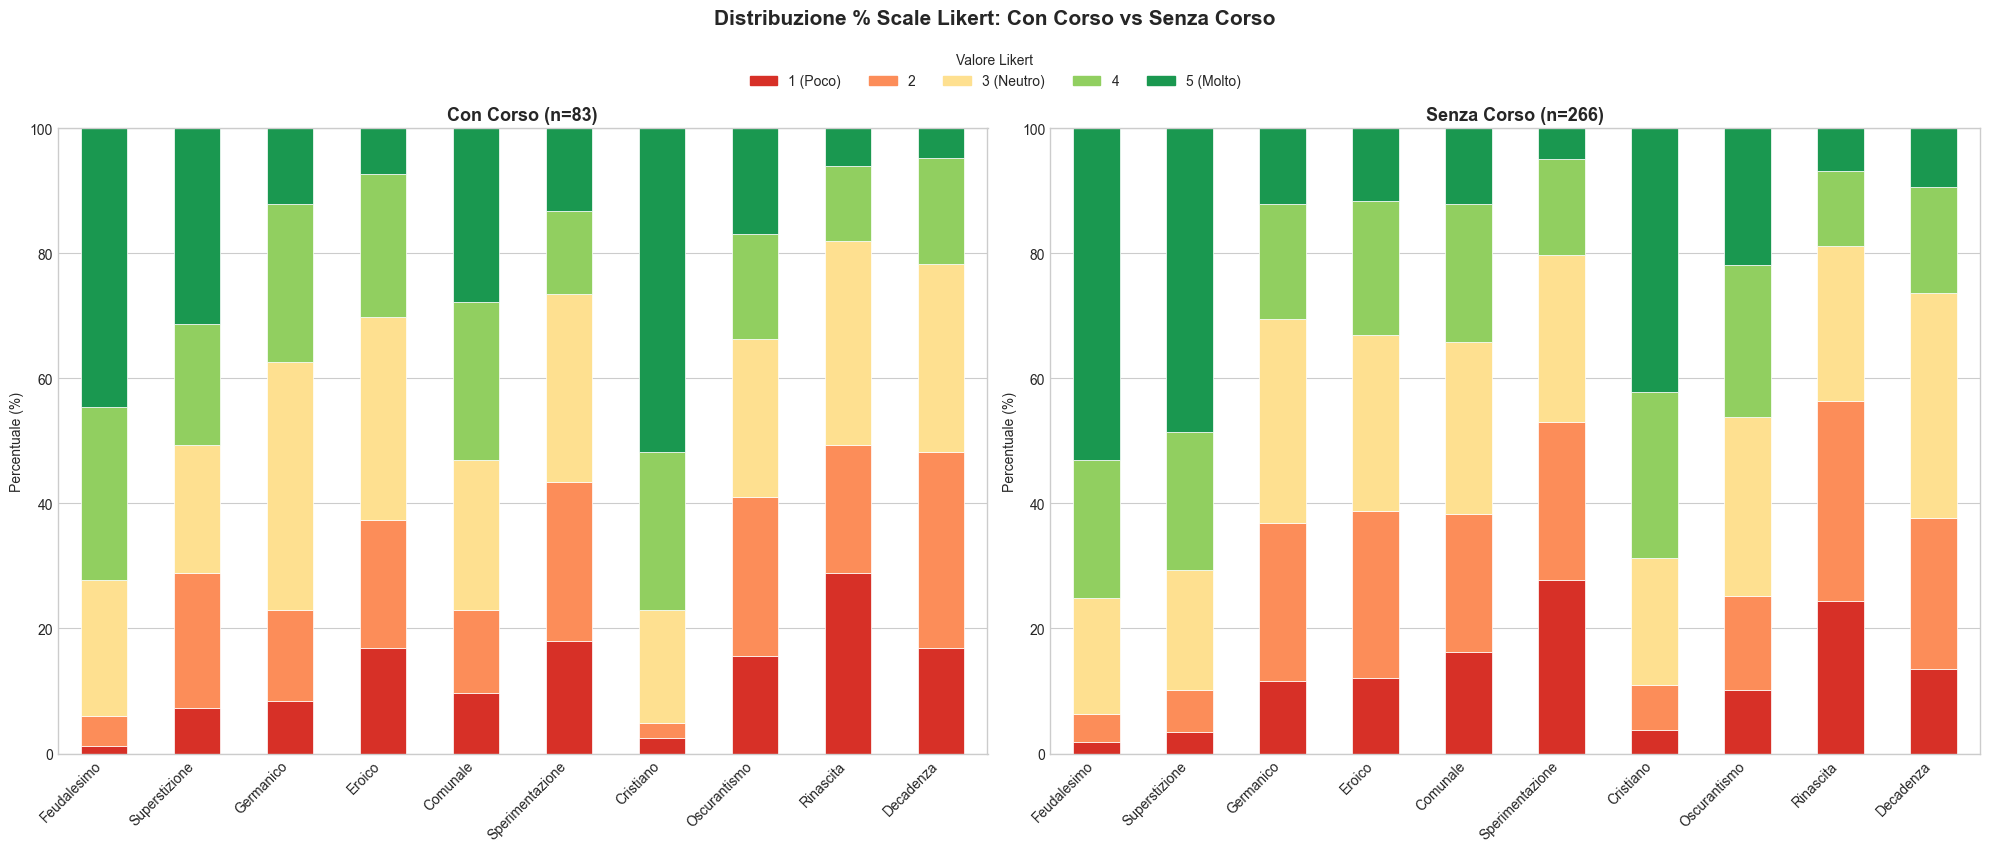

In [25]:
# Barplot percentuali Likert: Con Corso vs Senza Corso
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

colors_likert = ['#d73027', '#fc8d59', '#fee090', '#91cf60', '#1a9850']

for ax, (gruppo, titolo_gr) in zip([ax1, ax2], [('Sì', 'Con Corso'), ('No', 'Senza Corso')]):
    subset = df_num[df_num['corso_medievale'] == gruppo]
    n_gr = len(subset)

    likert_pct = subset[existing_likert].apply(
        lambda x: x.value_counts(normalize=True).sort_index().reindex([1, 2, 3, 4, 5], fill_value=0)
    ) * 100
    likert_pct_T = likert_pct.T  # righe = scale, colonne = 1..5

    likert_pct_T.plot(kind='bar', stacked=True, ax=ax, color=colors_likert,
                      edgecolor='white', linewidth=0.5, legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('Percentuale (%)')
    ax.set_title(f'{titolo_gr} (n={n_gr})', fontweight='bold', fontsize=13)
    ax.set_xticklabels([col.capitalize() for col in existing_likert], rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 100)


handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors_likert]
fig.legend(handles, ['1 (Poco)', '2', '3 (Neutro)', '4', '5 (Molto)'],
           loc='upper center', ncol=5, title='Valore Likert', fontsize=10,
           bbox_to_anchor=(0.5, 1.02))

plt.suptitle('Distribuzione % Scale Likert: Con Corso vs Senza Corso', fontweight='bold', fontsize=15, y=1.06)
plt.tight_layout()
plt.show()

### Termini Associati per Titolo di Studio
Quali termini vengono associati maggiormente al Medioevo in base al livello di istruzione?

In [53]:
# Termini Associati per Titolo di Studio
print("=" * 70)
print("📚 TERMINI ASSOCIATI AL MEDIOEVO PER TITOLO DI STUDIO")
print("=" * 70)

termini_col = 'Quali di questi termini associ più fortemente con la tua idea di medioevo? (Max 5 risposte)'

if termini_col in df.columns and 'titolo_studio' in df.columns:
    # Analizza termini per ogni titolo
    termini_per_titolo = {}
    
    for titolo in titolo_order:
        if titolo in df['titolo_studio'].values:
            subset = df[df['titolo_studio'] == titolo]
            termini_counts = {}
            n_rispondenti = 0
            
            for val in subset[termini_col].dropna():
                n_rispondenti += 1
                termini_list = [t.strip() for t in str(val).split(',')]
                for termine in termini_list:
                    if termine:
                        termini_counts[termine] = termini_counts.get(termine, 0) + 1
            
             # Ordina per frequenza
            termini_sorted = sorted(termini_counts.items(), key=lambda x: -x[1])
            
            print(f"\n📊 Frequenza dei termini associati a {titolo_short.get(titolo, titolo)} (n={n_rispondenti} rispondenti):\n")
            print("-" * 85)
            print(f"{'Termine':<35} | {'Frequenza':>10} | {'%':>8} | {'Grafico':<30}")
            print("-" * 85)
            
            for termine, count in termini_sorted:
                pct = count / n_rispondenti * 100
                bar = "█" * int(pct / 2)
                print(f"{termine:<35} | {count:>10} | {pct:>7.1f}% | {bar}")

            # Top 5 termini per questo titolo
            top5 = sorted(termini_counts.items(), key=lambda x: -x[1])[:5]
            termini_per_titolo[titolo] = {
                'top5': top5,
                'n': n_rispondenti,
                'all': termini_counts
            }    
            # Mostra top 5 per ogni titolo
            print("\n📊 TOP 5 TERMINI:\n")
            data = termini_per_titolo[titolo]
            print(f"   {titolo_short.get(titolo, titolo)} (n={data['n']}):")
            for i, (termine, count) in enumerate(data['top5'], 1):
                pct = count / data['n'] * 100 if data['n'] > 0 else 0
                print(f"      {i}. {termine}: {count} ({pct:.1f}%)")
            print()
    
    # Confronto: termini più "diversi" tra titoli
    print("\n📊 DIFFERENZE NOTEVOLI TRA TITOLI:")
    
    # Identifica tutti i termini
    all_termini = set()
    for data in termini_per_titolo.values():
        all_termini.update(data['all'].keys())
    
    for termine in list(all_termini)[:10]:  # Analizza primi 10 termini
        pcts = {}
        for titolo in titolo_order:
            if titolo in termini_per_titolo:
                data = termini_per_titolo[titolo]
                count = data['all'].get(termine, 0)
                pct = count / data['n'] * 100 if data['n'] > 0 else 0
                pcts[titolo] = pct
        
        if pcts:
            max_pct = max(pcts.values())
            min_pct = min(pcts.values())
            if max_pct - min_pct > 20:  # Differenza > 20 punti percentuali
                titolo_max = max(pcts, key=pcts.get)
                titolo_min = min(pcts, key=pcts.get)
                print(f"   • {termine}: {titolo_short.get(titolo_max, titolo_max)} ({max_pct:.0f}%) vs {titolo_short.get(titolo_min, titolo_min)} ({min_pct:.0f}%)")

📚 TERMINI ASSOCIATI AL MEDIOEVO PER TITOLO DI STUDIO

📊 Frequenza dei termini associati a Media (n=29 rispondenti):

-------------------------------------------------------------------------------------
Termine                             |  Frequenza |        % | Grafico                       
-------------------------------------------------------------------------------------
Crociate                            |         21 |    72.4% | ████████████████████████████████████
Caccia alle streghe                 |         17 |    58.6% | █████████████████████████████
Peste                               |         15 |    51.7% | █████████████████████████
Aratro                              |         14 |    48.3% | ████████████████████████
Stato pontificio                    |         11 |    37.9% | ██████████████████
Invasioni Barbariche                |         10 |    34.5% | █████████████████
Vassalli                            |         10 |    34.5% | █████████████████
Scoperta de

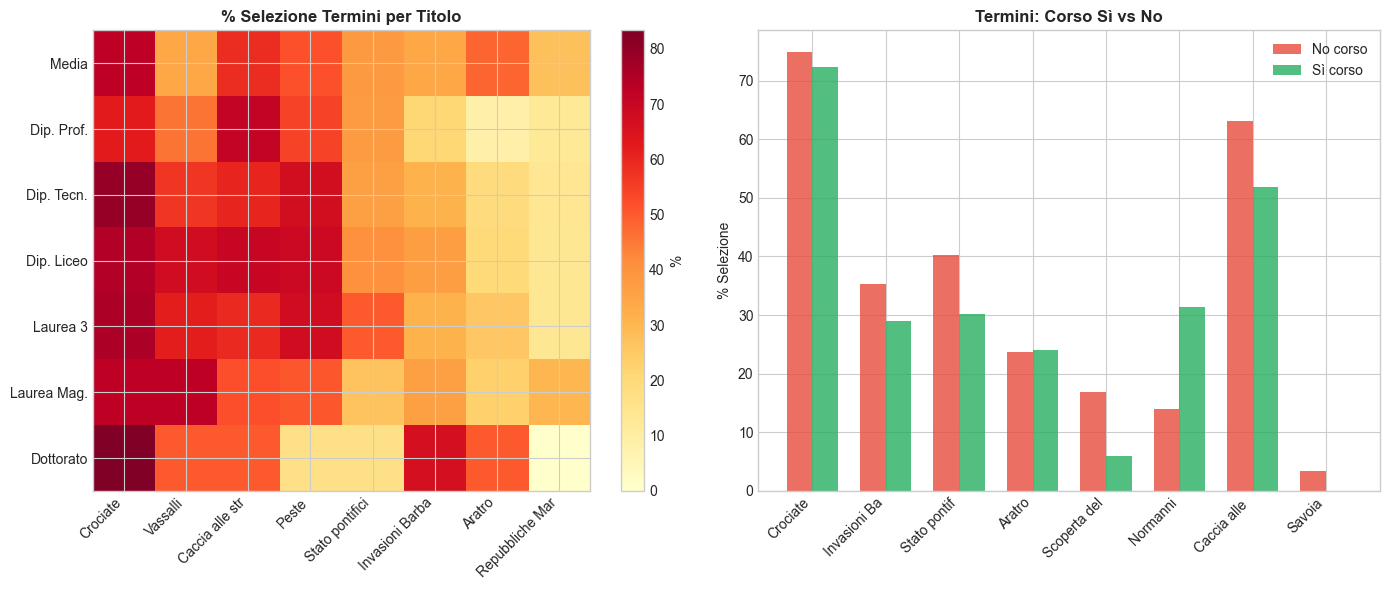

In [27]:
# Visualizzazione Termini per Titolo di Studio
# NON SO SE VANNO BENE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Heatmap dei top termini per titolo
ax1 = axes[0]
if 'termini_per_titolo' in dir():
    # Seleziona top 8 termini globali
    global_counts = {}
    for data in termini_per_titolo.values():
        for t, c in data['all'].items():
            global_counts[t] = global_counts.get(t, 0) + c
    top_termini = [t for t, _ in sorted(global_counts.items(), key=lambda x: -x[1])[:8]]
    
    # Crea matrice
    matrix_data = []
    titoli_plot = [t for t in titolo_order if t in termini_per_titolo]
    for titolo in titoli_plot:
        data = termini_per_titolo[titolo]
        row = [data['all'].get(t, 0) / data['n'] * 100 if data['n'] > 0 else 0 for t in top_termini]
        matrix_data.append(row)
    
    matrix = np.array(matrix_data)
    im = ax1.imshow(matrix, cmap='YlOrRd', aspect='auto')
    ax1.set_xticks(range(len(top_termini)))
    ax1.set_xticklabels([t[:15] for t in top_termini], rotation=45, ha='right')
    ax1.set_yticks(range(len(titoli_plot)))
    ax1.set_yticklabels([titolo_short.get(t, t) for t in titoli_plot])
    ax1.set_title('% Selezione Termini per Titolo', fontweight='bold')
    plt.colorbar(im, ax=ax1, label='%')

# 2. Confronto termini Corso Sì vs No
ax2 = axes[1]
if termini_col in df.columns and 'corso_medievale' in df.columns:
    termini_corso = {'Sì': {}, 'No': {}}
    n_corso = {'Sì': 0, 'No': 0}
    
    for corso in ['Sì', 'No']:
        subset = df[df['corso_medievale'] == corso]
        for val in subset[termini_col].dropna():
            n_corso[corso] += 1
            for t in str(val).split(','):
                t = t.strip()
                if t:
                    termini_corso[corso][t] = termini_corso[corso].get(t, 0) + 1
    
    # Top 8 termini
    top8 = list(global_counts.keys())[:8]
    x = np.arange(len(top8))
    width = 0.35
    
    si_vals = [termini_corso['Sì'].get(t, 0) / n_corso['Sì'] * 100 if n_corso['Sì'] > 0 else 0 for t in top8]
    no_vals = [termini_corso['No'].get(t, 0) / n_corso['No'] * 100 if n_corso['No'] > 0 else 0 for t in top8]
    
    ax2.bar(x - width/2, no_vals, width, label='No corso', color='#e74c3c', alpha=0.8)
    ax2.bar(x + width/2, si_vals, width, label='Sì corso', color='#27ae60', alpha=0.8)
    ax2.set_ylabel('% Selezione')
    ax2.set_title('Termini: Corso Sì vs No', fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels([t[:12] for t in top8], rotation=45, ha='right')
    ax2.legend()

plt.tight_layout()
plt.show()

### Personaggi Storici per Titolo di Studio
Come varia la percezione dei personaggi storici (% considerato medievale, % non conosco) in base al titolo di studio e all'aver frequentato un corso di storia medievale?

In [72]:
# Personaggi Storici per Titolo di Studio - Analisi Dettagliata
print("=" * 70)
print("🎭 PERSONAGGI STORICI PER TITOLO DI STUDIO")
print("=" * 70)

# --- 1. Tabella completa per OGNI personaggio × titolo ---
# Per ogni personaggio: quanti Medievale, Non Medievale, Non Conosco per ogni titolo

risultati_pers_titolo = []  # lista di dict per creare DataFrame

for col in personaggi_cols:
    nome = personaggi_nomi[col]
    
    for titolo in titolo_order:
        if titolo in df['titolo_studio'].values:
            subset = df[df['titolo_studio'] == titolo]
            n_tot = subset[col].notna().sum()
            n_med = (subset[col] == 'Sì, è medievale').sum()
            n_non_med = (subset[col] == 'No, non è medievale').sum()
            n_non_conosco = (subset[col] == 'Non conosco il personaggio').sum()
            valide = n_med + n_non_med
            pct_med = n_med / valide * 100 if valide > 0 else 0
            pct_non_conosco = n_non_conosco / n_tot * 100 if n_tot > 0 else 0
            
            risultati_pers_titolo.append({
                'personaggio': nome,
                'titolo': titolo,
                'titolo_short': titolo_short.get(titolo, titolo),
                'medievale': n_med,
                'non_medievale': n_non_med,
                'non_conosco': n_non_conosco,
                'totale': n_tot,
                'pct_medievale': pct_med,
                'pct_non_conosco': pct_non_conosco
            })

df_pers_titolo = pd.DataFrame(risultati_pers_titolo)

# Mostra tabella per ogni personaggio
print("\n📊 DETTAGLIO PER OGNI PERSONAGGIO × TITOLO DI STUDIO:")
for nome in df_personaggi.sort_values('pct_medievale', ascending=False)['nome']:
    sub = df_pers_titolo[df_pers_titolo['personaggio'] == nome]
    print(f"\n   🎭 {nome}:")
    print(f"      {'Titolo':<15} | {'Sì Med.':>8} | {'No Med.':>8} | {'Non con.':>8} | {'% Med.':>7} | {'% Non con.':>10}")
    print("      " + "-" * 72)
    for _, row in sub.iterrows():
        print(f"      {row['titolo_short']:<15} | {row['medievale']:>8} | {row['non_medievale']:>8} | "
              f"{row['non_conosco']:>8} | {row['pct_medievale']:>6.1f}% | {row['pct_non_conosco']:>9.1f}%")

# --- 2. Riepilogo aggregato: % medievale e % non conosco per titolo ---
print("\n\n" + "=" * 70)
print("📊 RIEPILOGO AGGREGATO PER TITOLO")
print("=" * 70)

personaggi_per_titolo = {}
for titolo in titolo_order:
    if titolo in df['titolo_studio'].values:
        subset = df[df['titolo_studio'] == titolo]
        pct_medievale = calcola_percentuale_medievale(subset, personaggi_cols, personaggi_nomi)
        
        non_conosco_totale = sum((subset[c] == 'Non conosco il personaggio').sum() for c in personaggi_cols)
        totale_risposte = sum(subset[c].notna().sum() for c in personaggi_cols)
        pct_non_conosco = non_conosco_totale / totale_risposte * 100 if totale_risposte > 0 else 0
        
        personaggi_per_titolo[titolo] = {
            'pct_medievale': pct_medievale, 'pct_non_conosco': pct_non_conosco, 'n': len(subset)
        }

print(f"\n   {'Titolo':<15} | {'% Medievale':>12} | {'% Non conosce':>14} | {'n':>5}")
print("   " + "-" * 55)
for titolo in titolo_order:
    if titolo in personaggi_per_titolo:
        d = personaggi_per_titolo[titolo]
        print(f"   {titolo_short.get(titolo, titolo):<15} | {d['pct_medievale']:>11.1f}% | {d['pct_non_conosco']:>13.1f}% | {d['n']:>5}")

# --- 3. Stessa analisi dettagliata per CORSO Sì vs No ---
print("\n\n" + "=" * 70)
print("🎓 PERSONAGGI STORICI PER CORSO MEDIEVALE (Sì vs No)")
print("=" * 70)

risultati_pers_corso = []

for col in personaggi_cols:
    nome = personaggi_nomi[col]
    for corso in ['Sì', 'No']:
        subset = df[df['corso_medievale'] == corso]
        n_tot = subset[col].notna().sum()
        n_med = (subset[col] == 'Sì, è medievale').sum()
        n_non_med = (subset[col] == 'No, non è medievale').sum()
        n_non_conosco = (subset[col] == 'Non conosco il personaggio').sum()
        valide = n_med + n_non_med
        pct_med = n_med / valide * 100 if valide > 0 else 0
        pct_non_conosco = n_non_conosco / n_tot * 100 if n_tot > 0 else 0
        
        risultati_pers_corso.append({
            'personaggio': nome, 'corso': corso,
            'medievale': n_med, 'non_medievale': n_non_med,
            'non_conosco': n_non_conosco, 'totale': n_tot,
            'pct_medievale': pct_med, 'pct_non_conosco': pct_non_conosco
        })

df_pers_corso = pd.DataFrame(risultati_pers_corso)

# Tabella per ogni personaggio: Corso Sì vs No
print("\n📊 DETTAGLIO PER OGNI PERSONAGGIO × CORSO:")
for nome in df_personaggi.sort_values('pct_medievale', ascending=False)['nome']:
    sub = df_pers_corso[df_pers_corso['personaggio'] == nome]
    print(f"\n   🎭 {nome}:")
    print(f"      {'Corso':<8} | {'Sì Med.':>8} | {'No Med.':>8} | {'Non con.':>8} | {'% Med.':>7} | {'% Non con.':>10}")
    print("      " + "-" * 62)
    for _, row in sub.iterrows():
        emoji = "🎓" if row['corso'] == 'Sì' else "📚"
        print(f"      {emoji} {row['corso']:<5} | {row['medievale']:>8} | {row['non_medievale']:>8} | "
              f"{row['non_conosco']:>8} | {row['pct_medievale']:>6.1f}% | {row['pct_non_conosco']:>9.1f}%")

# --- 4. Personaggi con maggiore differenza Corso Sì vs No ---
print("\n\n📊 PERSONAGGI CON MAGGIORE DIFFERENZA CORSO Sì vs No:")
print("-" * 70)

diff_corso = []
for nome in df_personaggi['nome']:
    sub = df_pers_corso[df_pers_corso['personaggio'] == nome]
    pct_si = sub[sub['corso'] == 'Sì']['pct_medievale'].values
    pct_no = sub[sub['corso'] == 'No']['pct_medievale'].values
    nc_si = sub[sub['corso'] == 'Sì']['pct_non_conosco'].values
    nc_no = sub[sub['corso'] == 'No']['pct_non_conosco'].values
    if len(pct_si) > 0 and len(pct_no) > 0:
        diff_corso.append({
            'personaggio': nome,
            'pct_med_si': pct_si[0], 'pct_med_no': pct_no[0],
            'diff_med': pct_si[0] - pct_no[0],
            'pct_nc_si': nc_si[0], 'pct_nc_no': nc_no[0],
            'diff_nc': nc_si[0] - nc_no[0]
        })

df_diff_corso = pd.DataFrame(diff_corso)

print("\n   Maggiore differenza in % medievale (Corso Sì - No):")
for _, row in df_diff_corso.nlargest(5, 'diff_med').iterrows():
    print(f"   ↑ {row['personaggio']:<25}: Sì {row['pct_med_si']:.1f}% vs No {row['pct_med_no']:.1f}%  (Δ={row['diff_med']:+.1f}%)")
for _, row in df_diff_corso.nsmallest(3, 'diff_med').iterrows():
    print(f"   ↓ {row['personaggio']:<25}: Sì {row['pct_med_si']:.1f}% vs No {row['pct_med_no']:.1f}%  (Δ={row['diff_med']:+.1f}%)")

print("\n   Maggiore differenza in % non conosco (Corso Sì - No):")
for _, row in df_diff_corso.nsmallest(5, 'diff_nc').iterrows():
    print(f"   ✅ {row['personaggio']:<25}: Sì {row['pct_nc_si']:.1f}% vs No {row['pct_nc_no']:.1f}%  (Δ={row['diff_nc']:+.1f}%)")

🎭 PERSONAGGI STORICI PER TITOLO DI STUDIO

📊 DETTAGLIO PER OGNI PERSONAGGIO × TITOLO DI STUDIO:

   🎭 Riccardo Cuor di Leone:
      Titolo          |  Sì Med. |  No Med. | Non con. |  % Med. | % Non con.
      ------------------------------------------------------------------------
      Media           |       14 |        5 |       10 |   73.7% |      34.5%
      Dip. Prof.      |       21 |        1 |        2 |   95.5% |       8.3%
      Dip. Tecn.      |       44 |        4 |       10 |   91.7% |      17.2%
      Dip. Liceo      |       59 |        4 |       11 |   93.7% |      14.9%
      Laurea 3        |       53 |       11 |       10 |   82.8% |      13.5%
      Laurea Mag.     |       72 |        7 |        4 |   91.1% |       4.8%
      Dottorato       |        3 |        2 |        1 |   60.0% |      16.7%

   🎭 Giovanna d’Arco:
      Titolo          |  Sì Med. |  No Med. | Non con. |  % Med. | % Non con.
      ----------------------------------------------------------------

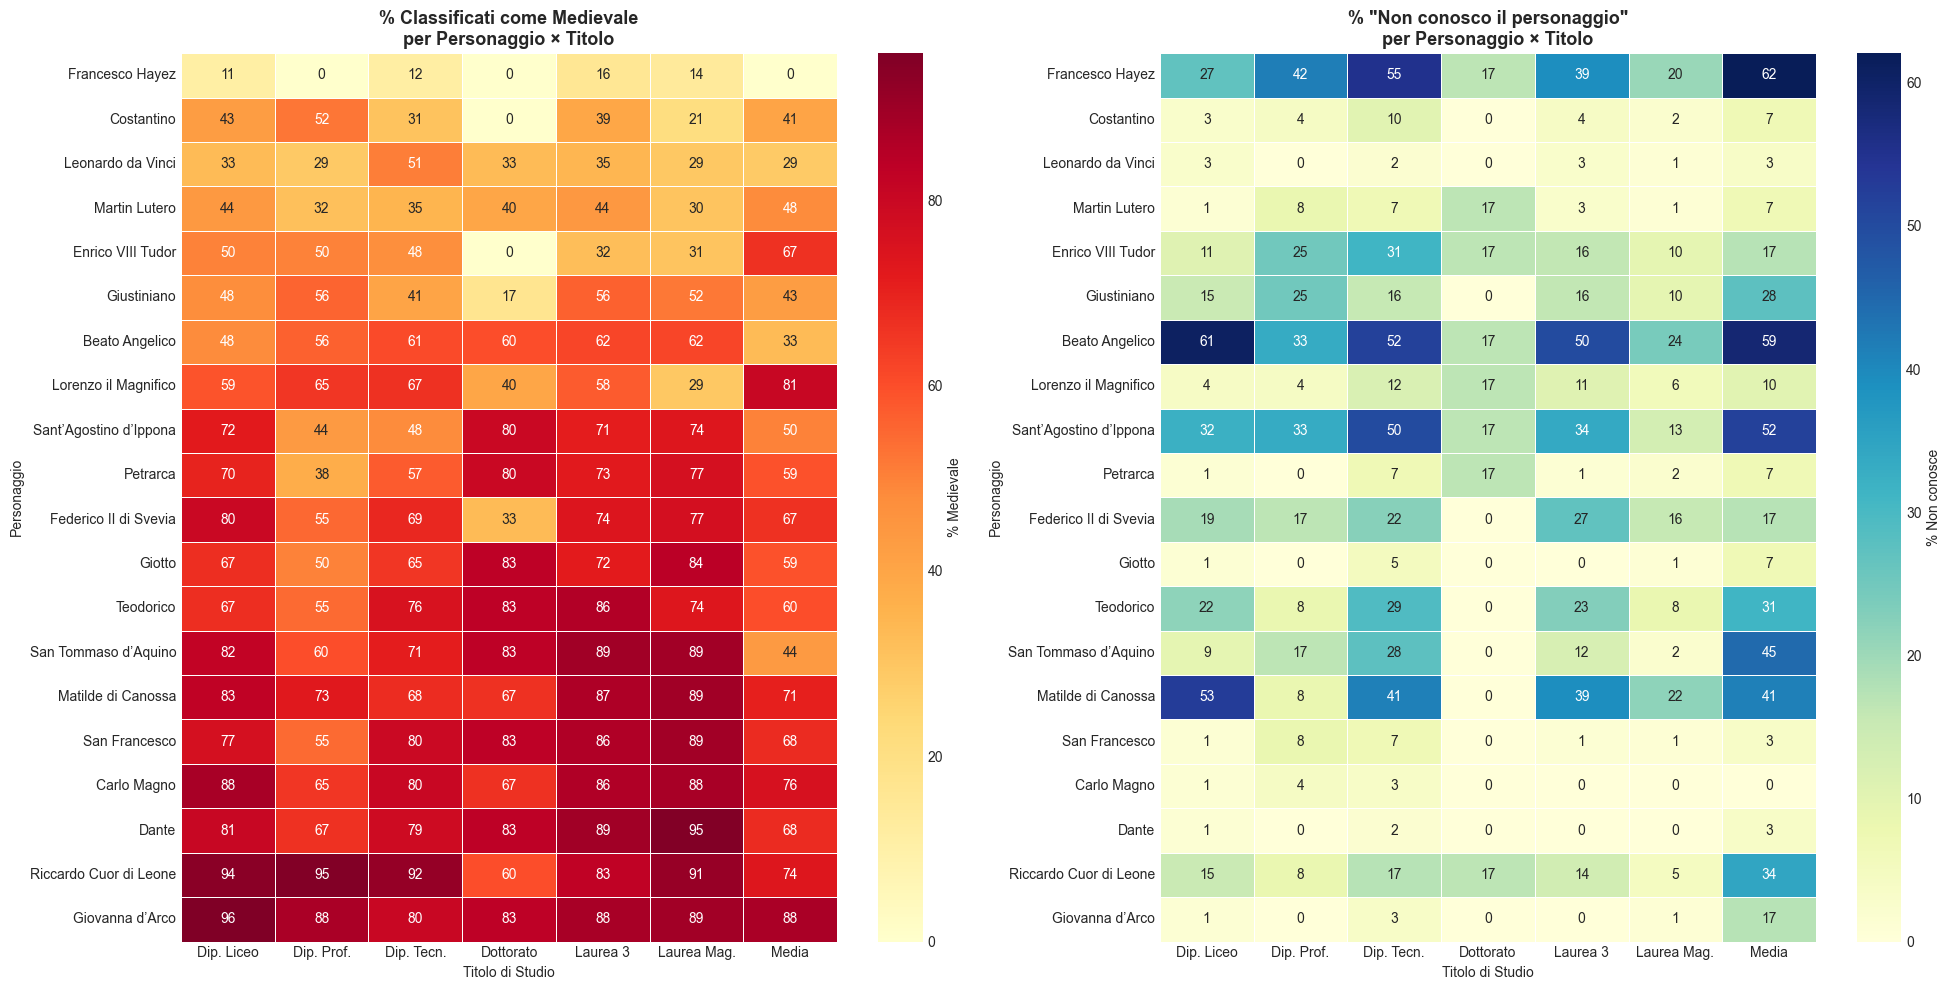

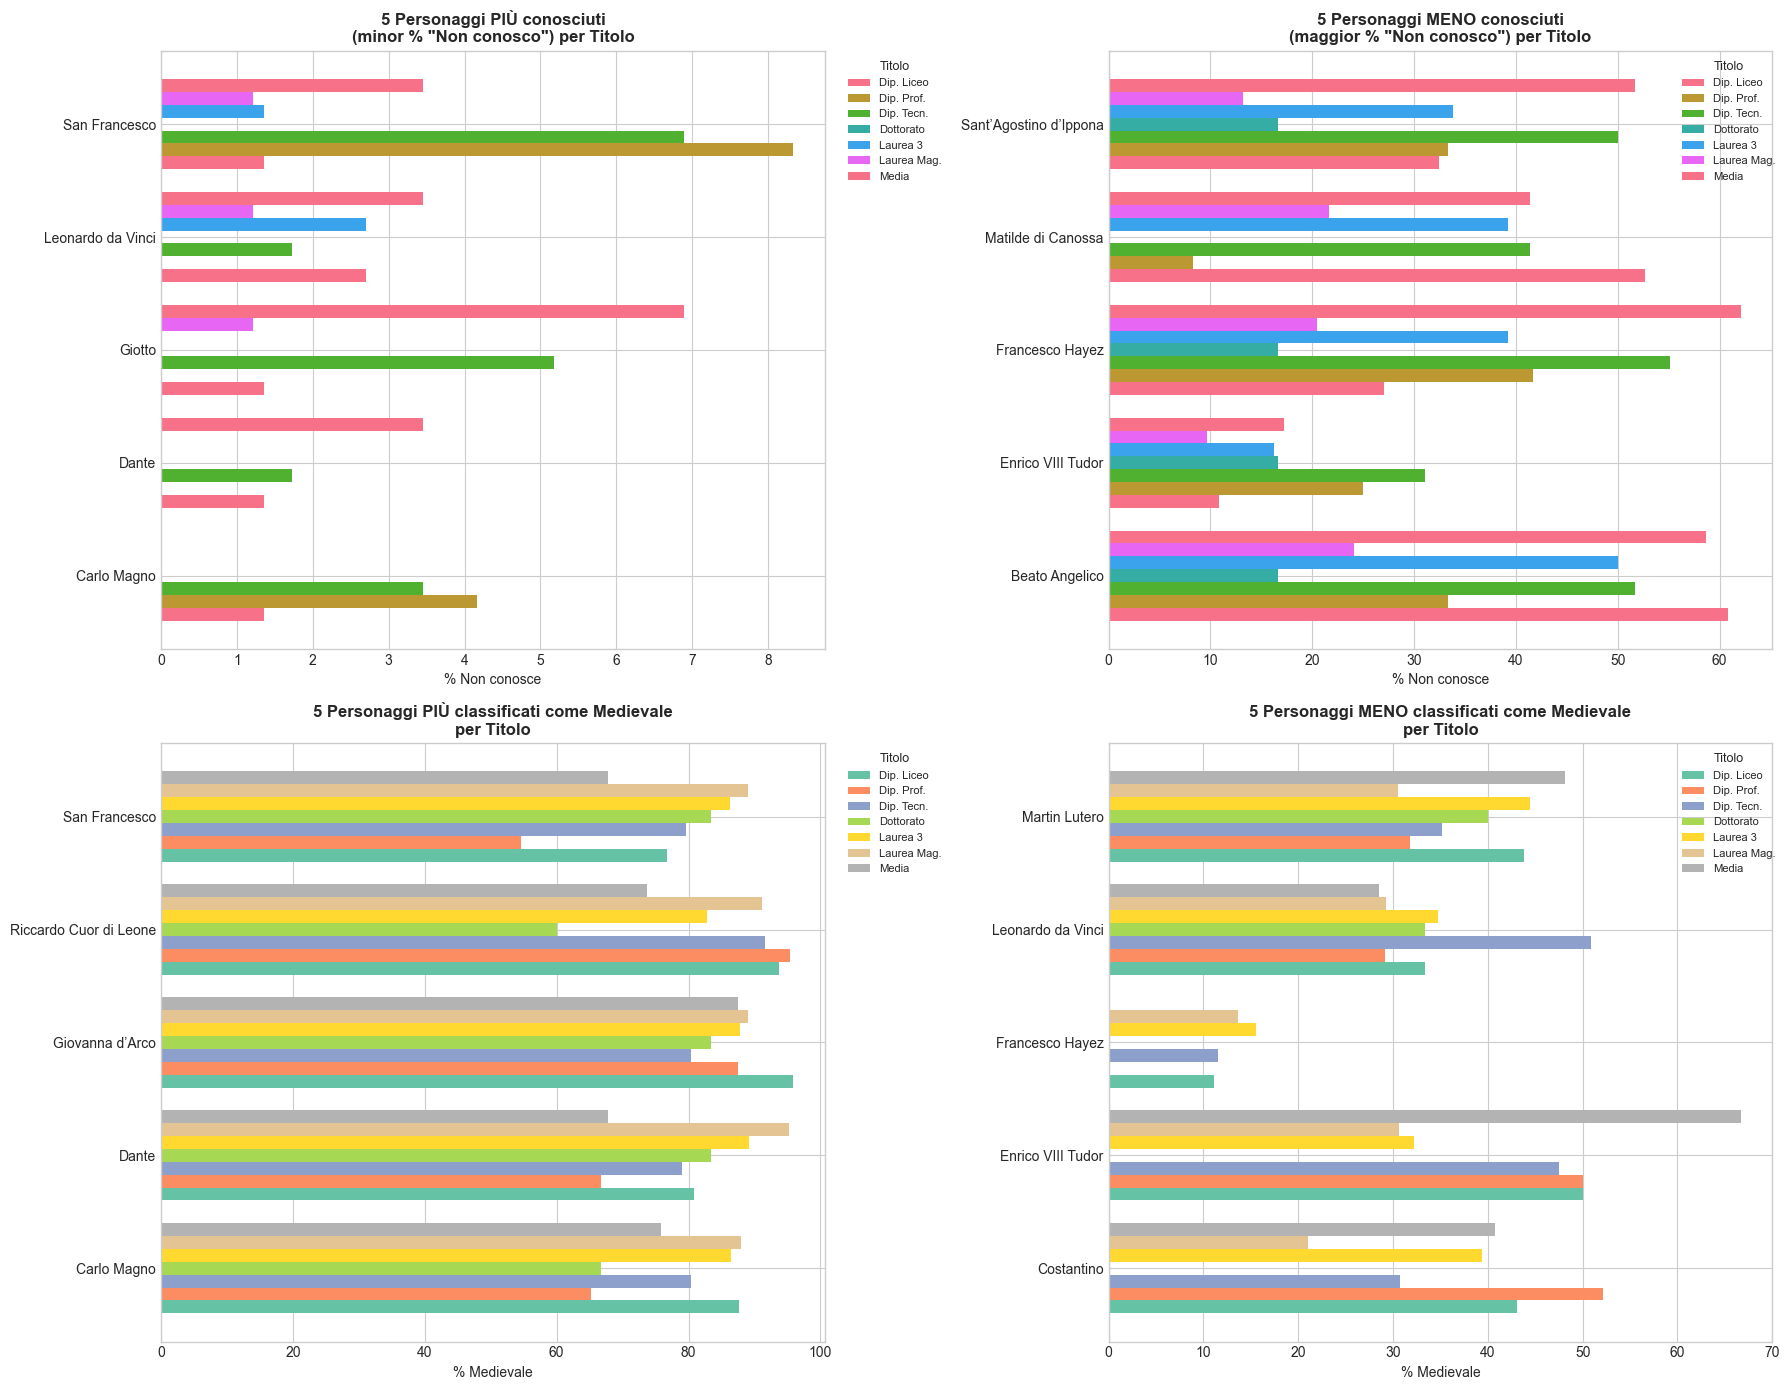

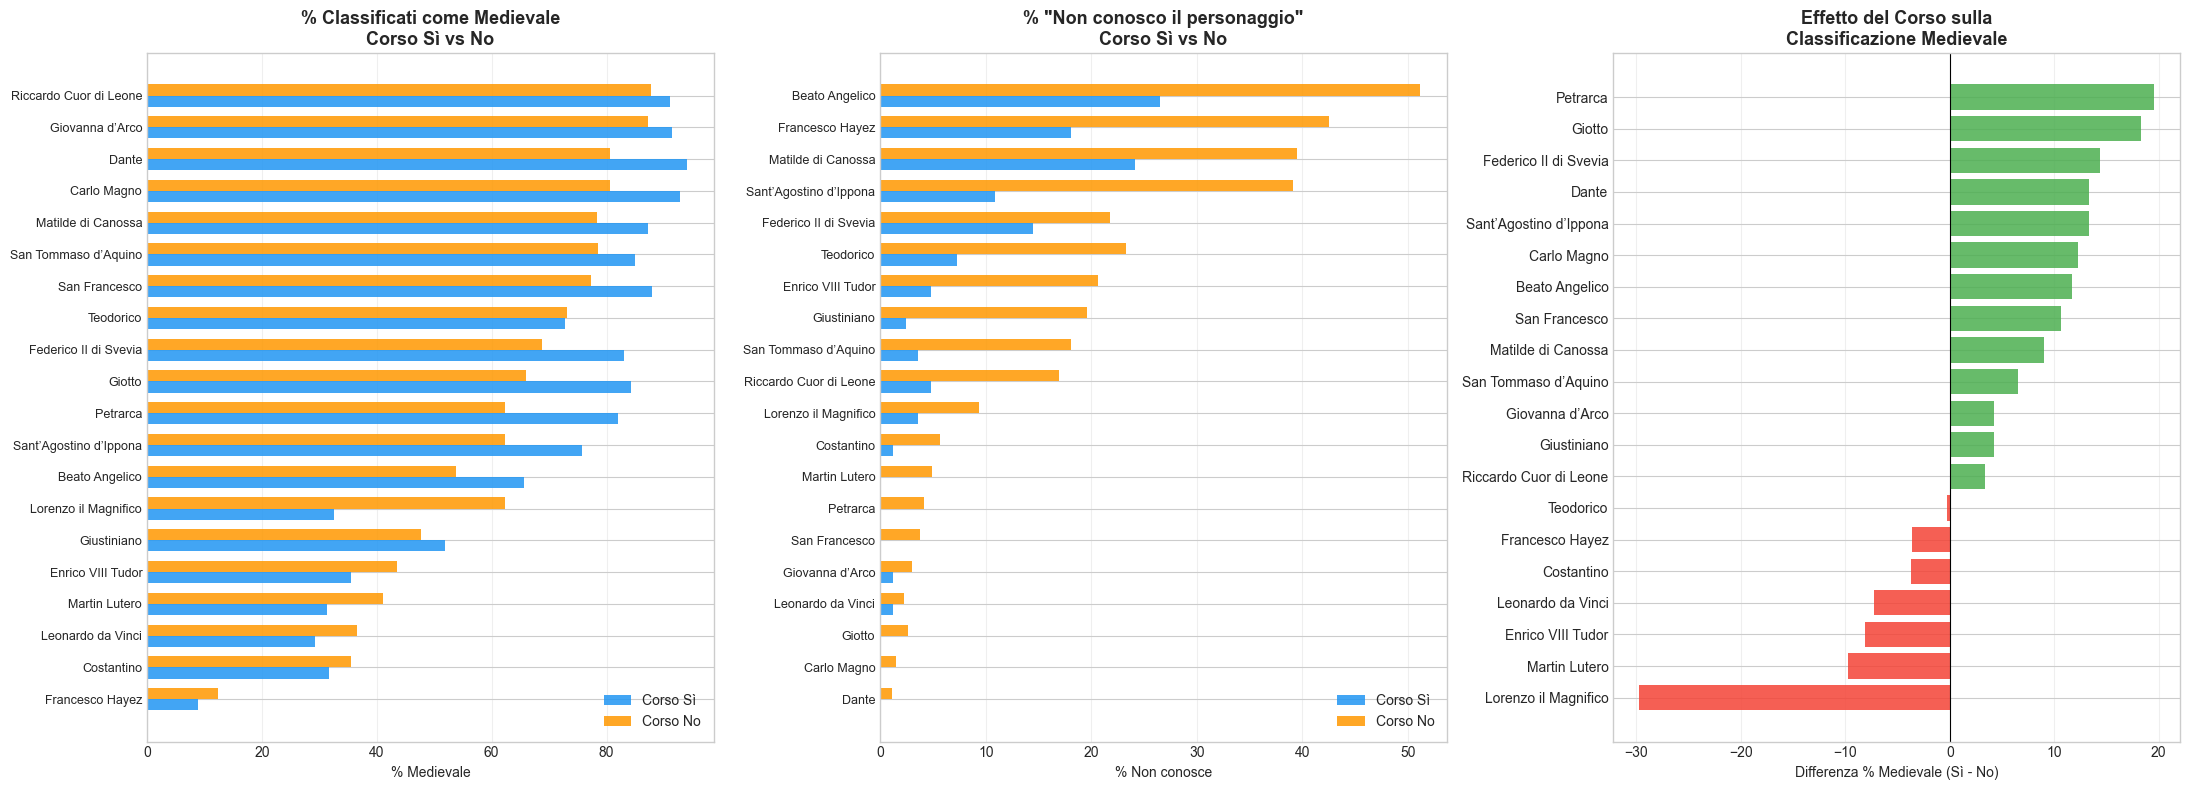

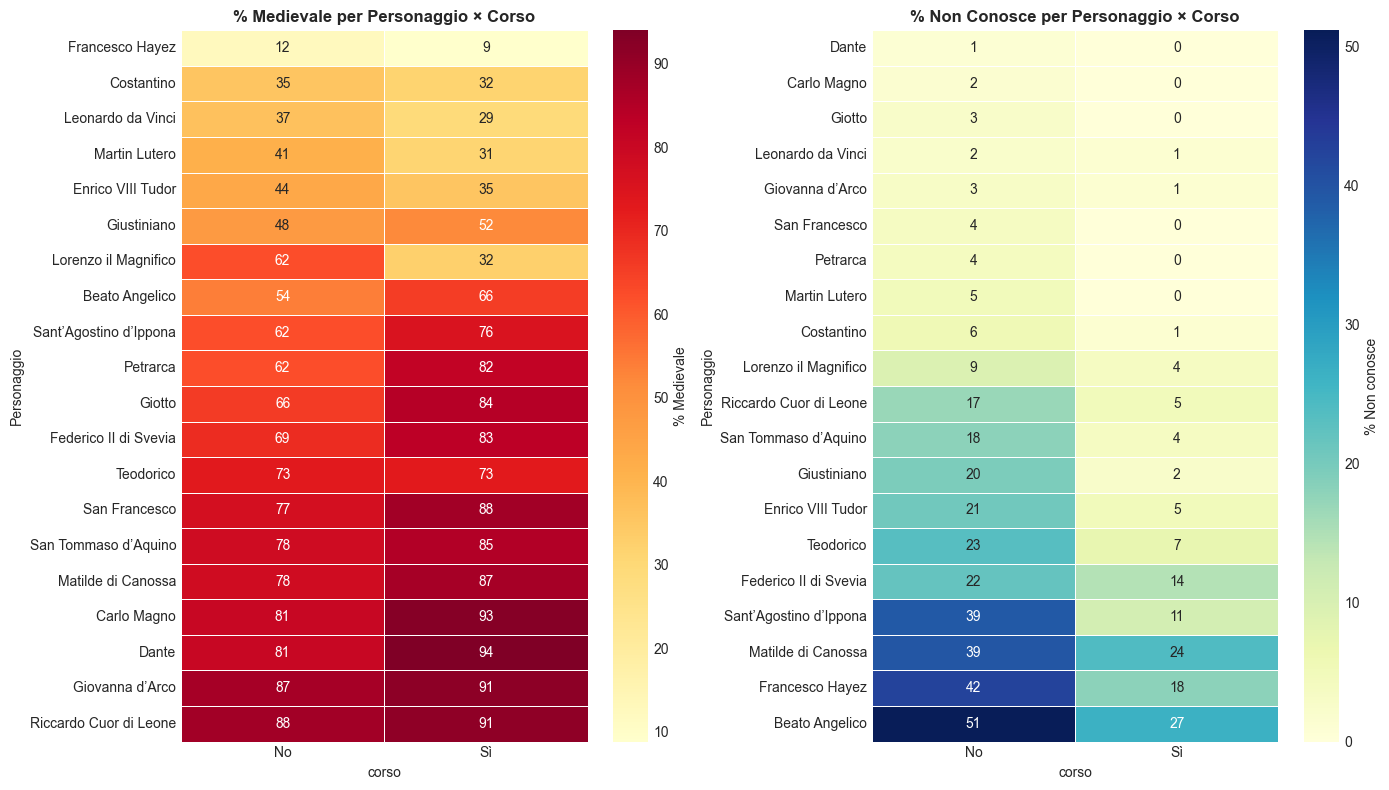

In [73]:
# VISUALIZZAZIONI: Personaggi per Titolo di Studio e Corso

# ==== GRAFICI 1-2: Heatmap % Medievale e % Non Conosco per Titolo ====
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Pivot per heatmap: personaggi × titolo (% medievale)
pivot_med = df_pers_titolo.pivot_table(values='pct_medievale', index='personaggio', columns='titolo_short')
# Ordina personaggi per media % medievale
ordine_pers_med = pivot_med.mean(axis=1).sort_values(ascending=True).index
pivot_med = pivot_med.loc[ordine_pers_med]

sns.heatmap(pivot_med, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0],
            linewidths=0.5, cbar_kws={'label': '% Medievale'})
axes[0].set_title('% Classificati come Medievale\nper Personaggio × Titolo', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Titolo di Studio')
axes[0].set_ylabel('Personaggio')

# Pivot per heatmap: personaggi × titolo (% non conosco)
pivot_nc = df_pers_titolo.pivot_table(values='pct_non_conosco', index='personaggio', columns='titolo_short')
pivot_nc = pivot_nc.loc[ordine_pers_med]

sns.heatmap(pivot_nc, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[1],
            linewidths=0.5, cbar_kws={'label': '% Non conosce'})
axes[1].set_title('% "Non conosco il personaggio"\nper Personaggio × Titolo', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Titolo di Studio')
axes[1].set_ylabel('Personaggio')

plt.tight_layout()
plt.savefig('heatmap_personaggi_titolo.png', dpi=150, bbox_inches='tight')
plt.show()

# ==== GRAFICI 3-4: Top/Bottom personaggi più/meno conosciuti per Titolo ====
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Top 5 più conosciuti (meno % non conosco) e bottom 5 (più % non conosco)
media_nc_per_pers = df_pers_titolo.groupby('personaggio')['pct_non_conosco'].mean().sort_values()
top5_conosciuti = media_nc_per_pers.head(5).index.tolist()
bottom5_conosciuti = media_nc_per_pers.tail(5).index.tolist()

# Grafico 3a: Top 5 più conosciuti per titolo
sub_top = df_pers_titolo[df_pers_titolo['personaggio'].isin(top5_conosciuti)]
pivot_top = sub_top.pivot_table(values='pct_non_conosco', index='personaggio', columns='titolo_short')
pivot_top.plot(kind='barh', ax=axes[0, 0], width=0.8)
axes[0, 0].set_title('5 Personaggi PIÙ conosciuti\n(minor % "Non conosco") per Titolo', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('% Non conosce')
axes[0, 0].set_ylabel('')
axes[0, 0].legend(title='Titolo', fontsize=8, title_fontsize=9, bbox_to_anchor=(1.02, 1))

# Grafico 3b: Bottom 5 meno conosciuti per titolo
sub_bot = df_pers_titolo[df_pers_titolo['personaggio'].isin(bottom5_conosciuti)]
pivot_bot = sub_bot.pivot_table(values='pct_non_conosco', index='personaggio', columns='titolo_short')
pivot_bot.plot(kind='barh', ax=axes[0, 1], width=0.8)
axes[0, 1].set_title('5 Personaggi MENO conosciuti\n(maggior % "Non conosco") per Titolo', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('% Non conosce')
axes[0, 1].set_ylabel('')
axes[0, 1].legend(title='Titolo', fontsize=8, title_fontsize=9, bbox_to_anchor=(1.02, 1))

# Top 5 più classificati come medievale e bottom 5
media_med_per_pers = df_pers_titolo.groupby('personaggio')['pct_medievale'].mean().sort_values(ascending=False)
top5_medievale = media_med_per_pers.head(5).index.tolist()
bottom5_medievale = media_med_per_pers.tail(5).index.tolist()

# Grafico 3c: Top 5 più classificati come medievale per titolo
sub_top_med = df_pers_titolo[df_pers_titolo['personaggio'].isin(top5_medievale)]
pivot_top_med = sub_top_med.pivot_table(values='pct_medievale', index='personaggio', columns='titolo_short')
pivot_top_med.plot(kind='barh', ax=axes[1, 0], width=0.8, colormap='Set2')
axes[1, 0].set_title('5 Personaggi PIÙ classificati come Medievale\nper Titolo', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('% Medievale')
axes[1, 0].set_ylabel('')
axes[1, 0].legend(title='Titolo', fontsize=8, title_fontsize=9, bbox_to_anchor=(1.02, 1))

# Grafico 3d: Bottom 5 meno classificati come medievale per titolo
sub_bot_med = df_pers_titolo[df_pers_titolo['personaggio'].isin(bottom5_medievale)]
pivot_bot_med = sub_bot_med.pivot_table(values='pct_medievale', index='personaggio', columns='titolo_short')
pivot_bot_med.plot(kind='barh', ax=axes[1, 1], width=0.8, colormap='Set2')
axes[1, 1].set_title('5 Personaggi MENO classificati come Medievale\nper Titolo', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('% Medievale')
axes[1, 1].set_ylabel('')
axes[1, 1].legend(title='Titolo', fontsize=8, title_fontsize=9, bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.savefig('personaggi_top_bottom_titolo.png', dpi=150, bbox_inches='tight')
plt.show()

# ==== GRAFICI 5-6: Confronto Corso Sì vs No ====
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Grafico 5a: % Medievale - Corso Sì vs No per ogni personaggio
ordine_pers = df_personaggi.sort_values('pct_medievale', ascending=True)['nome'].tolist()

corso_si = df_pers_corso[df_pers_corso['corso'] == 'Sì'].set_index('personaggio').loc[ordine_pers]
corso_no = df_pers_corso[df_pers_corso['corso'] == 'No'].set_index('personaggio').loc[ordine_pers]

y_pos = np.arange(len(ordine_pers))
bar_h = 0.35

axes[0].barh(y_pos - bar_h/2, corso_si['pct_medievale'], bar_h, label='Corso Sì', color='#2196F3', alpha=0.85)
axes[0].barh(y_pos + bar_h/2, corso_no['pct_medievale'], bar_h, label='Corso No', color='#FF9800', alpha=0.85)
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(ordine_pers, fontsize=9)
axes[0].set_xlabel('% Medievale')
axes[0].set_title('% Classificati come Medievale\nCorso Sì vs No', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Grafico 5b: % Non conosco - Corso Sì vs No
ordine_nc = df_personaggi.sort_values('pct_non_conosco', ascending=True)['nome'].tolist()
corso_si_nc = df_pers_corso[df_pers_corso['corso'] == 'Sì'].set_index('personaggio').loc[ordine_nc]
corso_no_nc = df_pers_corso[df_pers_corso['corso'] == 'No'].set_index('personaggio').loc[ordine_nc]

axes[1].barh(y_pos - bar_h/2, corso_si_nc['pct_non_conosco'], bar_h, label='Corso Sì', color='#2196F3', alpha=0.85)
axes[1].barh(y_pos + bar_h/2, corso_no_nc['pct_non_conosco'], bar_h, label='Corso No', color='#FF9800', alpha=0.85)
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(ordine_nc, fontsize=9)
axes[1].set_xlabel('% Non conosce')
axes[1].set_title('% "Non conosco il personaggio"\nCorso Sì vs No', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

# Grafico 5c: Differenza Corso Sì - No (% medievale)
df_diff_sorted = df_diff_corso.sort_values('diff_med')
colors = ['#4CAF50' if x > 0 else '#F44336' for x in df_diff_sorted['diff_med']]
axes[2].barh(df_diff_sorted['personaggio'], df_diff_sorted['diff_med'], color=colors, alpha=0.85)
axes[2].axvline(x=0, color='black', linewidth=0.8)
axes[2].set_xlabel('Differenza % Medievale (Sì - No)')
axes[2].set_title('Effetto del Corso sulla\nClassificazione Medievale', fontsize=13, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('personaggi_corso_confronto.png', dpi=150, bbox_inches='tight')
plt.show()

# ==== GRAFICO 7: Heatmap Corso × Personaggi ====
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

pivot_corso_med = df_pers_corso.pivot_table(values='pct_medievale', index='personaggio', columns='corso')
pivot_corso_med = pivot_corso_med.loc[ordine_pers]
sns.heatmap(pivot_corso_med, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0],
            linewidths=0.5, cbar_kws={'label': '% Medievale'})
axes[0].set_title('% Medievale per Personaggio × Corso', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Personaggio')

pivot_corso_nc = df_pers_corso.pivot_table(values='pct_non_conosco', index='personaggio', columns='corso')
pivot_corso_nc = pivot_corso_nc.loc[ordine_nc]
sns.heatmap(pivot_corso_nc, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[1],
            linewidths=0.5, cbar_kws={'label': '% Non conosce'})
axes[1].set_title('% Non Conosce per Personaggio × Corso', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Personaggio')

plt.tight_layout()
plt.savefig('heatmap_personaggi_corso.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Analisi per Sesso
Come variano le risposte tra uomini e donne?

Questa sezione replica le analisi preliminari suddividendole per:
- **Opinione sul medioevo** per sesso
- **Scale Likert** per sesso
- **Termini associati** per sesso
- **Personaggi storici** per sesso
- **Test statistici** per verificare differenze significative

In [31]:
# Analisi per Sesso - Opinione e Scale Likert
print("=" * 70)
print("👤 ANALISI PER SESSO")
print("=" * 70)

if 'sesso' in df.columns:
    sessi = [s for s in ['Uomo', 'Donna'] if s in df['sesso'].values]
    # Includi anche altri valori (Non-binario, Preferisco non rispondere) se presenti
    altri_sessi = [s for s in df['sesso'].unique() if s not in sessi]
    sessi_all = sessi + altri_sessi
    
    # 1. Distribuzione per sesso
    print("\n📊 DISTRIBUZIONE PER SESSO:")
    sesso_counts = df['sesso'].value_counts()
    for s in sessi_all:
        if s in sesso_counts.index:
            count = sesso_counts[s]
            pct = count / len(df) * 100
            print(f"   {s:<30} | {count:>4} ({pct:>5.1f}%)")
    
    # 2. Opinione media per sesso
    print("\n📊 OPINIONE SUL MEDIOEVO PER SESSO:")
    if 'opinione_medioevo_num' in df_num.columns:
        opinione_per_sesso = df_num.groupby('sesso')['opinione_medioevo_num'].agg(['mean', 'std', 'count'])
        for sesso in sessi_all:
            if sesso in opinione_per_sesso.index:
                media = opinione_per_sesso.loc[sesso, 'mean']
                std = opinione_per_sesso.loc[sesso, 'std']
                n = int(opinione_per_sesso.loc[sesso, 'count'])
                emoji = "😊" if media >= 3.5 else "😐" if media >= 2.5 else "😔"
                print(f"   {emoji} {sesso:<20} | Media: {media:.2f} ± {std:.2f} (n={n})")
        
        # Distribuzione opinioni per sesso
        print("\n📊 DISTRIBUZIONE OPINIONI PER SESSO:")
        opinione_order = ['Assolutamente negativa', 'Parzialmente negativa', 'Neutrale', 
                          'Parzialmente positiva', 'Assolutamente positiva']
        cross_opinione = pd.crosstab(df['sesso'], df['opinione_medioevo'], normalize='index') * 100
        for sesso in sessi_all:
            if sesso in cross_opinione.index:
                print(f"\n   {sesso}:")
                for op in opinione_order:
                    if op in cross_opinione.columns:
                        pct = cross_opinione.loc[sesso, op]
                        bar = "█" * int(pct / 3)
                        print(f"      {op:<30} | {pct:>5.1f}% {bar}")
    
    # 3. Scale Likert medie per sesso
    print("\n📊 SCALE LIKERT MEDIE PER SESSO:")
    if existing_likert and 'sesso' in df_num.columns:
        likert_per_sesso = df_num.groupby('sesso')[existing_likert].mean()
        display(likert_per_sesso.round(2))
        
        # Differenze rilevanti
        print("\n📊 DIFFERENZE SCALE LIKERT TRA SESSI:")
        if len(sessi) >= 2:
            for col in existing_likert:
                vals = [df_num[df_num['sesso'] == s][col].mean() for s in sessi]
                diff = abs(vals[0] - vals[1])
                if diff > 0.3:
                    max_s = sessi[np.argmax(vals)]
                    min_s = sessi[np.argmin(vals)]
                    print(f"   • {col.capitalize()}: {max_s} ({max(vals):.2f}) vs {min_s} ({min(vals):.2f}), Δ={diff:.2f}")

👤 ANALISI PER SESSO

📊 DISTRIBUZIONE PER SESSO:
   Uomo                           |  155 ( 44.4%)
   Donna                          |  188 ( 53.9%)
   Non-Binario                    |    4 (  1.1%)
   Altro                          |    2 (  0.6%)

📊 OPINIONE SUL MEDIOEVO PER SESSO:
   😐 Uomo                 | Media: 2.99 ± 1.04 (n=155)
   😐 Donna                | Media: 2.97 ± 1.03 (n=188)
   😐 Non-Binario          | Media: 2.75 ± 0.96 (n=4)
   😊 Altro                | Media: 3.50 ± 0.71 (n=2)

📊 DISTRIBUZIONE OPINIONI PER SESSO:

   Uomo:
      Assolutamente negativa         |   7.7% ██
      Parzialmente negativa          |  24.5% ████████
      Neutrale                       |  35.5% ███████████
      Parzialmente positiva          |  25.8% ████████
      Assolutamente positiva         |   6.5% ██

   Donna:
      Assolutamente negativa         |   5.3% █
      Parzialmente negativa          |  28.7% █████████
      Neutrale                       |  39.4% █████████████
      Parzia

,feudalesimo,superstizione,germanico,eroico,comunale,sperimentazione,cristiano,oscurantismo,rinascita,decadenza
sesso,,,,,,,,,,
Altro,5.00,5.00,4.00,2.00,3.50,3.00,4.00,4.50,1.50,3.50
Donna,4.09,3.90,2.90,2.85,2.93,2.55,3.88,3.20,2.43,2.73
Non-Binario,4.00,3.00,2.75,3.25,3.25,1.50,4.50,3.25,1.75,2.00
Uomo,4.28,3.94,3.11,3.00,3.19,2.52,4.19,3.26,2.51,2.88



📊 DIFFERENZE SCALE LIKERT TRA SESSI:
   • Cristiano: Uomo (4.19) vs Donna (3.88), Δ=0.31


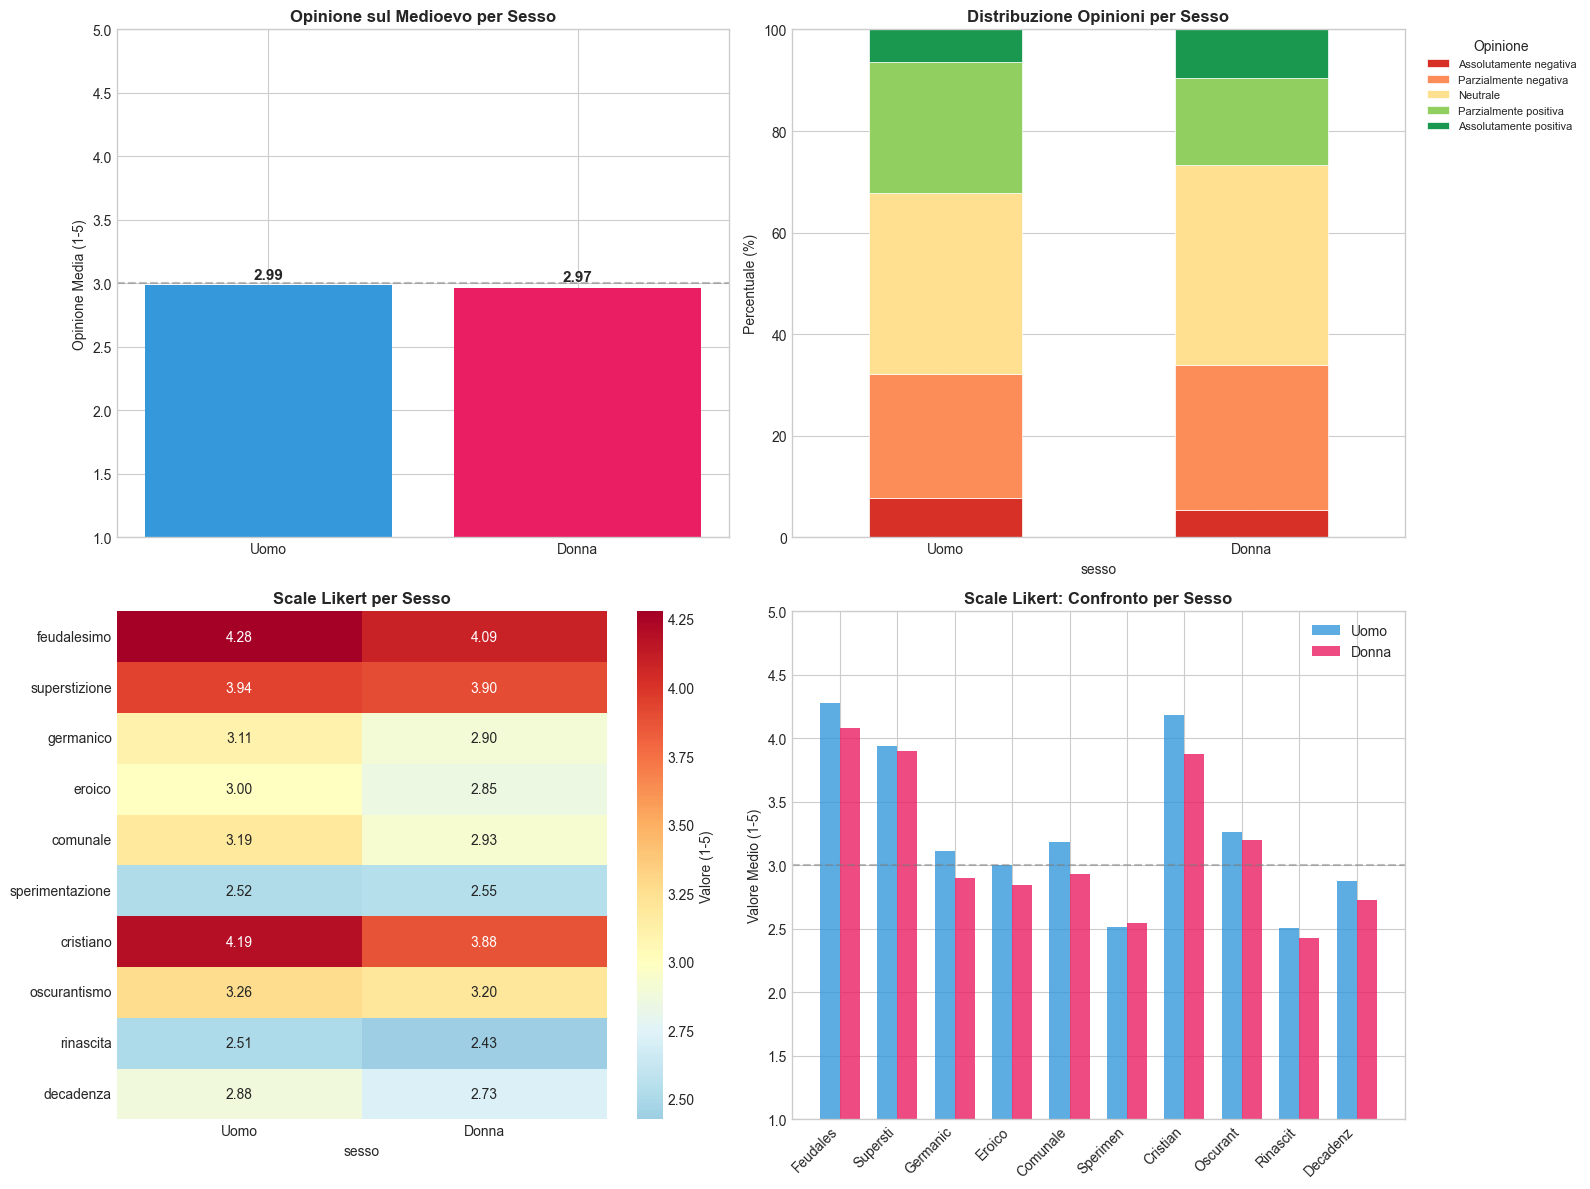

In [32]:
# Visualizzazioni per Sesso - Opinione e Scale Likert
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sessi = [s for s in ['Uomo', 'Donna'] if s in df['sesso'].values]
colors_sesso = {'Uomo': '#3498db', 'Donna': '#e91e63'}

# 1. Opinione media per sesso
ax1 = axes[0, 0]
if 'opinione_medioevo_num' in df_num.columns:
    opinioni = [df_num[df_num['sesso'] == s]['opinione_medioevo_num'].mean() for s in sessi]
    bars = ax1.bar(sessi, opinioni, color=[colors_sesso.get(s, '#95a5a6') for s in sessi])
    ax1.set_ylabel('Opinione Media (1-5)')
    ax1.set_title('Opinione sul Medioevo per Sesso', fontweight='bold')
    ax1.axhline(y=3, color='gray', linestyle='--', alpha=0.5)
    ax1.set_ylim(1, 5)
    for bar, val in zip(bars, opinioni):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                f'{val:.2f}', ha='center', fontsize=11, fontweight='bold')

# 2. Distribuzione opinioni per sesso (stacked bar %)
ax2 = axes[0, 1]
if 'opinione_medioevo' in df.columns:
    opinione_order = ['Assolutamente negativa', 'Parzialmente negativa', 'Neutrale',
                      'Parzialmente positiva', 'Assolutamente positiva']
    colors_op = ['#d73027', '#fc8d59', '#fee090', '#91cf60', '#1a9850']
    
    cross_pct = pd.crosstab(df['sesso'], df['opinione_medioevo'], normalize='index') * 100
    cross_pct = cross_pct.reindex(columns=[o for o in opinione_order if o in cross_pct.columns])
    cross_pct = cross_pct.reindex([s for s in sessi if s in cross_pct.index])
    
    cross_pct.plot(kind='bar', stacked=True, ax=ax2, color=colors_op[:len(cross_pct.columns)],
                   edgecolor='white', linewidth=0.5)
    ax2.set_ylabel('Percentuale (%)')
    ax2.set_title('Distribuzione Opinioni per Sesso', fontweight='bold')
    ax2.set_xticklabels(sessi, rotation=0)
    ax2.legend(title='Opinione', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
    ax2.set_ylim(0, 100)

# 3. Heatmap scale Likert per sesso
ax3 = axes[1, 0]
if existing_likert and 'sesso' in df_num.columns:
    likert_sesso_matrix = df_num.groupby('sesso')[existing_likert].mean()
    likert_sesso_matrix = likert_sesso_matrix.reindex([s for s in sessi if s in likert_sesso_matrix.index])
    
    sns.heatmap(likert_sesso_matrix.T, annot=True, fmt='.2f', cmap='RdYlBu_r',
                center=3, ax=ax3, cbar_kws={'label': 'Valore (1-5)'})
    ax3.set_title('Scale Likert per Sesso', fontweight='bold')

# 4. Scale Likert a confronto (grouped bar)
ax4 = axes[1, 1]
if existing_likert and len(sessi) >= 2:
    x = np.arange(len(existing_likert))
    width = 0.35
    
    vals_s1 = [df_num[df_num['sesso'] == sessi[0]][col].mean() for col in existing_likert]
    vals_s2 = [df_num[df_num['sesso'] == sessi[1]][col].mean() for col in existing_likert]
    
    ax4.bar(x - width/2, vals_s1, width, label=sessi[0], color=colors_sesso.get(sessi[0], '#3498db'), alpha=0.8)
    ax4.bar(x + width/2, vals_s2, width, label=sessi[1], color=colors_sesso.get(sessi[1], '#e91e63'), alpha=0.8)
    ax4.set_ylabel('Valore Medio (1-5)')
    ax4.set_title('Scale Likert: Confronto per Sesso', fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels([col[:8].capitalize() for col in existing_likert], rotation=45, ha='right')
    ax4.legend()
    ax4.axhline(y=3, color='gray', linestyle='--', alpha=0.5)
    ax4.set_ylim(1, 5)

plt.tight_layout()
plt.show()

In [33]:
# Termini Associati per Sesso
print("=" * 70)
print("📚 TERMINI ASSOCIATI AL MEDIOEVO PER SESSO")
print("=" * 70)

termini_col = 'Quali di questi termini associ più fortemente con la tua idea di medioevo? (Max 5 risposte)'

if termini_col in df.columns and 'sesso' in df.columns:
    termini_per_sesso = {}
    
    for sesso in sessi_all:
        subset = df[df['sesso'] == sesso]
        termini_counts = {}
        n_rispondenti = 0
        
        for val in subset[termini_col].dropna():
            n_rispondenti += 1
            termini_list = [t.strip() for t in str(val).split(',')]
            for termine in termini_list:
                if termine:
                    termini_counts[termine] = termini_counts.get(termine, 0) + 1
        
        top5 = sorted(termini_counts.items(), key=lambda x: -x[1])[:5]
        termini_per_sesso[sesso] = {'top5': top5, 'n': n_rispondenti, 'all': termini_counts}
    
    # Mostra top 5 per sesso
    print("\n📊 TOP 5 TERMINI PER SESSO:\n")
    for sesso in sessi_all:
        if sesso in termini_per_sesso:
            data = termini_per_sesso[sesso]
            print(f"   {sesso} (n={data['n']}):")
            for i, (termine, count) in enumerate(data['top5'], 1):
                pct = count / data['n'] * 100 if data['n'] > 0 else 0
                print(f"      {i}. {termine}: {count} ({pct:.1f}%)")
            print()
    
    # Differenze notevoli tra sessi
    if len(sessi) >= 2:
        print("\n📊 DIFFERENZE NOTEVOLI TRA SESSI:")
        all_termini = set()
        for data in termini_per_sesso.values():
            all_termini.update(data['all'].keys())
        
        for termine in all_termini:
            pcts = {}
            for sesso in sessi:
                if sesso in termini_per_sesso:
                    data = termini_per_sesso[sesso]
                    count = data['all'].get(termine, 0)
                    pct = count / data['n'] * 100 if data['n'] > 0 else 0
                    pcts[sesso] = pct
            
            if len(pcts) >= 2 and max(pcts.values()) - min(pcts.values()) > 15:
                max_s = max(pcts, key=pcts.get)
                min_s = min(pcts, key=pcts.get)
                print(f"   • {termine}: {max_s} ({pcts[max_s]:.0f}%) vs {min_s} ({pcts[min_s]:.0f}%)")

📚 TERMINI ASSOCIATI AL MEDIOEVO PER SESSO

📊 TOP 5 TERMINI PER SESSO:

   Uomo (n=155):
      1. Crociate: 122 (78.7%)
      2. Vassalli: 95 (61.3%)
      3. Peste: 90 (58.1%)
      4. Caccia alle streghe: 89 (57.4%)
      5. Stato pontificio: 61 (39.4%)

   Donna (n=188):
      1. Crociate: 132 (70.2%)
      2. Caccia alle streghe: 118 (62.8%)
      3. Peste: 116 (61.7%)
      4. Vassalli: 115 (61.2%)
      5. Invasioni Barbariche: 74 (39.4%)

   Non-Binario (n=4):
      1. Caccia alle streghe: 4 (100.0%)
      2. Peste: 4 (100.0%)
      3. Crociate: 3 (75.0%)
      4. Stato pontificio: 1 (25.0%)
      5. Invasioni Barbariche: 1 (25.0%)

   Altro (n=2):
      1. Crociate: 2 (100.0%)
      2. Vassalli: 2 (100.0%)
      3. Peste: 1 (50.0%)
      4. Invasioni Barbariche: 1 (50.0%)
      5. Normanni: 1 (50.0%)


📊 DIFFERENZE NOTEVOLI TRA SESSI:


In [34]:
# Personaggi Storici per Sesso
print("=" * 70)
print("🎭 PERSONAGGI STORICI PER SESSO")
print("=" * 70)

# % medievale e % non conosco per sesso
pct_medievale_sesso = {}
for sesso in sessi_all:
    subset = df[df['sesso'] == sesso]
    pct = calcola_percentuale_medievale(subset, personaggi_cols, personaggi_nomi)
    
    non_conosco_totale = 0
    totale_risposte = 0
    for col in personaggi_cols:
        non_conosco_totale += (subset[col] == 'Non conosco il personaggio').sum()
        totale_risposte += subset[col].notna().sum()
    pct_nc = non_conosco_totale / totale_risposte * 100 if totale_risposte > 0 else 0
    
    pct_medievale_sesso[sesso] = {'pct_medievale': pct, 'pct_non_conosco': pct_nc, 'n': len(subset)}

print("\n📊 % CONSIDERATO MEDIEVALE E % NON CONOSCO PER SESSO:\n")
print(f"   {'Sesso':<20} | {'% Medievale':>12} | {'% Non conosce':>14} | {'n':>5}")
print("-" * 60)
for sesso in sessi_all:
    if sesso in pct_medievale_sesso:
        data = pct_medievale_sesso[sesso]
        print(f"   {sesso:<20} | {data['pct_medievale']:>11.1f}% | {data['pct_non_conosco']:>13.1f}% | {data['n']:>5}")

# Dettaglio per personaggi chiave
print("\n📊 PERSONAGGI CHIAVE PER SESSO:")
if 'df_personaggi' in dir():
    top_personaggi = df_personaggi.nlargest(6, 'pct_medievale')['nome'].tolist()
    bottom_personaggi = df_personaggi.nsmallest(3, 'pct_medievale')['nome'].tolist()
    personaggi_chiave = top_personaggi + bottom_personaggi
    
    for nome in personaggi_chiave:
        col_match = [c for c in personaggi_cols if personaggi_nomi.get(c) == nome]
        if col_match:
            col = col_match[0]
            print(f"\n   {nome}:")
            for sesso in sessi:
                subset = df[df['sesso'] == sesso]
                medievale = (subset[col] == 'Sì, è medievale').sum()
                valide = subset[col].isin(['Sì, è medievale', 'No, non è medievale']).sum()
                pct = medievale / valide * 100 if valide > 0 else 0
                print(f"      {sesso:<15}: {pct:>5.1f}% medievale")

🎭 PERSONAGGI STORICI PER SESSO

📊 % CONSIDERATO MEDIEVALE E % NON CONOSCO PER SESSO:

   Sesso                |  % Medievale |  % Non conosce |     n
------------------------------------------------------------
   Uomo                 |        64.5% |          14.5% |   155
   Donna                |        62.4% |          13.4% |   188
   Non-Binario          |        69.4% |          22.5% |     4
   Altro                |        70.0% |          25.0% |     2

📊 PERSONAGGI CHIAVE PER SESSO:

   Riccardo Cuor di Leone:
      Uomo           :  89.7% medievale
      Donna          :  88.1% medievale

   Giovanna d’Arco:
      Uomo           :  86.9% medievale
      Donna          :  89.6% medievale

   Dante:
      Uomo           :  84.4% medievale
      Donna          :  83.3% medievale

   Carlo Magno:
      Uomo           :  86.5% medievale
      Donna          :  81.0% medievale

   Matilde di Canossa:
      Uomo           :  80.2% medievale
      Donna          :  80.8% medievale


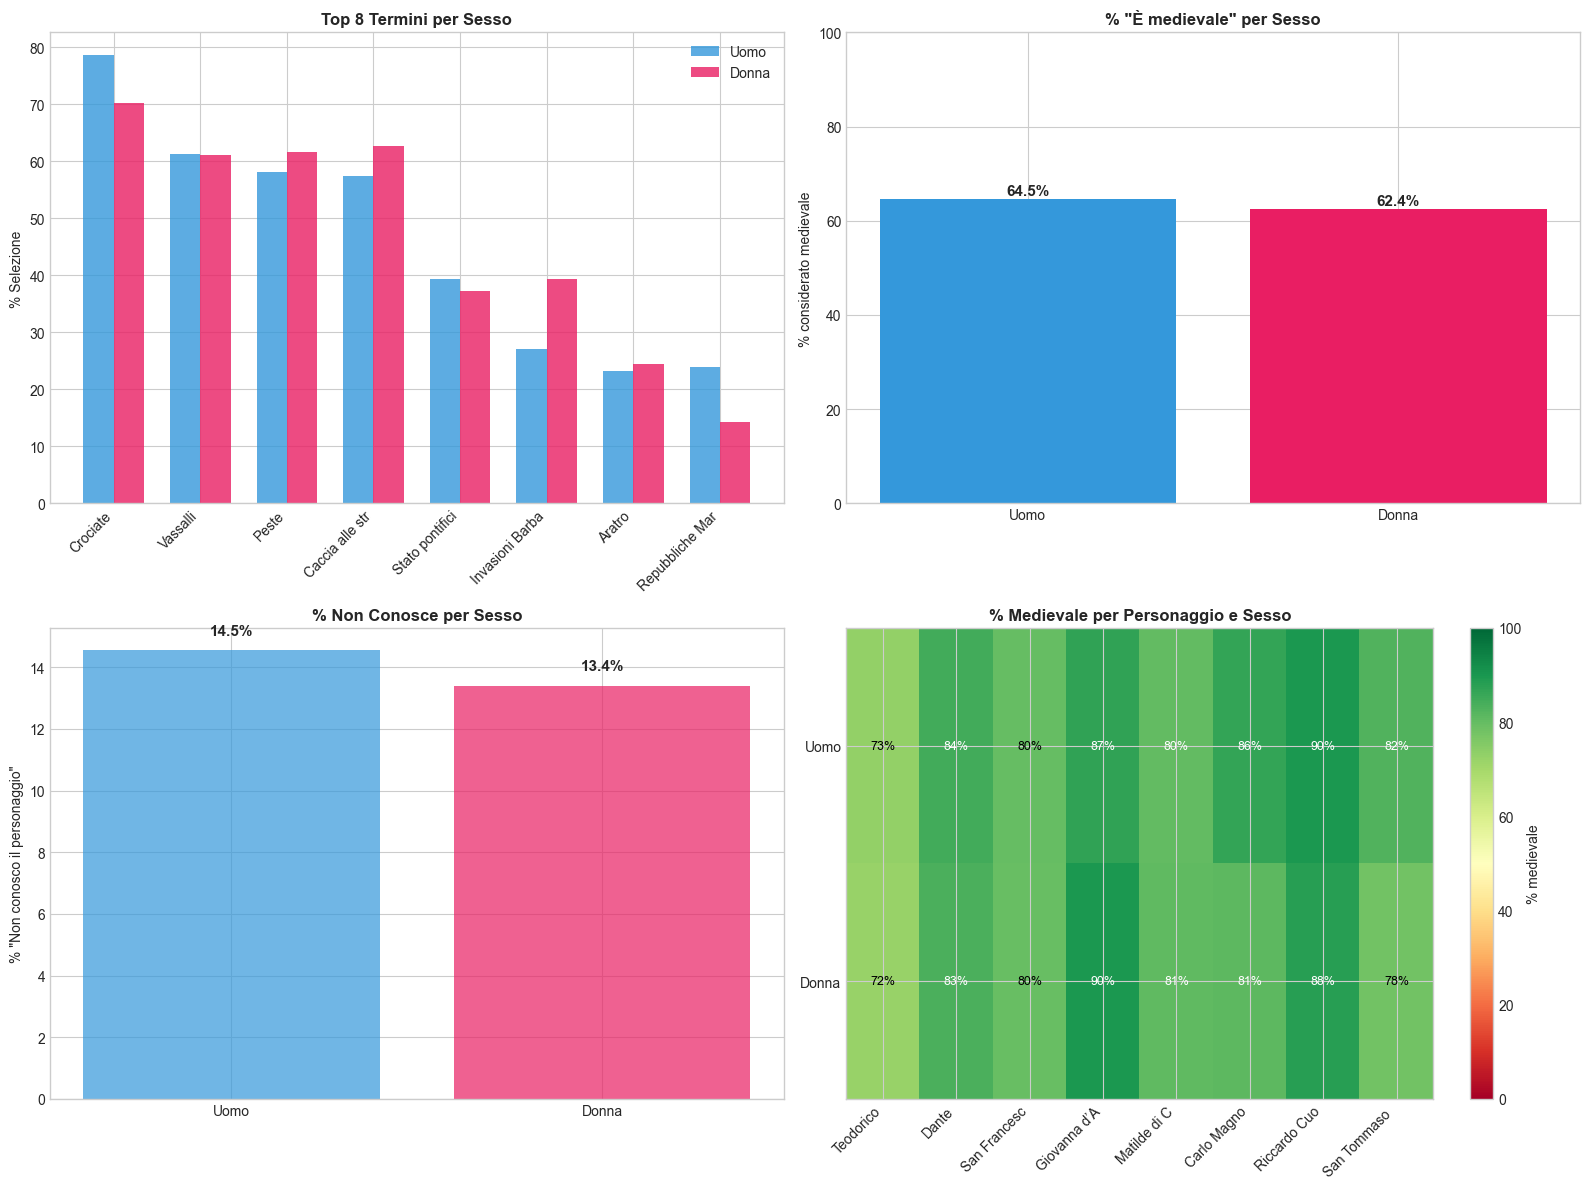

In [35]:
# Visualizzazioni Termini e Personaggi per Sesso
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top termini per sesso (confronto)
ax1 = axes[0, 0]
if 'termini_per_sesso' in dir() and len(sessi) >= 2:
    # Top 8 termini globali
    global_counts = {}
    for data in termini_per_sesso.values():
        for t, c in data['all'].items():
            global_counts[t] = global_counts.get(t, 0) + c
    top8 = [t for t, _ in sorted(global_counts.items(), key=lambda x: -x[1])[:8]]
    
    x = np.arange(len(top8))
    width = 0.35
    
    vals_s1 = [termini_per_sesso[sessi[0]]['all'].get(t, 0) / termini_per_sesso[sessi[0]]['n'] * 100 
               if termini_per_sesso[sessi[0]]['n'] > 0 else 0 for t in top8]
    vals_s2 = [termini_per_sesso[sessi[1]]['all'].get(t, 0) / termini_per_sesso[sessi[1]]['n'] * 100 
               if termini_per_sesso[sessi[1]]['n'] > 0 else 0 for t in top8]
    
    ax1.bar(x - width/2, vals_s1, width, label=sessi[0], color=colors_sesso.get(sessi[0], '#3498db'), alpha=0.8)
    ax1.bar(x + width/2, vals_s2, width, label=sessi[1], color=colors_sesso.get(sessi[1], '#e91e63'), alpha=0.8)
    ax1.set_ylabel('% Selezione')
    ax1.set_title('Top 8 Termini per Sesso', fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels([t[:15] for t in top8], rotation=45, ha='right')
    ax1.legend()

# 2. % medievale per sesso
ax2 = axes[0, 1]
if 'pct_medievale_sesso' in dir():
    sessi_plot = [s for s in sessi if s in pct_medievale_sesso]
    pct_values = [pct_medievale_sesso[s]['pct_medievale'] for s in sessi_plot]
    bars = ax2.bar(sessi_plot, pct_values, color=[colors_sesso.get(s, '#95a5a6') for s in sessi_plot])
    ax2.set_ylabel('% considerato medievale')
    ax2.set_title('% "È medievale" per Sesso', fontweight='bold')
    ax2.set_ylim(0, 100)
    for bar, val in zip(bars, pct_values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

# 3. % non conosce per sesso
ax3 = axes[1, 0]
if 'pct_medievale_sesso' in dir():
    pct_nc_values = [pct_medievale_sesso[s]['pct_non_conosco'] for s in sessi_plot]
    bars = ax3.bar(sessi_plot, pct_nc_values, color=[colors_sesso.get(s, '#95a5a6') for s in sessi_plot], alpha=0.7)
    ax3.set_ylabel('% "Non conosco il personaggio"')
    ax3.set_title('% Non Conosce per Sesso', fontweight='bold')
    for bar, val in zip(bars, pct_nc_values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

# 4. Heatmap personaggi per sesso (top personaggi)
ax4 = axes[1, 1]
if 'df_personaggi' in dir() and len(sessi) >= 2:
    top8_pers = df_personaggi.nlargest(8, 'pct_medievale')['nome'].tolist()
    top8_cols = [col for col in personaggi_cols if personaggi_nomi.get(col) in top8_pers]
    
    matrix_data = []
    for sesso in sessi:
        subset = df[df['sesso'] == sesso]
        row = []
        for col in top8_cols:
            medievale = (subset[col] == 'Sì, è medievale').sum()
            valide = subset[col].isin(['Sì, è medievale', 'No, non è medievale']).sum()
            pct = medievale / valide * 100 if valide > 0 else 0
            row.append(pct)
        matrix_data.append(row)
    
    matrix = np.array(matrix_data)
    im = ax4.imshow(matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
    ax4.set_xticks(range(len(top8_cols)))
    ax4.set_xticklabels([personaggi_nomi[c][:12] for c in top8_cols], rotation=45, ha='right')
    ax4.set_yticks(range(len(sessi)))
    ax4.set_yticklabels(sessi)
    ax4.set_title('% Medievale per Personaggio e Sesso', fontweight='bold')
    plt.colorbar(im, ax=ax4, label='% medievale')
    
    # Aggiungi valori nelle celle
    for i in range(len(sessi)):
        for j in range(len(top8_cols)):
            ax4.text(j, i, f'{matrix[i,j]:.0f}%', ha='center', va='center', fontsize=9,
                    color='white' if matrix[i,j] < 40 or matrix[i,j] > 80 else 'black')

plt.tight_layout()
plt.show()

In [36]:
# Test Statistici - Sesso
print("=" * 70)
print("📈 TEST STATISTICI - SESSO")
print("=" * 70)

if len(sessi) >= 2 and 'opinione_medioevo_num' in df_num.columns:
    group1 = df_num[df_num['sesso'] == sessi[0]]['opinione_medioevo_num'].dropna()
    group2 = df_num[df_num['sesso'] == sessi[1]]['opinione_medioevo_num'].dropna()
    
    # 1. T-test opinione
    print(f"\n📊 T-TEST - Opinione ({sessi[0]} vs {sessi[1]}):")
    if len(group1) > 5 and len(group2) > 5:
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f"   • Media {sessi[0]}: {group1.mean():.2f} ± {group1.std():.2f}")
        print(f"   • Media {sessi[1]}: {group2.mean():.2f} ± {group2.std():.2f}")
        print(f"   • t-statistic: {t_stat:.3f}")
        print(f"   • p-value: {p_value:.4f}")
        sig = "✅ SIGNIFICATIVA" if p_value < 0.05 else "❌ NON significativa"
        print(f"   • Differenza {sig} (p {'<' if p_value < 0.05 else '>'} 0.05)")
    
    # 2. Mann-Whitney U per opinione (test non parametrico)
    print(f"\n📊 MANN-WHITNEY U - Opinione ({sessi[0]} vs {sessi[1]}):")
    u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"   • U-statistic: {u_stat:.3f}")
    print(f"   • p-value: {p_value:.4f}")
    sig = "✅ SIGNIFICATIVA" if p_value < 0.05 else "❌ NON significativa"
    print(f"   • Differenza {sig}")

# 3. T-test per scale Likert
print(f"\n📊 T-TEST - Scale Likert ({sessi[0]} vs {sessi[1]}):")
print("-" * 60)
for col in existing_likert:
    g1 = df_num[df_num['sesso'] == sessi[0]][col].dropna()
    g2 = df_num[df_num['sesso'] == sessi[1]][col].dropna()
    if len(g1) > 5 and len(g2) > 5:
        t_stat, p_value = stats.ttest_ind(g1, g2)
        sig = "✅" if p_value < 0.05 else "❌"
        print(f"   {sig} {col.capitalize():<15}: {sessi[0]} {g1.mean():.2f} vs {sessi[1]} {g2.mean():.2f}, p={p_value:.4f}")

# 4. Chi-quadro per opinione vs sesso
print(f"\n📊 CHI-QUADRO - Opinione × Sesso:")
if 'opinione_medioevo' in df.columns:
    contingency = pd.crosstab(df['sesso'], df['opinione_medioevo'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
    print(f"   • Chi-quadro: {chi2:.3f}")
    print(f"   • Gradi di libertà: {dof}")
    print(f"   • p-value: {p_value:.4f}")
    sig = "✅ SIGNIFICATIVA" if p_value < 0.05 else "❌ NON significativa"
    print(f"   • Associazione {sig}")

# 5. Chi-quadro per corso medievale vs sesso
print(f"\n📊 CHI-QUADRO - Corso Medievale × Sesso:")
if 'corso_medievale' in df.columns:
    contingency = pd.crosstab(df['sesso'], df['corso_medievale'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
    print(f"   • Chi-quadro: {chi2:.3f}")
    print(f"   • p-value: {p_value:.4f}")
    sig = "✅ SIGNIFICATIVA" if p_value < 0.05 else "❌ NON significativa"
    print(f"   • Associazione {sig}")

📈 TEST STATISTICI - SESSO

📊 T-TEST - Opinione (Uomo vs Donna):
   • Media Uomo: 2.99 ± 1.04
   • Media Donna: 2.97 ± 1.03
   • t-statistic: 0.170
   • p-value: 0.8654
   • Differenza ❌ NON significativa (p > 0.05)

📊 MANN-WHITNEY U - Opinione (Uomo vs Donna):
   • U-statistic: 14971.000
   • p-value: 0.6473
   • Differenza ❌ NON significativa

📊 T-TEST - Scale Likert (Uomo vs Donna):
------------------------------------------------------------
   ❌ Feudalesimo    : Uomo 4.28 vs Donna 4.09, p=0.0775
   ❌ Superstizione  : Uomo 3.94 vs Donna 3.90, p=0.7400
   ❌ Germanico      : Uomo 3.11 vs Donna 2.90, p=0.0926
   ❌ Eroico         : Uomo 3.00 vs Donna 2.85, p=0.2289
   ❌ Comunale       : Uomo 3.19 vs Donna 2.93, p=0.0661
   ❌ Sperimentazione: Uomo 2.52 vs Donna 2.55, p=0.8106
   ✅ Cristiano      : Uomo 4.19 vs Donna 3.88, p=0.0090
   ❌ Oscurantismo   : Uomo 3.26 vs Donna 3.20, p=0.6253
   ❌ Rinascita      : Uomo 2.51 vs Donna 2.43, p=0.5140
   ❌ Decadenza      : Uomo 2.88 vs Donna 2.73, 

## 5. Analisi per Fascia d'Età
Come cambiano percezione e conoscenze nelle diverse generazioni?

Questa sezione replica le analisi preliminari suddividendole per:
- **Opinione sul medioevo** per fascia d'età
- **Scale Likert** per fascia d'età
- **Termini associati** per fascia d'età
- **Personaggi storici** per fascia d'età
- **Test statistici** (ANOVA, correlazioni)

In [37]:
# Analisi per Fascia d'Età - Opinione, Scale Likert, Termini, Personaggi
print("=" * 70)
print("👥 ANALISI PER FASCIA D'ETÀ")
print("=" * 70)

eta_order = ['18-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
eta_presenti = [e for e in eta_order if e in df['eta'].values]

# 1. Distribuzione per età
print("\n📊 DISTRIBUZIONE PER FASCIA D'ETÀ:")
eta_counts = df['eta'].value_counts()
for eta in eta_presenti:
    count = eta_counts.get(eta, 0)
    pct = count / len(df) * 100
    print(f"   {eta:10} | {count:>4} ({pct:>5.1f}%)")

# 2. Opinione media per età
print("\n📊 OPINIONE SUL MEDIOEVO PER ETÀ:")
if 'opinione_medioevo_num' in df_num.columns and 'eta' in df_num.columns:
    opinione_per_eta = df_num.groupby('eta')['opinione_medioevo_num'].agg(['mean', 'std', 'count'])
    opinione_per_eta = opinione_per_eta.reindex([e for e in eta_order if e in opinione_per_eta.index])
    
    for eta in opinione_per_eta.index:
        media = opinione_per_eta.loc[eta, 'mean']
        std = opinione_per_eta.loc[eta, 'std']
        n = int(opinione_per_eta.loc[eta, 'count'])
        emoji = "😊" if media >= 3.5 else "😐" if media >= 2.5 else "😔"
        print(f"   {emoji} {eta:10} | Media: {media:.2f} ± {std:.2f} (n={n})")

# 3. Scale Likert per età
print("\n📊 SCALE LIKERT MEDIE PER ETÀ:")
if existing_likert and 'eta' in df_num.columns:
    likert_per_eta = df_num.groupby('eta')[existing_likert].mean()
    likert_per_eta = likert_per_eta.reindex([e for e in eta_order if e in likert_per_eta.index])
    display(likert_per_eta.round(2))
    
    # Differenze rilevanti
    print("\n📊 DIFFERENZE SCALE LIKERT TRA FASCE D'ETÀ:")
    for col in existing_likert:
        vals_per_eta = df_num.groupby('eta')[col].mean()
        min_val = vals_per_eta.min()
        max_val = vals_per_eta.max()
        diff = max_val - min_val
        if diff > 0.5:
            eta_max = vals_per_eta.idxmax()
            eta_min = vals_per_eta.idxmin()
            print(f"   • {col.capitalize()}: max {eta_max} ({max_val:.2f}) vs min {eta_min} ({min_val:.2f}), Δ={diff:.2f}")

# 4. Termini associati per età
print("\n📊 TOP 5 TERMINI PER FASCIA D'ETÀ:")
termini_col = 'Quali di questi termini associ più fortemente con la tua idea di medioevo? (Max 5 risposte)'
termini_per_eta = {}

if termini_col in df.columns:
    for eta in eta_presenti:
        subset = df[df['eta'] == eta]
        termini_counts = {}
        n_risp = 0
        for val in subset[termini_col].dropna():
            n_risp += 1
            for t in str(val).split(','):
                t = t.strip()
                if t:
                    termini_counts[t] = termini_counts.get(t, 0) + 1
        
        top5 = sorted(termini_counts.items(), key=lambda x: -x[1])[:5]
        termini_per_eta[eta] = {'top5': top5, 'n': n_risp, 'all': termini_counts}
    
    for eta in eta_presenti:
        if eta in termini_per_eta:
            data = termini_per_eta[eta]
            print(f"\n   {eta} (n={data['n']}):")
            for i, (termine, count) in enumerate(data['top5'], 1):
                pct = count / data['n'] * 100 if data['n'] > 0 else 0
                print(f"      {i}. {termine}: {count} ({pct:.1f}%)")

# 5. Personaggi storici per età
print("\n\n📊 % MEDIA 'È MEDIEVALE' E 'NON CONOSCO' PER ETÀ:")
pct_medievale_eta = {}
for eta in eta_presenti:
    subset = df[df['eta'] == eta]
    pct = calcola_percentuale_medievale(subset, personaggi_cols, personaggi_nomi)
    
    non_conosco_totale = 0
    totale_risposte = 0
    for col in personaggi_cols:
        non_conosco_totale += (subset[col] == 'Non conosco il personaggio').sum()
        totale_risposte += subset[col].notna().sum()
    pct_nc = non_conosco_totale / totale_risposte * 100 if totale_risposte > 0 else 0
    
    pct_medievale_eta[eta] = {'pct_medievale': pct, 'pct_non_conosco': pct_nc, 'n': len(subset)}

print(f"\n   {'Età':<10} | {'% Medievale':>12} | {'% Non conosce':>14} | {'n':>5}")
print("-" * 55)
for eta in eta_presenti:
    data = pct_medievale_eta[eta]
    print(f"   {eta:<10} | {data['pct_medievale']:>11.1f}% | {data['pct_non_conosco']:>13.1f}% | {data['n']:>5}")

👥 ANALISI PER FASCIA D'ETÀ

📊 DISTRIBUZIONE PER FASCIA D'ETÀ:
   18-19      |   16 (  4.6%)
   20-29      |  139 ( 39.8%)
   30-39      |   40 ( 11.5%)
   40-49      |   38 ( 10.9%)
   50-59      |   71 ( 20.3%)
   60-69      |   37 ( 10.6%)

📊 OPINIONE SUL MEDIOEVO PER ETÀ:
   😐 18-19      | Media: 2.88 ± 0.50 (n=16)
   😐 20-29      | Media: 3.04 ± 0.85 (n=139)
   😐 30-39      | Media: 2.92 ± 0.86 (n=40)
   😐 40-49      | Media: 2.71 ± 1.06 (n=38)
   😐 50-59      | Media: 2.83 ± 1.30 (n=71)
   😐 60-69      | Media: 3.32 ± 1.20 (n=37)

📊 SCALE LIKERT MEDIE PER ETÀ:


,feudalesimo,superstizione,germanico,eroico,comunale,sperimentazione,cristiano,oscurantismo,rinascita,decadenza
eta,,,,,,,,,,
18-19,4.25,4.19,2.88,3.06,3.12,3.31,3.75,3.25,2.94,2.81
20-29,4.34,4.16,3.05,3.17,3.11,2.58,4.27,3.37,2.44,2.81
30-39,4.25,3.88,3.12,2.90,3.18,2.78,4.05,3.28,2.48,2.88
40-49,3.97,3.87,2.82,2.92,2.58,2.00,3.97,3.26,2.39,2.89
50-59,4.08,3.83,2.96,2.61,2.72,2.35,3.69,3.35,2.23,2.92
60-69,3.84,3.11,3.03,2.49,3.76,2.62,4.00,2.46,2.76,2.30



📊 DIFFERENZE SCALE LIKERT TRA FASCE D'ETÀ:
   • Feudalesimo: max 80+ (4.50) vs min 60-69 (3.84), Δ=0.66
   • Superstizione: max 80+ (4.50) vs min 60-69 (3.11), Δ=1.39
   • Eroico: max 70-79 (3.33) vs min 80+ (2.00), Δ=1.33
   • Comunale: max 80+ (4.00) vs min 40-49 (2.58), Δ=1.42
   • Sperimentazione: max 18-19 (3.31) vs min 40-49 (2.00), Δ=1.31
   • Cristiano: max 20-29 (4.27) vs min 80+ (3.00), Δ=1.27
   • Oscurantismo: max 70-79 (3.50) vs min 80+ (2.00), Δ=1.50
   • Rinascita: max 18-19 (2.94) vs min 50-59 (2.23), Δ=0.71
   • Decadenza: max 70-79 (3.00) vs min 80+ (1.50), Δ=1.50

📊 TOP 5 TERMINI PER FASCIA D'ETÀ:

   18-19 (n=16):
      1. Caccia alle streghe: 12 (75.0%)
      2. Peste: 11 (68.8%)
      3. Crociate: 10 (62.5%)
      4. Aratro: 7 (43.8%)
      5. Stato pontificio: 7 (43.8%)

   20-29 (n=139):
      1. Crociate: 108 (77.7%)
      2. Peste: 92 (66.2%)
      3. Caccia alle streghe: 87 (62.6%)
      4. Vassalli: 87 (62.6%)
      5. Stato pontificio: 62 (44.6%)

   30-39

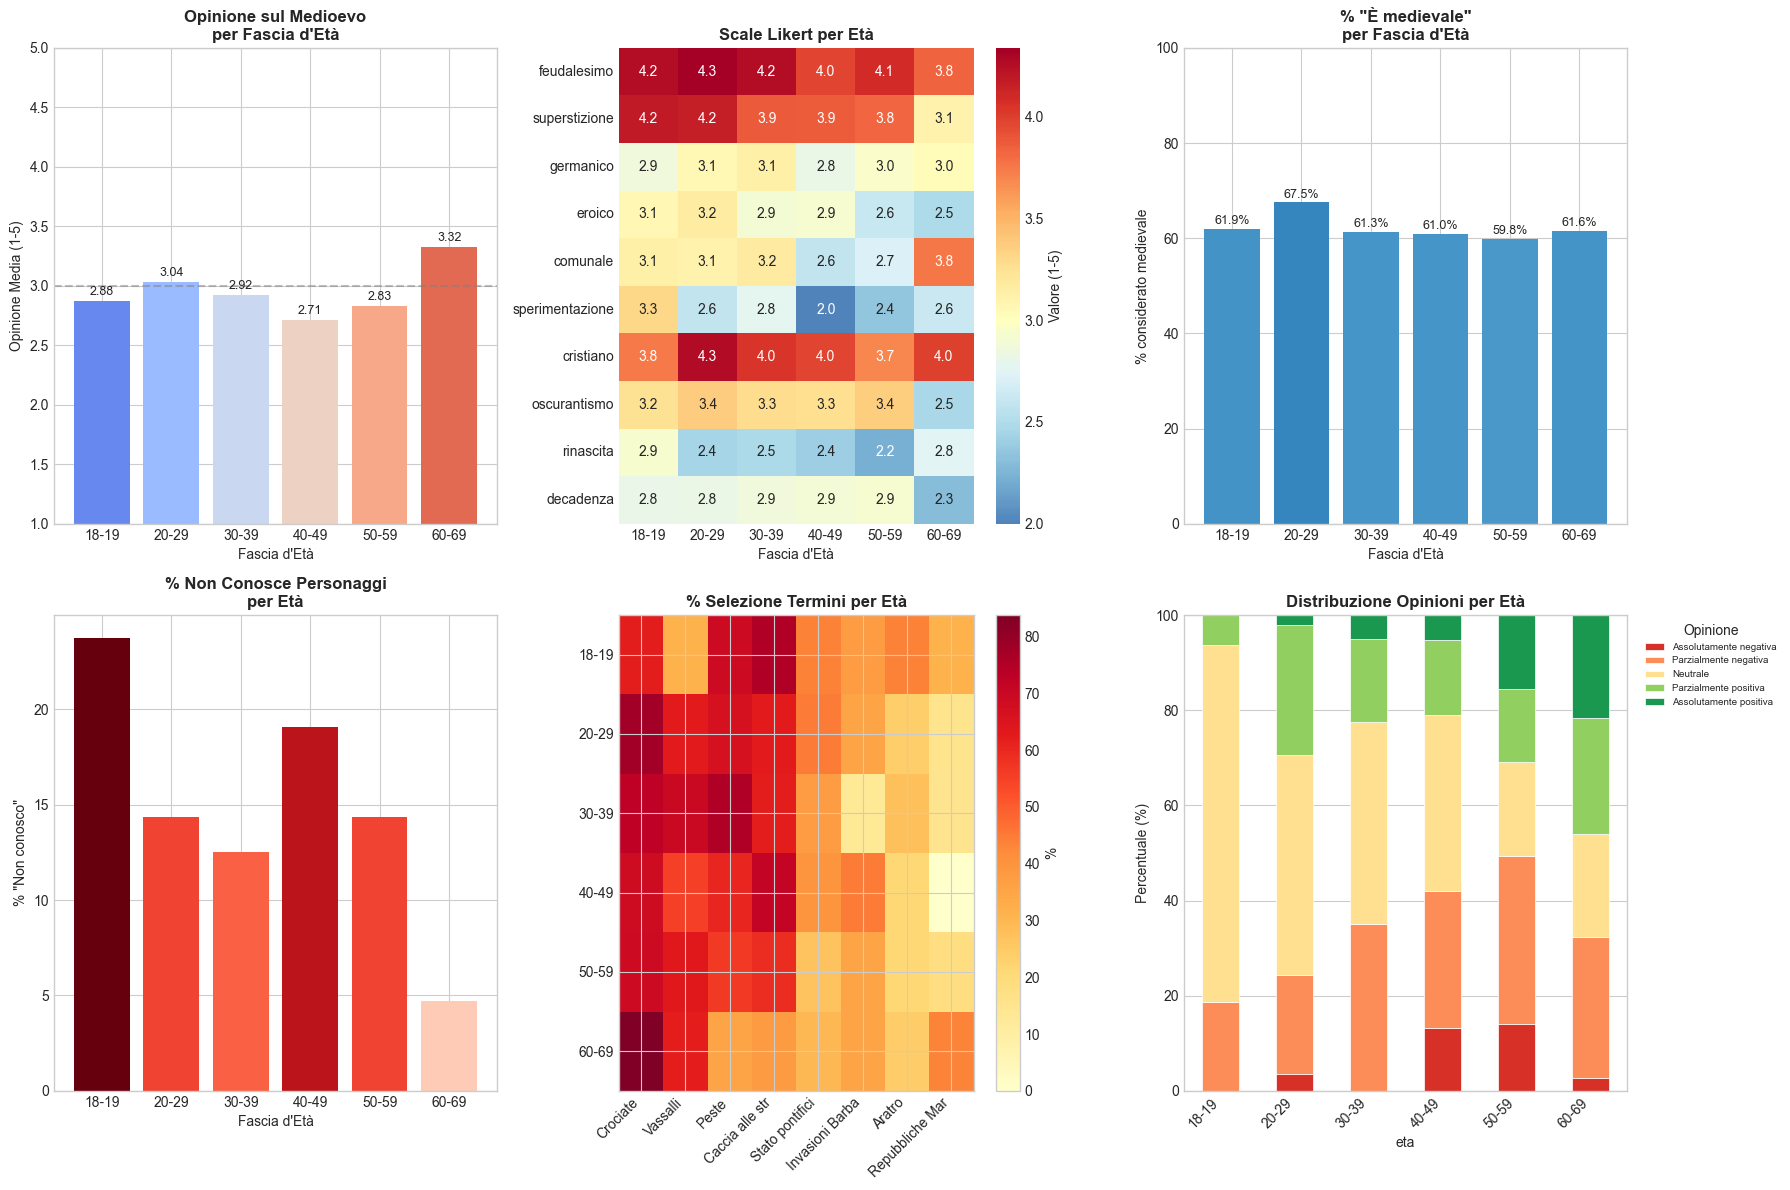

In [38]:
# Visualizzazioni per Fascia d'Età
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

eta_plot = [e for e in eta_order if e in df['eta'].values]

# 1. Opinione media per età
ax1 = axes[0, 0]
if 'opinione_medioevo_num' in df_num.columns:
    opinioni = [df_num[df_num['eta'] == e]['opinione_medioevo_num'].mean() for e in eta_plot]
    colors = sns.color_palette("coolwarm", len(eta_plot))
    bars = ax1.bar(eta_plot, opinioni, color=colors)
    ax1.set_ylabel('Opinione Media (1-5)')
    ax1.set_xlabel("Fascia d'Età")
    ax1.set_title("Opinione sul Medioevo\nper Fascia d'Età", fontweight='bold')
    ax1.axhline(y=3, color='gray', linestyle='--', alpha=0.5)
    ax1.set_ylim(1, 5)
    for bar, val in zip(bars, opinioni):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                f'{val:.2f}', ha='center', fontsize=9)

# 2. Heatmap scale Likert per età
ax2 = axes[0, 1]
if existing_likert and 'eta' in df_num.columns:
    likert_eta_matrix = df_num.groupby('eta')[existing_likert].mean()
    likert_eta_matrix = likert_eta_matrix.reindex([e for e in eta_order if e in likert_eta_matrix.index])
    
    sns.heatmap(likert_eta_matrix.T, annot=True, fmt='.1f', cmap='RdYlBu_r',
                center=3, ax=ax2, cbar_kws={'label': 'Valore (1-5)'})
    ax2.set_title('Scale Likert per Età', fontweight='bold')
    ax2.set_xlabel("Fascia d'Età")

# 3. % medievale per età
ax3 = axes[0, 2]
if pct_medievale_eta:
    pct_values = [pct_medievale_eta[e]['pct_medievale'] for e in eta_plot if e in pct_medievale_eta]
    colors = plt.cm.Blues(np.array(pct_values) / 100)
    bars = ax3.bar(eta_plot, pct_values, color=colors)
    ax3.set_ylabel('% considerato medievale')
    ax3.set_xlabel("Fascia d'Età")
    ax3.set_title('% "È medievale"\nper Fascia d\'Età', fontweight='bold')
    ax3.set_ylim(0, 100)
    for bar, val in zip(bars, pct_values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{val:.1f}%', ha='center', fontsize=9)

# 4. % non conosce per età
ax4 = axes[1, 0]
if pct_medievale_eta:
    pct_nc_values = [pct_medievale_eta[e]['pct_non_conosco'] for e in eta_plot if e in pct_medievale_eta]
    colors = plt.cm.Reds(np.array(pct_nc_values) / max(pct_nc_values) if max(pct_nc_values) > 0 else np.zeros(len(pct_nc_values)))
    bars = ax4.bar(eta_plot, pct_nc_values, color=colors)
    ax4.set_ylabel('% "Non conosco"')
    ax4.set_xlabel("Fascia d'Età")
    ax4.set_title('% Non Conosce Personaggi\nper Età', fontweight='bold')

# 5. Heatmap termini per età
ax5 = axes[1, 1]
if 'termini_per_eta' in dir():
    global_counts_eta = {}
    for data in termini_per_eta.values():
        for t, c in data['all'].items():
            global_counts_eta[t] = global_counts_eta.get(t, 0) + c
    top8_termini = [t for t, _ in sorted(global_counts_eta.items(), key=lambda x: -x[1])[:8]]
    
    matrix_data = []
    for eta in eta_plot:
        if eta in termini_per_eta:
            data = termini_per_eta[eta]
            row = [data['all'].get(t, 0) / data['n'] * 100 if data['n'] > 0 else 0 for t in top8_termini]
            matrix_data.append(row)
    
    if matrix_data:
        matrix = np.array(matrix_data)
        im = ax5.imshow(matrix, cmap='YlOrRd', aspect='auto')
        ax5.set_xticks(range(len(top8_termini)))
        ax5.set_xticklabels([t[:15] for t in top8_termini], rotation=45, ha='right')
        ax5.set_yticks(range(len(eta_plot)))
        ax5.set_yticklabels(eta_plot)
        ax5.set_title('% Selezione Termini per Età', fontweight='bold')
        plt.colorbar(im, ax=ax5, label='%')

# 6. Distribuzione opinioni per età (stacked bar %)
ax6 = axes[1, 2]
if 'opinione_medioevo' in df.columns:
    opinione_order = ['Assolutamente negativa', 'Parzialmente negativa', 'Neutrale',
                      'Parzialmente positiva', 'Assolutamente positiva']
    colors_op = ['#d73027', '#fc8d59', '#fee090', '#91cf60', '#1a9850']
    
    cross_pct = pd.crosstab(df['eta'], df['opinione_medioevo'], normalize='index') * 100
    cross_pct = cross_pct.reindex(columns=[o for o in opinione_order if o in cross_pct.columns])
    cross_pct = cross_pct.reindex([e for e in eta_order if e in cross_pct.index])
    
    cross_pct.plot(kind='bar', stacked=True, ax=ax6, color=colors_op[:len(cross_pct.columns)],
                   edgecolor='white', linewidth=0.5)
    ax6.set_ylabel('Percentuale (%)')
    ax6.set_title('Distribuzione Opinioni per Età', fontweight='bold')
    ax6.set_xticklabels(eta_plot, rotation=45, ha='right')
    ax6.legend(title='Opinione', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=7)
    ax6.set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [39]:
# Test Statistici - Età
print("=" * 70)
print("📈 TEST STATISTICI - ETÀ")
print("=" * 70)

# 1. ANOVA per opinione per fascia d'età
print("\n📊 ANOVA - Opinione sul Medioevo per Fascia d'Età:")
if 'opinione_medioevo_num' in df_num.columns and 'eta' in df_num.columns:
    groups = [df_num[df_num['eta'] == e]['opinione_medioevo_num'].dropna()
              for e in eta_presenti]
    groups = [g for g in groups if len(g) > 2]
    
    if len(groups) >= 2:
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"   • F-statistic: {f_stat:.3f}")
        print(f"   • p-value: {p_value:.4f}")
        sig = "✅ SIGNIFICATIVA" if p_value < 0.05 else "❌ NON significativa"
        print(f"   • Differenza {sig} tra fasce d'età")

# 2. Kruskal-Wallis (test non parametrico)
print("\n📊 KRUSKAL-WALLIS - Opinione per Fascia d'Età:")
if len(groups) >= 2:
    h_stat, p_value = stats.kruskal(*groups)
    print(f"   • H-statistic: {h_stat:.3f}")
    print(f"   • p-value: {p_value:.4f}")
    sig = "✅ SIGNIFICATIVA" if p_value < 0.05 else "❌ NON significativa"
    print(f"   • Differenza {sig}")

# 3. Correlazione età-opinione (Spearman)
print("\n📊 CORRELAZIONI ETÀ (punto medio) CON VARIABILI CHIAVE:")
if 'eta_num' in df_num.columns:
    # Età vs Opinione
    if 'opinione_medioevo_num' in df_num.columns:
        valid = df_num[['eta_num', 'opinione_medioevo_num']].dropna()
        r, p = stats.spearmanr(valid['eta_num'], valid['opinione_medioevo_num'])
        sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "n.s."
        print(f"   Età ↔ Opinione:      ρ = {r:+.3f}  p = {p:.4f}  {sig}")
    
    # Età vs Scale Likert
    for col in existing_likert:
        if col in df_num.columns:
            valid = df_num[['eta_num', col]].dropna()
            if len(valid) > 5:
                r, p = stats.spearmanr(valid['eta_num'], valid[col])
                sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "n.s."
                print(f"   Età ↔ {col.capitalize():<15}: ρ = {r:+.3f}  p = {p:.4f}  {sig}")

# 4. ANOVA per scale Likert
print("\n📊 ANOVA - Scale Likert per Fascia d'Età:")
for col in existing_likert:
    groups_likert = [df_num[df_num['eta'] == e][col].dropna() for e in eta_presenti]
    groups_likert = [g for g in groups_likert if len(g) > 2]
    if len(groups_likert) >= 2:
        f_stat, p_value = stats.f_oneway(*groups_likert)
        if p_value < 0.05:
            print(f"   ✅ {col.capitalize():<15}: F={f_stat:.3f}, p={p_value:.4f} (SIGNIFICATIVA)")
        else:
            print(f"   ❌ {col.capitalize():<15}: F={f_stat:.3f}, p={p_value:.4f}")

# 5. Chi-quadro età vs corso medievale
print("\n📊 CHI-QUADRO - Età × Corso Medievale:")
if 'corso_medievale' in df.columns:
    contingency = pd.crosstab(df['eta'], df['corso_medievale'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
    print(f"   • Chi-quadro: {chi2:.3f}")
    print(f"   • Gradi di libertà: {dof}")
    print(f"   • p-value: {p_value:.4f}")
    sig = "✅ SIGNIFICATIVA" if p_value < 0.05 else "❌ NON significativa"
    print(f"   • Associazione {sig}")

📈 TEST STATISTICI - ETÀ

📊 ANOVA - Opinione sul Medioevo per Fascia d'Età:
   • F-statistic: 1.836
   • p-value: 0.1053
   • Differenza ❌ NON significativa tra fasce d'età

📊 KRUSKAL-WALLIS - Opinione per Fascia d'Età:
   • H-statistic: 8.929
   • p-value: 0.1119
   • Differenza ❌ NON significativa

📊 CORRELAZIONI ETÀ (punto medio) CON VARIABILI CHIAVE:
   Età ↔ Opinione:      ρ = -0.030  p = 0.5773  n.s.
   Età ↔ Feudalesimo    : ρ = -0.143  p = 0.0080  **
   Età ↔ Superstizione  : ρ = -0.220  p = 0.0000  ***
   Età ↔ Germanico      : ρ = -0.026  p = 0.6315  n.s.
   Età ↔ Eroico         : ρ = -0.206  p = 0.0001  ***
   Età ↔ Comunale       : ρ = -0.008  p = 0.8810  n.s.
   Età ↔ Sperimentazione: ρ = -0.114  p = 0.0349  *
   Età ↔ Cristiano      : ρ = -0.122  p = 0.0242  *
   Età ↔ Oscurantismo   : ρ = -0.118  p = 0.0287  *
   Età ↔ Rinascita      : ρ = -0.032  p = 0.5568  n.s.
   Età ↔ Decadenza      : ρ = -0.060  p = 0.2681  n.s.

📊 ANOVA - Scale Likert per Fascia d'Età:
   ❌ Feudale

## 6. Analisi per Modalità di Informazione
Come influiscono le fonti di informazione sulla percezione del medioevo?

Questa sezione replica le analisi preliminari suddividendole per modalità di informazione.

**Nota:** Le risposte "Altro" (testo libero) vengono processate e raggruppate in categorie coerenti per essere incluse nell'analisi:
- Risposte simili vengono aggregate (es. "YouTube", "Video su YouTube", "Video di YouTube" → **YouTube/Video online**)
- Le categorie vengono mappate con codici numerici per l'analisi statistica

In [40]:
# Processamento "Altro" e categorizzazione modalità di informazione
print("=" * 70)
print("📺 PROCESSAMENTO MODALITÀ DI INFORMAZIONE + RISPOSTE 'ALTRO'")
print("=" * 70)

if 'modalita_info' in df.columns:
    # Modalità predefinite del questionario
    modalita_predefinite = ['Libri', 'Videogiochi', 'Serie TV', 'Film', 'Documentari', 
                           'Social media', 'Podcast', 'Nessuna']
    
    # Estrai tutte le risposte individuali
    tutte_risposte = {}
    for val in df['modalita_info'].dropna():
        for m in str(val).split(','):
            m = m.strip()
            if m:
                tutte_risposte[m] = tutte_risposte.get(m, 0) + 1
    
    # Identifica risposte "Altro" (non predefinite)
    risposte_altro = {k: v for k, v in tutte_risposte.items() 
                      if k not in modalita_predefinite and k != ''}
    
    print(f"\n📊 Risposte predefinite trovate: {len([m for m in modalita_predefinite if m in tutte_risposte])}")
    print(f"📊 Risposte 'Altro' (testo libero) trovate: {len(risposte_altro)}")
    
    if risposte_altro:
        print("\n📋 RISPOSTE 'ALTRO' ORIGINALI:")
        for resp, count in sorted(risposte_altro.items(), key=lambda x: -x[1]):
            print(f"   '{resp}': {count} risposte")
    
    # --- MAPPATURA RISPOSTE ALTRO IN CATEGORIE ---
    # Raggruppamento per similarità semantica
    mapping_altro = {
        # YouTube / Video online
        'Youtube': 'YouTube/Video online',
        'youtube': 'YouTube/Video online',
        'Video su YouTube': 'YouTube/Video online',
        'Video di YouTube': 'YouTube/Video online',
        'Video amatoriali su YouTube': 'YouTube/Video online',
        'Video su internet': 'YouTube/Video online',
        'Video': 'YouTube/Video online',
        'Alcuni video': 'YouTube/Video online',
        
        # TV / Divulgazione
        'Rai Storia': 'TV/Divulgazione',
        'Programmi in TV (prof Barbero)': 'TV/Divulgazione',
        'Programmi di divulgazione': 'TV/Divulgazione',
        'Documentari televisivi': 'TV/Divulgazione',
        'Documentari tv': 'TV/Divulgazione',
        'Trasmissioni televisivi': 'TV/Divulgazione',
        'trasmissioni televisive': 'TV/Divulgazione',
        
        # Internet / Ricerche web
        'Internet': 'Internet/Ricerche web',
        'Google': 'Internet/Ricerche web',
        'Ricerche internet': 'Internet/Ricerche web',
        'Wikipedia': 'Internet/Ricerche web',
        'Siti Internet (principalmente Wikipedia)': 'Internet/Ricerche web',
        'Fb': 'Internet/Ricerche web',
        
        # Educazione formale
        'Scuola': 'Educazione formale',
        'Studi fatti alle superiori': 'Educazione formale',
        
        # Articoli / Stampa
        'articoli di giornale': 'Articoli/Stampa',
        'articoli scientifici': 'Articoli/Stampa',
        
        # Arte e cultura
        'Opere d\'arte': 'Arte/Musei',
        'Manifestazioni a tema': 'Arte/Musei',
        
        # Giochi di ruolo
        'Giochi di ruolo': 'Giochi di ruolo',
        
        # Passaparola
        'Passaparola': 'Passaparola',
        'Mia sorella': 'Passaparola',
        
        # Radio
        'Radio': 'Radio',
        
        # Film storici → Film (già esistente)
        'Film storici': 'Film',
        
        # Non mi informo → Nessuna
        'Non mi informo': 'Nessuna',
    }
    
    # Verifica che tutte le risposte altro siano mappate
    non_mappate = [r for r in risposte_altro if r not in mapping_altro]
    if non_mappate:
        print(f"\n⚠️ Risposte non mappate (assegnate a 'Altro generico'): {non_mappate}")
        for r in non_mappate:
            mapping_altro[r] = 'Altro generico'
    
    # Categorie risultanti dopo il raggruppamento
    categorie_altro = {}
    for resp, cat in mapping_altro.items():
        if resp in risposte_altro:
            categorie_altro[cat] = categorie_altro.get(cat, 0) + risposte_altro[resp]
    
    print("\n📊 CATEGORIE 'ALTRO' DOPO RAGGRUPPAMENTO:")
    for cat, count in sorted(categorie_altro.items(), key=lambda x: -x[1]):
        print(f"   {cat:<25} | {count:>3} risposte")
    
    # --- CREA LISTA COMPLETA MODALITÀ (predefinite + raggruppate) ---
    modalita_complete = modalita_predefinite + sorted(set(mapping_altro.values()) - set(modalita_predefinite))
    
    # Crea colonne binarie per TUTTE le modalità (predefinite + raggruppate)
    for mod in modalita_complete:
        col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
        if mod in modalita_predefinite:
            # Per le predefinite: match diretto
            df_num[col_name] = df_num['modalita_info'].apply(
                lambda x: 1 if pd.notna(x) and mod.lower() in str(x).lower() else 0
            )
        else:
            # Per le categorie raggruppate: match tramite mapping
            risposte_in_cat = [r for r, c in mapping_altro.items() if c == mod]
            df_num[col_name] = df_num['modalita_info'].apply(
                lambda x, risposte=risposte_in_cat: 1 if pd.notna(x) and any(
                    r.lower() in str(x).lower() for r in risposte
                ) else 0
            )
    
    # --- MAPPING NUMERICO PER ANALISI ---
    # Assegna codici numerici alle modalità
    modalita_num_map = {mod: i+1 for i, mod in enumerate(modalita_complete)}
    
    print("\n📊 MAPPING NUMERICO MODALITÀ:")
    for mod, num in modalita_num_map.items():
        col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
        n_utenti = df_num[col_name].sum() if col_name in df_num.columns else 0
        print(f"   {num:>2}. {mod:<25} (n={n_utenti})")
    
    # Crea colonna con numero di modalità utilizzate per rispondente
    modalita_bin_cols = [f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}' for mod in modalita_complete 
                        if f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}' in df_num.columns]
    df_num['n_modalita'] = df_num[modalita_bin_cols].sum(axis=1)
    
    print(f"\n📊 Numero medio di modalità per rispondente: {df_num['n_modalita'].mean():.1f}")
    print(f"   Min: {df_num['n_modalita'].min()}, Max: {df_num['n_modalita'].max()}")

else:
    print("Colonna modalita_info non trovata")

📺 PROCESSAMENTO MODALITÀ DI INFORMAZIONE + RISPOSTE 'ALTRO'

📊 Risposte predefinite trovate: 6
📊 Risposte 'Altro' (testo libero) trovate: 33

📋 RISPOSTE 'ALTRO' ORIGINALI:
   'Non mi informo': 101 risposte
   'Giochi di ruolo': 19 risposte
   'Internet': 7 risposte
   'Wikipedia': 2 risposte
   'Scuola': 2 risposte
   'Video di YouTube': 1 risposte
   'Mia sorella': 1 risposte
   'Video amatoriali su YouTube': 1 risposte
   'Video su YouTube': 1 risposte
   'Studi fatti alle superiori': 1 risposte
   'Passaparola': 1 risposte
   'Film storici': 1 risposte
   'Video': 1 risposte
   'Trasmissioni televisivi': 1 risposte
   'Youtube': 1 risposte
   'articoli scientifici': 1 risposte
   'Google': 1 risposte
   'Programmi in TV (prof Barbero)': 1 risposte
   'Documentari televisivi': 1 risposte
   'trasmissioni televisive': 1 risposte
   'Video su internet': 1 risposte
   'Alcuni video': 1 risposte
   'Manifestazioni a tema': 1 risposte
   'Siti Internet (principalmente Wikipedia)': 1 rispo

In [41]:
# Opinione e Percezione per Modalità di Informazione
print("=" * 70)
print("📺 ANALISI PER MODALITÀ DI INFORMAZIONE")
print("=" * 70)

# Frequenza di ogni modalità (predefinite + raggruppate)
print("\n📊 FREQUENZA TUTTE LE MODALITÀ (incluse 'Altro' raggruppate):")
print("-" * 70)

risultati_modalita = []
for mod in modalita_complete:
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns:
        n_utenti = df_num[col_name].sum()
        pct = n_utenti / len(df_num) * 100
        
        if n_utenti > 0:
            bar = "█" * int(pct / 2)
            print(f"   {mod:<25} | {n_utenti:>3} ({pct:>5.1f}%) {bar}")

# Opinione media per modalità
print("\n📊 OPINIONE MEDIA PER MODALITÀ UTILIZZATA:")
print("-" * 70)

df_risultati_mod = []
for mod in modalita_complete:
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns and 'opinione_medioevo_num' in df_num.columns:
        utenti = df_num[df_num[col_name] == 1]
        non_utenti = df_num[df_num[col_name] == 0]
        
        if len(utenti) > 3:
            media_utenti = utenti['opinione_medioevo_num'].mean()
            media_non_utenti = non_utenti['opinione_medioevo_num'].mean()
            diff = media_utenti - media_non_utenti
            
            df_risultati_mod.append({
                'modalita': mod,
                'media_utenti': media_utenti,
                'media_non_utenti': media_non_utenti,
                'differenza': diff,
                'n': len(utenti)
            })
            
            emoji = "📈" if diff > 0.2 else "📉" if diff < -0.2 else "➖"
            print(f"   {emoji} {mod:<25} | Usa: {media_utenti:.2f} | Non usa: {media_non_utenti:.2f} | Δ: {diff:+.2f} (n={len(utenti)})")

df_modalita = pd.DataFrame(df_risultati_mod)

# % medievale per modalità
print("\n📊 % MEDIA 'È MEDIEVALE' PER MODALITÀ:")
print("-" * 70)

pct_medievale_modalita = {}
for mod in modalita_complete:
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns:
        utenti_idx = df_num[df_num[col_name] == 1].index
        subset = df.loc[utenti_idx]
        
        if len(subset) > 3:
            pct = calcola_percentuale_medievale(subset, personaggi_cols, personaggi_nomi)
            
            # % non conosco
            nc_tot = sum((subset[col] == 'Non conosco il personaggio').sum() for col in personaggi_cols)
            tot_risp = sum(subset[col].notna().sum() for col in personaggi_cols)
            pct_nc = nc_tot / tot_risp * 100 if tot_risp > 0 else 0
            
            pct_medievale_modalita[mod] = {'pct_medievale': pct, 'pct_non_conosco': pct_nc, 'n': len(subset)}
            print(f"   📊 {mod:<25} | % medievale: {pct:.1f}% | % non conosce: {pct_nc:.1f}% (n={len(subset)})")

📺 ANALISI PER MODALITÀ DI INFORMAZIONE

📊 FREQUENZA TUTTE LE MODALITÀ (incluse 'Altro' raggruppate):
----------------------------------------------------------------------
   Libri                     | 199 ( 57.0%) ████████████████████████████
   Videogiochi               |  41 ( 11.7%) █████
   Serie TV                  |  94 ( 26.9%) █████████████
   Film                      |   2 (  0.6%) 
   Documentari               |   5 (  1.4%) 
   Podcast                   |  73 ( 20.9%) ██████████
   Arte/Musei                |   2 (  0.6%) 
   Articoli/Stampa           |   2 (  0.6%) 
   Educazione formale        |   3 (  0.9%) 
   Giochi di ruolo           |  19 (  5.4%) ██
   Internet/Ricerche web     |  14 (  4.0%) ██
   Passaparola               |   2 (  0.6%) 
   Radio                     |   1 (  0.3%) 
   TV/Divulgazione           |   7 (  2.0%) █
   YouTube/Video online      |  48 ( 13.8%) ██████

📊 OPINIONE MEDIA PER MODALITÀ UTILIZZATA:
-------------------------------------------

In [42]:
# Scale Likert e Visione Positiva/Negativa per Modalità
print("=" * 70)
print("📊 SCALE LIKERT PER MODALITÀ DI INFORMAZIONE")
print("=" * 70)

scale_negative = ['oscurantismo', 'decadenza', 'superstizione']
scale_positive = ['rinascita', 'sperimentazione', 'eroico']

likert_per_modalita = {}

for mod in modalita_complete:
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns:
        utenti = df_num[df_num[col_name] == 1]
        
        if len(utenti) > 3:
            neg_mean = utenti[[c for c in scale_negative if c in utenti.columns]].mean().mean()
            pos_mean = utenti[[c for c in scale_positive if c in utenti.columns]].mean().mean()
            all_likert_mean = utenti[existing_likert].mean()
            
            likert_per_modalita[mod] = {
                'neg': neg_mean,
                'pos': pos_mean,
                'balance': pos_mean - neg_mean,
                'n': len(utenti),
                'likert_means': all_likert_mean.to_dict()
            }

# Tabella medie Likert per modalità
print("\n📊 MEDIE SCALE LIKERT PER MODALITÀ:")
likert_mod_data = []
for mod, data in likert_per_modalita.items():
    row = {'Modalità': mod, 'n': data['n']}
    row.update(data['likert_means'])
    likert_mod_data.append(row)

if likert_mod_data:
    df_likert_mod = pd.DataFrame(likert_mod_data).set_index('Modalità')
    display(df_likert_mod[['n'] + existing_likert].round(2))

# Riepilogo visione positiva vs negativa
print("\n📊 BALANCE VISIONE (POSITIVA - NEGATIVA) PER MODALITÀ:")
print("-" * 70)
for mod in sorted(likert_per_modalita.keys(), key=lambda x: -likert_per_modalita[x]['balance']):
    data = likert_per_modalita[mod]
    visione = "più positiva" if data['balance'] > 0.2 else "più negativa" if data['balance'] < -0.2 else "equilibrata"
    emoji = "🌟" if data['balance'] > 0.2 else "⚡" if data['balance'] < -0.2 else "⚖️"
    print(f"   {emoji} {mod:<25} | Visione {visione:13} | Pos: {data['pos']:.2f} | Neg: {data['neg']:.2f} (n={data['n']})")

📊 SCALE LIKERT PER MODALITÀ DI INFORMAZIONE

📊 MEDIE SCALE LIKERT PER MODALITÀ:


,n,feudalesimo,superstizione,germanico,eroico,comunale,sperimentazione,cristiano,oscurantismo,rinascita,decadenza
Modalità,,,,,,,,,,,
Libri,199,4.16,3.73,3.04,2.91,3.15,2.61,4.05,3.11,2.52,2.77
Videogiochi,41,4.51,4.27,3.17,3.32,3.07,2.39,4.59,3.41,2.39,3.07
Serie TV,94,4.29,4.04,3.13,3.11,2.98,2.40,4.13,3.26,2.48,2.87
Documentari,5,4.40,4.00,2.80,3.80,2.40,2.60,4.40,3.60,2.20,2.80
Podcast,73,4.36,3.71,3.42,2.89,3.59,2.86,4.18,3.14,2.58,2.56
Giochi di ruolo,19,4.47,4.00,3.26,2.95,3.26,2.11,4.16,3.47,2.47,3.11
Internet/Ricerche web,14,4.36,4.00,3.43,3.29,3.21,2.29,4.21,3.21,2.21,2.57
TV/Divulgazione,7,4.29,4.00,3.71,2.86,3.43,3.14,4.43,3.57,2.86,2.57
YouTube/Video online,48,4.54,4.15,3.10,3.15,3.08,2.46,4.58,3.33,2.48,2.88



📊 BALANCE VISIONE (POSITIVA - NEGATIVA) PER MODALITÀ:
----------------------------------------------------------------------
   ⚡ Podcast                   | Visione più negativa  | Pos: 2.78 | Neg: 3.14 (n=73)
   ⚡ TV/Divulgazione           | Visione più negativa  | Pos: 2.95 | Neg: 3.38 (n=7)
   ⚡ Libri                     | Visione più negativa  | Pos: 2.68 | Neg: 3.20 (n=199)
   ⚡ Documentari               | Visione più negativa  | Pos: 2.87 | Neg: 3.47 (n=5)
   ⚡ Internet/Ricerche web     | Visione più negativa  | Pos: 2.60 | Neg: 3.26 (n=14)
   ⚡ Serie TV                  | Visione più negativa  | Pos: 2.66 | Neg: 3.39 (n=94)
   ⚡ YouTube/Video online      | Visione più negativa  | Pos: 2.69 | Neg: 3.45 (n=48)
   ⚡ Videogiochi               | Visione più negativa  | Pos: 2.70 | Neg: 3.59 (n=41)
   ⚡ Giochi di ruolo           | Visione più negativa  | Pos: 2.51 | Neg: 3.53 (n=19)


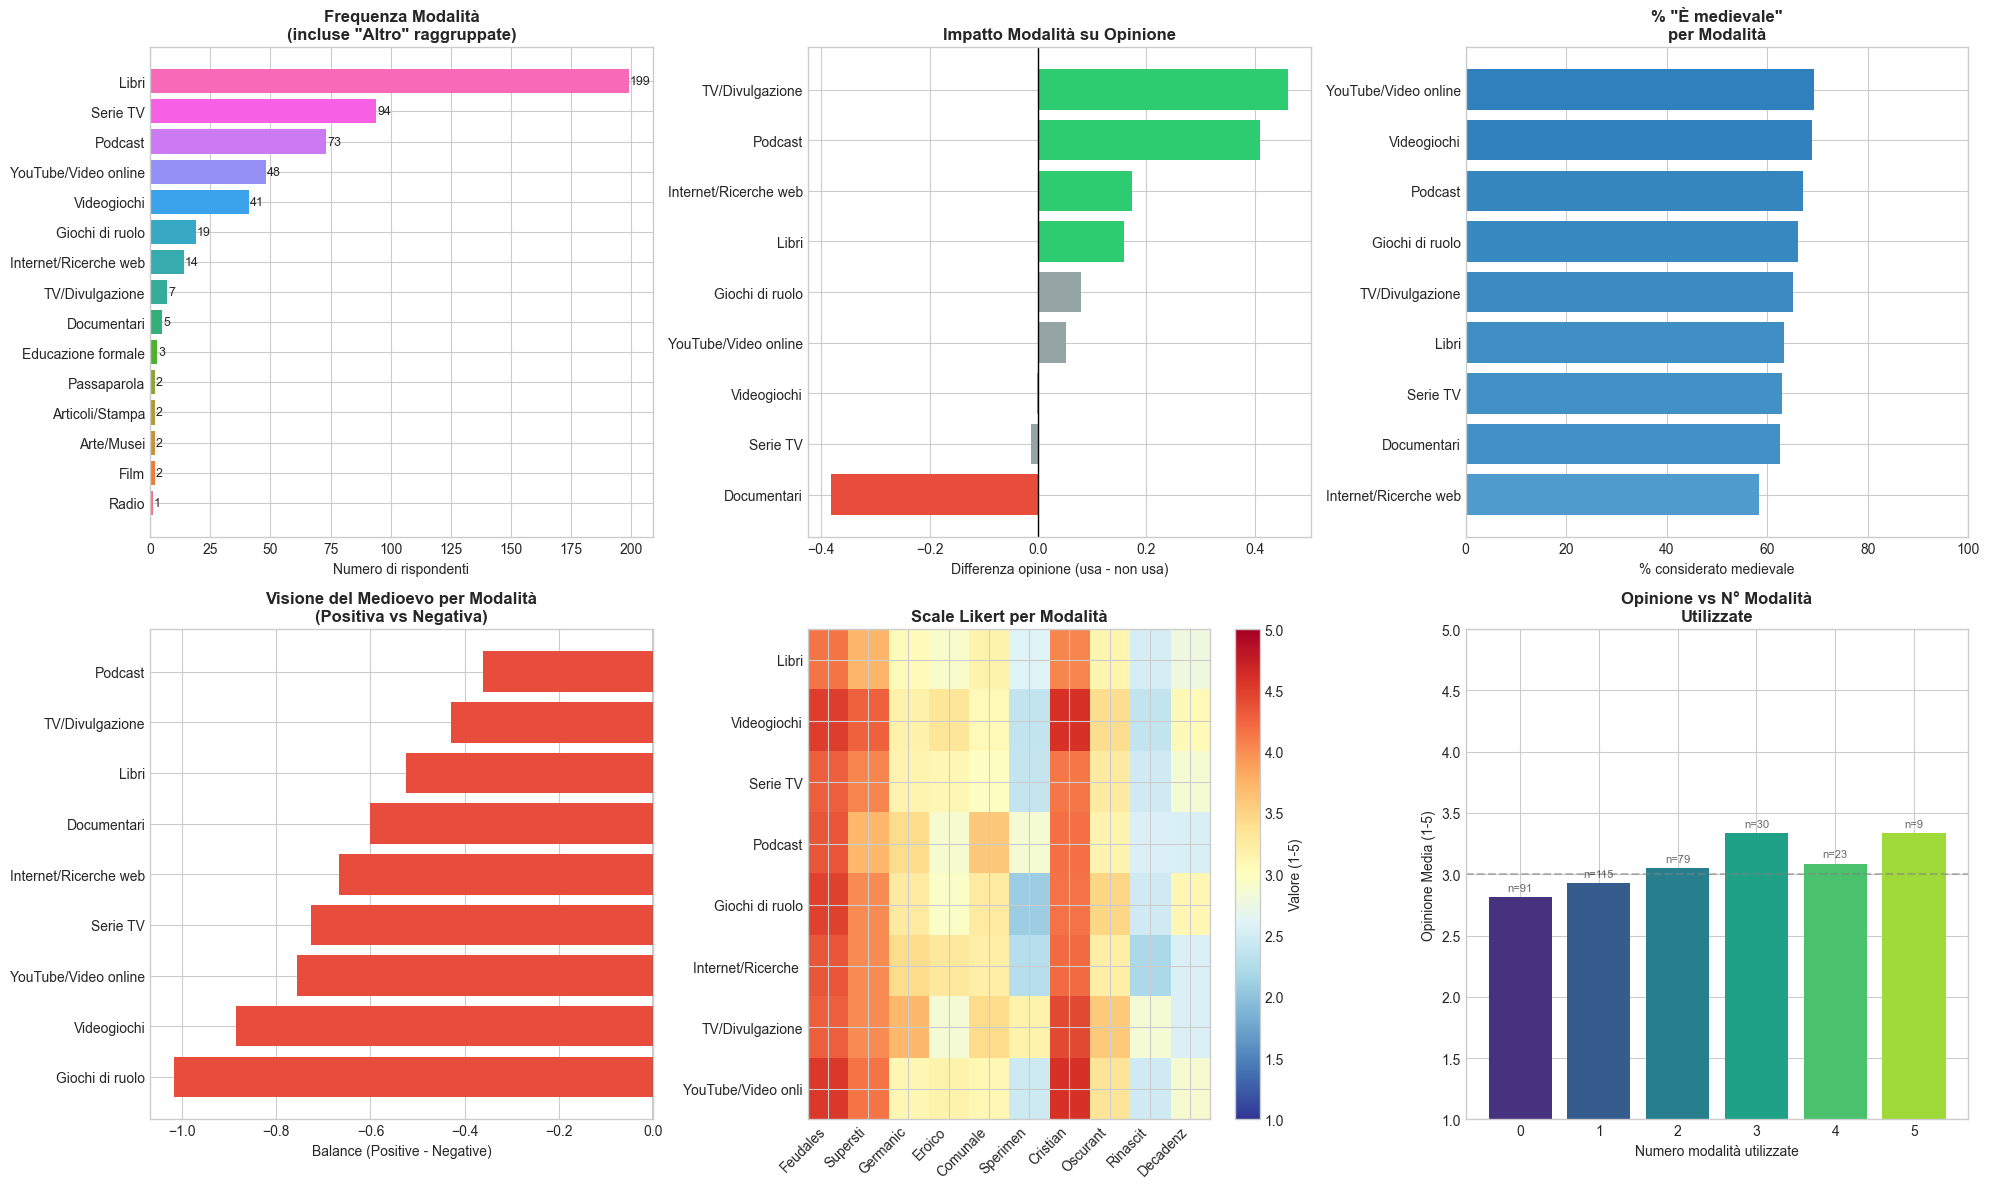

In [43]:
# Visualizzazioni Modalità di Informazione
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Frequenza modalità (incluse le raggruppate)
ax1 = axes[0, 0]
mod_freq = []
for mod in modalita_complete:
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns:
        n = df_num[col_name].sum()
        if n > 0:
            mod_freq.append((mod, n))

mod_freq.sort(key=lambda x: x[1])
mods_plot = [m[0] for m in mod_freq]
counts_plot = [m[1] for m in mod_freq]
colors = sns.color_palette("husl", len(mods_plot))
ax1.barh(mods_plot, counts_plot, color=colors)
ax1.set_xlabel('Numero di rispondenti')
ax1.set_title('Frequenza Modalità\n(incluse "Altro" raggruppate)', fontweight='bold')
for bar, count in zip(ax1.patches, counts_plot):
    ax1.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            str(count), va='center', fontsize=9)

# 2. Opinione per modalità (differenza usa/non usa)
ax2 = axes[0, 1]
if len(df_modalita) > 0:
    df_mod_plot = df_modalita.sort_values('differenza', ascending=True)
    colors = ['#2ecc71' if x > 0.1 else '#e74c3c' if x < -0.1 else '#95a5a6'
              for x in df_mod_plot['differenza']]
    bars = ax2.barh(df_mod_plot['modalita'], df_mod_plot['differenza'], color=colors)
    ax2.axvline(x=0, color='black', linewidth=1)
    ax2.set_xlabel('Differenza opinione (usa - non usa)')
    ax2.set_title('Impatto Modalità su Opinione', fontweight='bold')

# 3. % medievale per modalità
ax3 = axes[0, 2]
if pct_medievale_modalita:
    mods_pct = sorted(pct_medievale_modalita.keys(), 
                      key=lambda x: pct_medievale_modalita[x]['pct_medievale'])
    pcts = [pct_medievale_modalita[m]['pct_medievale'] for m in mods_pct]
    colors = plt.cm.Blues(np.array(pcts) / 100)
    bars = ax3.barh(mods_pct, pcts, color=colors)
    ax3.set_xlabel('% considerato medievale')
    ax3.set_title('% "È medievale"\nper Modalità', fontweight='bold')
    ax3.set_xlim(0, 100)

# 4. Balance visione positiva/negativa
ax4 = axes[1, 0]
if likert_per_modalita:
    mods_bal = sorted(likert_per_modalita.keys(), key=lambda x: likert_per_modalita[x]['balance'])
    balances = [likert_per_modalita[m]['balance'] for m in mods_bal]
    colors = ['#e74c3c' if b < -0.2 else '#2ecc71' if b > 0.2 else '#95a5a6'
              for b in balances]
    bars = ax4.barh(mods_bal, balances, color=colors)
    ax4.axvline(x=0, color='black', linewidth=1)
    ax4.set_xlabel('Balance (Positive - Negative)')
    ax4.set_title('Visione del Medioevo per Modalità\n(Positiva vs Negativa)', fontweight='bold')

# 5. Heatmap Scale Likert per le modalità principali
ax5 = axes[1, 1]
if likert_per_modalita:
    # Seleziona modalità con n > 5
    mods_heatmap = [m for m in likert_per_modalita if likert_per_modalita[m]['n'] > 5]
    if mods_heatmap:
        matrix_data = []
        for mod in mods_heatmap:
            row = [likert_per_modalita[mod]['likert_means'].get(col, np.nan) for col in existing_likert]
            matrix_data.append(row)
        
        matrix = np.array(matrix_data)
        im = ax5.imshow(matrix, cmap='RdYlBu_r', aspect='auto', vmin=1, vmax=5)
        ax5.set_xticks(range(len(existing_likert)))
        ax5.set_xticklabels([col[:8].capitalize() for col in existing_likert], rotation=45, ha='right')
        ax5.set_yticks(range(len(mods_heatmap)))
        ax5.set_yticklabels([m[:18] for m in mods_heatmap])
        ax5.set_title('Scale Likert per Modalità', fontweight='bold')
        plt.colorbar(im, ax=ax5, label='Valore (1-5)')

# 6. Correlazione n_modalità con opinione
ax6 = axes[1, 2]
if 'n_modalita' in df_num.columns and 'opinione_medioevo_num' in df_num.columns:
    opinione_per_n = df_num.groupby('n_modalita')['opinione_medioevo_num'].agg(['mean', 'count'])
    opinione_per_n = opinione_per_n[opinione_per_n['count'] > 2]
    
    ax6.bar(opinione_per_n.index, opinione_per_n['mean'], 
            color=sns.color_palette("viridis", len(opinione_per_n)))
    ax6.set_xlabel('Numero modalità utilizzate')
    ax6.set_ylabel('Opinione Media (1-5)')
    ax6.set_title('Opinione vs N° Modalità\nUtilizzate', fontweight='bold')
    ax6.axhline(y=3, color='gray', linestyle='--', alpha=0.5)
    ax6.set_ylim(1, 5)
    
    # Aggiungi n come etichetta
    for idx, row in opinione_per_n.iterrows():
        ax6.text(idx, row['mean'] + 0.05, f'n={int(row["count"])}', 
                ha='center', fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

In [44]:
# Termini Associati e Personaggi per Modalità di Informazione
print("=" * 70)
print("📚 TERMINI ASSOCIATI PER MODALITÀ DI INFORMAZIONE")
print("=" * 70)

termini_col = 'Quali di questi termini associ più fortemente con la tua idea di medioevo? (Max 5 risposte)'

# Seleziona le modalità principali (con n > 5)
modalita_analisi = [mod for mod in modalita_complete 
                    if f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}' in df_num.columns
                    and df_num[f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'].sum() > 5]

if termini_col in df.columns:
    termini_per_modalita = {}
    
    for mod in modalita_analisi:
        col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
        utenti_idx = df_num[df_num[col_name] == 1].index
        subset = df.loc[utenti_idx]
        
        termini_counts = {}
        n_risp = 0
        for val in subset[termini_col].dropna():
            n_risp += 1
            for t in str(val).split(','):
                t = t.strip()
                if t:
                    termini_counts[t] = termini_counts.get(t, 0) + 1
        
        top5 = sorted(termini_counts.items(), key=lambda x: -x[1])[:5]
        termini_per_modalita[mod] = {'top5': top5, 'n': n_risp, 'all': termini_counts}
    
    print("\n📊 TOP 5 TERMINI PER MODALITÀ:")
    for mod in modalita_analisi:
        if mod in termini_per_modalita:
            data = termini_per_modalita[mod]
            print(f"\n   {mod} (n={data['n']}):")
            for i, (termine, count) in enumerate(data['top5'], 1):
                pct = count / data['n'] * 100 if data['n'] > 0 else 0
                print(f"      {i}. {termine}: {count} ({pct:.1f}%)")

# Personaggi per modalità
print("\n\n" + "=" * 70)
print("🎭 PERSONAGGI STORICI PER MODALITÀ DI INFORMAZIONE")
print("=" * 70)

print(f"\n   {'Modalità':<25} | {'% Medievale':>12} | {'% Non conosce':>14} | {'n':>5}")
print("-" * 65)
for mod in modalita_analisi:
    if mod in pct_medievale_modalita:
        data = pct_medievale_modalita[mod]
        print(f"   {mod:<25} | {data['pct_medievale']:>11.1f}% | {data['pct_non_conosco']:>13.1f}% | {data['n']:>5}")

# Dettaglio personaggi per le 4 modalità più frequenti
print("\n📊 DETTAGLIO PERSONAGGI PER MODALITÀ PRINCIPALI:")
top4_mod = sorted(modalita_analisi, 
                  key=lambda x: df_num[f'usa_{x.lower().replace(" ", "_").replace("/", "_")}'].sum(), 
                  reverse=True)[:4]

if 'df_personaggi' in dir():
    top6_pers = df_personaggi.nlargest(6, 'pct_medievale')['nome'].tolist()
    
    for mod in top4_mod:
        col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
        utenti_idx = df_num[df_num[col_name] == 1].index
        subset = df.loc[utenti_idx]
        
        print(f"\n   {mod} (n={len(subset)}):")
        for nome in top6_pers:
            col_match = [c for c in personaggi_cols if personaggi_nomi.get(c) == nome]
            if col_match:
                col = col_match[0]
                medievale = (subset[col] == 'Sì, è medievale').sum()
                valide = subset[col].isin(['Sì, è medievale', 'No, non è medievale']).sum()
                pct = medievale / valide * 100 if valide > 0 else 0
                print(f"      {nome:<20}: {pct:>5.1f}% medievale")

📚 TERMINI ASSOCIATI PER MODALITÀ DI INFORMAZIONE

📊 TOP 5 TERMINI PER MODALITÀ:

   Libri (n=199):
      1. Crociate: 141 (70.9%)
      2. Vassalli: 122 (61.3%)
      3. Peste: 119 (59.8%)
      4. Caccia alle streghe: 112 (56.3%)
      5. Stato pontificio: 79 (39.7%)

   Videogiochi (n=41):
      1. Crociate: 33 (80.5%)
      2. Peste: 30 (73.2%)
      3. Vassalli: 25 (61.0%)
      4. Caccia alle streghe: 22 (53.7%)
      5. Stato pontificio: 19 (46.3%)

   Serie TV (n=94):
      1. Crociate: 71 (75.5%)
      2. Vassalli: 63 (67.0%)
      3. Caccia alle streghe: 61 (64.9%)
      4. Peste: 60 (63.8%)
      5. Stato pontificio: 44 (46.8%)

   Podcast (n=73):
      1. Crociate: 55 (75.3%)
      2. Vassalli: 48 (65.8%)
      3. Peste: 45 (61.6%)
      4. Caccia alle streghe: 38 (52.1%)
      5. Stato pontificio: 34 (46.6%)

   Giochi di ruolo (n=19):
      1. Crociate: 15 (78.9%)
      2. Peste: 15 (78.9%)
      3. Vassalli: 11 (57.9%)
      4. Caccia alle streghe: 9 (47.4%)
      5. Stat

In [45]:
# Test Statistici - Modalità di Informazione
print("=" * 70)
print("📈 TEST STATISTICI - MODALITÀ DI INFORMAZIONE")
print("=" * 70)

# 1. T-test per ogni modalità vs opinione
print("\n📊 T-TEST - Opinione (Usa vs Non Usa) per Modalità:")
print("-" * 70)
for mod in modalita_analisi:
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns and 'opinione_medioevo_num' in df_num.columns:
        utenti = df_num[df_num[col_name] == 1]['opinione_medioevo_num'].dropna()
        non_utenti = df_num[df_num[col_name] == 0]['opinione_medioevo_num'].dropna()
        
        if len(utenti) > 5 and len(non_utenti) > 5:
            t_stat, p_value = stats.ttest_ind(utenti, non_utenti)
            sig = "✅" if p_value < 0.05 else "❌"
            print(f"   {sig} {mod:<25}: Usa {utenti.mean():.2f} vs Non {non_utenti.mean():.2f}, p={p_value:.4f}")

# 2. T-test per scale Likert più discriminanti
print("\n📊 T-TEST - Scale Likert (Usa vs Non Usa) - Solo risultati significativi:")
print("-" * 70)
n_sig = 0
for mod in modalita_analisi:
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns:
        for col in existing_likert:
            utenti = df_num[df_num[col_name] == 1][col].dropna()
            non_utenti = df_num[df_num[col_name] == 0][col].dropna()
            
            if len(utenti) > 5 and len(non_utenti) > 5:
                t_stat, p_value = stats.ttest_ind(utenti, non_utenti)
                if p_value < 0.05:
                    n_sig += 1
                    diff = utenti.mean() - non_utenti.mean()
                    direction = "↑" if diff > 0 else "↓"
                    print(f"   ✅ {mod:<20} × {col.capitalize():<12}: {direction} Δ={diff:+.2f}, p={p_value:.4f}")

if n_sig == 0:
    print("   Nessun risultato significativo trovato")

# 3. Correlazione n° modalità con opinione e likert
print("\n📊 CORRELAZIONE - N° Modalità Utilizzate:")
if 'n_modalita' in df_num.columns:
    # vs Opinione
    if 'opinione_medioevo_num' in df_num.columns:
        valid = df_num[['n_modalita', 'opinione_medioevo_num']].dropna()
        r, p = stats.spearmanr(valid['n_modalita'], valid['opinione_medioevo_num'])
        sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "n.s."
        print(f"   N° modalità ↔ Opinione:      ρ = {r:+.3f}  p = {p:.4f}  {sig}")
    
    # vs Scale Likert
    for col in existing_likert:
        if col in df_num.columns:
            valid = df_num[['n_modalita', col]].dropna()
            if len(valid) > 5:
                r, p = stats.spearmanr(valid['n_modalita'], valid[col])
                if p < 0.05:
                    sig = "***" if p < 0.001 else "**" if p < 0.01 else "*"
                    print(f"   N° modalità ↔ {col.capitalize():<15}: ρ = {r:+.3f}  p = {p:.4f}  {sig}")

# 4. Chi-quadro per modalità vs corso medievale
print("\n📊 CHI-QUADRO - Modalità × Corso Medievale:")
print("-" * 70)
for mod in modalita_analisi[:8]:  # Prime 8 modalità
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns and 'corso_medievale' in df.columns:
        contingency = pd.crosstab(df_num[col_name], df['corso_medievale'])
        if contingency.shape[0] >= 2 and contingency.shape[1] >= 2:
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
            if p_value < 0.05:
                print(f"   ✅ {mod:<25}: χ²={chi2:.3f}, p={p_value:.4f} (SIGNIFICATIVA)")

# 5. Point-biserial correlation tra modalità binarie e opinione
print("\n📊 CORRELAZIONE POINT-BISERIAL - Modalità (binaria) × Opinione:")
print("-" * 70)
for mod in modalita_analisi:
    col_name = f'usa_{mod.lower().replace(" ", "_").replace("/", "_")}'
    if col_name in df_num.columns and 'opinione_medioevo_num' in df_num.columns:
        valid = df_num[[col_name, 'opinione_medioevo_num']].dropna()
        if len(valid) > 10 and valid[col_name].nunique() == 2:
            r, p = stats.pointbiserialr(valid[col_name], valid['opinione_medioevo_num'])
            if p < 0.05:
                direction = "positiva" if r > 0 else "negativa"
                print(f"   ✅ {mod:<25}: r_pb = {r:+.3f}, p = {p:.4f} (associazione {direction})")

📈 TEST STATISTICI - MODALITÀ DI INFORMAZIONE

📊 T-TEST - Opinione (Usa vs Non Usa) per Modalità:
----------------------------------------------------------------------
   ❌ Libri                    : Usa 3.05 vs Non 2.89, p=0.1541
   ❌ Videogiochi              : Usa 2.98 vs Non 2.98, p=0.9923
   ❌ Serie TV                 : Usa 2.97 vs Non 2.98, p=0.9211
   ✅ Podcast                  : Usa 3.30 vs Non 2.89, p=0.0023
   ❌ Giochi di ruolo          : Usa 3.05 vs Non 2.97, p=0.7423
   ❌ Internet/Ricerche web    : Usa 3.14 vs Non 2.97, p=0.5388
   ❌ TV/Divulgazione          : Usa 3.43 vs Non 2.97, p=0.2410
   ❌ YouTube/Video online     : Usa 3.02 vs Non 2.97, p=0.7514

📊 T-TEST - Scale Likert (Usa vs Non Usa) - Solo risultati significativi:
----------------------------------------------------------------------
   ✅ Libri                × Superstizione: ↓ Δ=-0.43, p=0.0008
   ✅ Libri                × Oscurantismo: ↓ Δ=-0.29, p=0.0361
   ✅ Videogiochi          × Feudalesimo : ↑ Δ=+0.38, p=0.0

## 7. Sistema Interattivo di Filtri e Cross-Tabulation

Questo sistema permette di:
1. **Selezionare variabili demografiche** (es. sesso, età, titolo di studio)
2. **Selezionare variabili di risposta** (es. modalità di informazione, opinione)
3. **Vedere quanti rispondenti** corrispondono ai criteri selezionati

In [46]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Prepara le opzioni per i filtri
def get_unique_values(col):
    """Ottiene valori unici non-null per una colonna"""
    if col in df.columns:
        return ['Tutti'] + sorted([str(v) for v in df[col].dropna().unique()])
    return ['Tutti']

# Opzioni per i dropdown
sesso_options = get_unique_values('sesso')
eta_options = get_unique_values('eta')
titolo_options = get_unique_values('titolo_studio')
regione_options = get_unique_values('regione')
corso_options = get_unique_values('corso_medievale')
opinione_options = get_unique_values('opinione_medioevo')

# Estrai modalità di informazione uniche
modalita_set = set()
if 'modalita_info' in df.columns:
    for val in df['modalita_info'].dropna():
        for m in str(val).split(','):
            modalita_set.add(m.strip())
modalita_options = ['Tutte'] + sorted(list(modalita_set))

print("✅ Sistema di filtri pronto!")
print(f"   - Sesso: {len(sesso_options)-1} opzioni")
print(f"   - Età: {len(eta_options)-1} opzioni")
print(f"   - Titolo studio: {len(titolo_options)-1} opzioni")
print(f"   - Regione: {len(regione_options)-1} opzioni")
print(f"   - Modalità info: {len(modalita_options)-1} opzioni")

✅ Sistema di filtri pronto!
   - Sesso: 4 opzioni
   - Età: 8 opzioni
   - Titolo studio: 8 opzioni
   - Regione: 13 opzioni
   - Modalità info: 40 opzioni


In [47]:
# Funzione per applicare i filtri demografici
def apply_demographic_filters(df_input, sesso=None, eta=None, titolo=None, regione=None, corso=None):
    """Applica filtri demografici al dataframe"""
    df_filtered = df_input.copy()
    
    if sesso and sesso != 'Tutti' and 'sesso' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['sesso'] == sesso]
    
    if eta and eta != 'Tutti' and 'eta' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['eta'] == eta]
    
    if titolo and titolo != 'Tutti' and 'titolo_studio' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['titolo_studio'] == titolo]
    
    if regione and regione != 'Tutti' and 'regione' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['regione'] == regione]
    
    if corso and corso != 'Tutti' and 'corso_medievale' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['corso_medievale'] == corso]
    
    return df_filtered

# Funzione per verificare modalità di informazione
def check_modalita_info(row, modalita):
    """Verifica se una modalità è presente nella risposta"""
    if pd.isna(row):
        return False
    return modalita.lower() in str(row).lower()

print("✅ Funzioni di filtro definite!")

✅ Funzioni di filtro definite!


### 7.1 Filtro Interattivo Semplice
Seleziona i criteri demografici e visualizza la distribuzione delle variabili di risposta.

In [48]:
# Crea i widget per il filtro semplice
style = {'description_width': '120px'}
layout = widgets.Layout(width='300px')

w_sesso = widgets.Dropdown(options=sesso_options, value='Tutti', 
                           description='Sesso:', style=style, layout=layout)
w_eta = widgets.Dropdown(options=eta_options, value='Tutti', 
                         description='Fascia età:', style=style, layout=layout)
w_titolo = widgets.Dropdown(options=titolo_options, value='Tutti', 
                            description='Titolo studio:', style=style, layout=layout)
w_regione = widgets.Dropdown(options=regione_options, value='Tutti', 
                             description='Regione:', style=style, layout=layout)
w_corso = widgets.Dropdown(options=corso_options, value='Tutti', 
                           description='Corso medievale:', style=style, layout=layout)

# Variabile da analizzare
variabili_analisi = ['opinione_medioevo', 'modalita_info'] + \
                   [col for col in ['feudalesimo', 'superstizione', 'germanico', 'eroico', 
                                   'comunale', 'sperimentazione', 'cristiano', 'oscurantismo', 
                                   'rinascita', 'decadenza'] if col in df.columns]

w_variabile = widgets.Dropdown(options=variabili_analisi, value='opinione_medioevo',
                               description='Analizza:', style=style, layout=layout)

output_simple = widgets.Output()

def update_simple_filter(change):
    with output_simple:
        clear_output(wait=True)
        
        # Applica filtri
        df_filtered = apply_demographic_filters(
            df, 
            sesso=w_sesso.value, 
            eta=w_eta.value, 
            titolo=w_titolo.value,
            regione=w_regione.value,
            corso=w_corso.value
        )
        
        n_total = len(df)
        n_filtered = len(df_filtered)
        pct = (n_filtered / n_total * 100) if n_total > 0 else 0
        
        print("=" * 60)
        print(f"📊 RISULTATI FILTRO")
        print("=" * 60)
        print(f"\n✅ Rispondenti selezionati: {n_filtered} su {n_total} ({pct:.1f}%)")
        print(f"\nFiltri attivi:")
        if w_sesso.value != 'Tutti': print(f"  • Sesso: {w_sesso.value}")
        if w_eta.value != 'Tutti': print(f"  • Età: {w_eta.value}")
        if w_titolo.value != 'Tutti': print(f"  • Titolo: {w_titolo.value}")
        if w_regione.value != 'Tutti': print(f"  • Regione: {w_regione.value}")
        if w_corso.value != 'Tutti': print(f"  • Corso medievale: {w_corso.value}")
        
        if n_filtered > 0:
            var = w_variabile.value
            print(f"\n📈 Distribuzione di '{var}':")
            
            if var in df_filtered.columns:
                if var == 'modalita_info':
                    # Analisi speciale per modalità multiple
                    modalita_counts = {}
                    for val in df_filtered[var].dropna():
                        for m in str(val).split(','):
                            m = m.strip()
                            modalita_counts[m] = modalita_counts.get(m, 0) + 1
                    
                    for m, count in sorted(modalita_counts.items(), key=lambda x: -x[1]):
                        pct_m = count / n_filtered * 100
                        print(f"  {m}: {count} ({pct_m:.1f}%)")
                else:
                    counts = df_filtered[var].value_counts()
                    for val, count in counts.items():
                        pct_v = count / n_filtered * 100
                        print(f"  {val}: {count} ({pct_v:.1f}%)")

# Collega i widget alla funzione
for w in [w_sesso, w_eta, w_titolo, w_regione, w_corso, w_variabile]:
    w.observe(update_simple_filter, names='value')

# Layout
filter_box = widgets.VBox([
    widgets.HTML("<h4>🔍 Filtri Demografici (Gruppo A)</h4>"),
    widgets.HBox([w_sesso, w_eta]),
    widgets.HBox([w_titolo, w_regione]),
    w_corso,
    widgets.HTML("<h4>📊 Variabile da Analizzare (Gruppo B)</h4>"),
    w_variabile
])

display(filter_box)
display(output_simple)

# Esegui filtro iniziale
update_simple_filter(None)

Output()

### 7.2 Cross-Tabulation Avanzata
Confronta un gruppo demografico con specifiche risposte.

In [49]:
# Sistema avanzato di cross-tabulation
style = {'description_width': '130px'}
layout = widgets.Layout(width='320px')

# GRUPPO A - Filtri demografici (multi-select)
w_sesso_multi = widgets.SelectMultiple(
    options=[o for o in sesso_options if o != 'Tutti'],
    description='Sesso:',
    style=style,
    layout=widgets.Layout(width='200px', height='80px')
)

w_eta_multi = widgets.SelectMultiple(
    options=[o for o in eta_options if o != 'Tutti'],
    description='Fascia età:',
    style=style,
    layout=widgets.Layout(width='200px', height='120px')
)

w_titolo_multi = widgets.SelectMultiple(
    options=[o for o in titolo_options if o != 'Tutti'],
    description='Titolo:',
    style=style,
    layout=widgets.Layout(width='320px', height='100px')
)

# GRUPPO B - Variabile risposta + valore specifico
w_var_risposta = widgets.Dropdown(
    options=['opinione_medioevo', 'modalita_info', 'corso_medievale'] + 
            [col for col in ['feudalesimo', 'superstizione', 'cristiano', 'oscurantismo', 
                           'decadenza'] if col in df.columns],
    value='opinione_medioevo',
    description='Variabile risposta:',
    style=style,
    layout=layout
)

# Valori della variabile risposta (si aggiorna dinamicamente)
w_valore_risposta = widgets.SelectMultiple(
    options=opinione_options[1:],  # Escludi 'Tutti'
    description='Valore/i:',
    style=style,
    layout=widgets.Layout(width='320px', height='120px')
)

output_cross = widgets.Output()

def update_valore_options(change):
    """Aggiorna le opzioni di valore in base alla variabile selezionata"""
    var = w_var_risposta.value
    if var in df.columns:
        if var == 'modalita_info':
            w_valore_risposta.options = list(modalita_set)
        else:
            unique_vals = df[var].dropna().unique()
            w_valore_risposta.options = sorted([str(v) for v in unique_vals])

w_var_risposta.observe(update_valore_options, names='value')

def cross_tabulation(b):
    with output_cross:
        clear_output(wait=True)
        
        # Applica filtri Gruppo A
        df_filtered = df.copy()
        
        # Filtro sesso
        if w_sesso_multi.value:
            df_filtered = df_filtered[df_filtered['sesso'].isin(w_sesso_multi.value)]
        
        # Filtro età
        if w_eta_multi.value:
            df_filtered = df_filtered[df_filtered['eta'].isin(w_eta_multi.value)]
        
        # Filtro titolo
        if w_titolo_multi.value:
            df_filtered = df_filtered[df_filtered['titolo_studio'].isin(w_titolo_multi.value)]
        
        n_gruppo_a = len(df_filtered)
        n_total = len(df)
        
        print("=" * 70)
        print("📊 CROSS-TABULATION")
        print("=" * 70)
        
        # Mostra filtri Gruppo A
        print(f"\n🔹 GRUPPO A (Filtri demografici):")
        if w_sesso_multi.value:
            print(f"   Sesso: {', '.join(w_sesso_multi.value)}")
        else:
            print(f"   Sesso: Tutti")
        if w_eta_multi.value:
            print(f"   Età: {', '.join(w_eta_multi.value)}")
        else:
            print(f"   Età: Tutte")
        if w_titolo_multi.value:
            print(f"   Titolo: {', '.join(w_titolo_multi.value)}")
        else:
            print(f"   Titolo: Tutti")
        
        print(f"\n   → Rispondenti Gruppo A: {n_gruppo_a} ({n_gruppo_a/n_total*100:.1f}% del totale)")
        
        # Analizza Gruppo B
        var = w_var_risposta.value
        valori_selezionati = w_valore_risposta.value
        
        print(f"\n🔹 GRUPPO B (Risposta cercata):")
        print(f"   Variabile: {var}")
        print(f"   Valore/i: {', '.join(valori_selezionati) if valori_selezionati else 'Nessuno selezionato'}")
        
        if n_gruppo_a > 0 and valori_selezionati and var in df_filtered.columns:
            # Conta chi del Gruppo A ha anche i valori del Gruppo B
            if var == 'modalita_info':
                # Per modalità multiple
                mask = df_filtered[var].apply(
                    lambda x: any(v.lower() in str(x).lower() for v in valori_selezionati) if pd.notna(x) else False
                )
            else:
                # Per variabili singole
                df_filtered_str = df_filtered[var].astype(str)
                mask = df_filtered_str.isin([str(v) for v in valori_selezionati])
            
            n_gruppo_ab = mask.sum()
            pct_gruppo_a = (n_gruppo_ab / n_gruppo_a * 100) if n_gruppo_a > 0 else 0
            pct_totale = (n_gruppo_ab / n_total * 100) if n_total > 0 else 0
            
            print(f"\n" + "=" * 70)
            print(f"📈 RISULTATO:")
            print(f"=" * 70)
            print(f"\n   ✅ {n_gruppo_ab} rispondenti su {n_gruppo_a} del Gruppo A")
            print(f"      corrispondono anche ai criteri del Gruppo B")
            print(f"\n   📊 Percentuali:")
            print(f"      • {pct_gruppo_a:.1f}% del Gruppo A")
            print(f"      • {pct_totale:.1f}% del totale campione")
            
            # Visualizzazione grafica
            if n_gruppo_a > 5:  # Solo se c'è abbastanza dati
                fig, ax = plt.subplots(figsize=(6, 4))
                labels = ['Corrispondono\nGruppo B', 'Non corrispondono']
                sizes = [n_gruppo_ab, n_gruppo_a - n_gruppo_ab]
                colors = ['#2ecc71', '#e74c3c']
                explode = (0.05, 0)
                
                ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                      autopct=lambda p: f'{p:.1f}%\n({int(p*n_gruppo_a/100)})',
                      startangle=90, textprops={'fontsize': 10})
                ax.set_title(f'Distribuzione Gruppo B tra i rispondenti Gruppo A\n(n={n_gruppo_a})', 
                           fontsize=11, fontweight='bold')
                plt.tight_layout()
                plt.show()

# Pulsante per eseguire
btn_cross = widgets.Button(description='🔍 Esegui Cross-Tabulation', 
                           button_style='primary',
                           layout=widgets.Layout(width='250px'))
btn_cross.on_click(cross_tabulation)

# Layout
display(widgets.HTML("<h4>🔹 GRUPPO A - Seleziona criteri demografici</h4>"))
display(widgets.HTML("<p><i>Tieni premuto Ctrl per selezione multipla</i></p>"))
display(widgets.HBox([w_sesso_multi, w_eta_multi, w_titolo_multi]))

display(widgets.HTML("<h4>🔹 GRUPPO B - Seleziona risposta da cercare</h4>"))
display(widgets.HBox([w_var_risposta, w_valore_risposta]))

display(btn_cross)
display(output_cross)

HTML(value='<h4>🔹 GRUPPO A - Seleziona criteri demografici</h4>')

HTML(value='<p><i>Tieni premuto Ctrl per selezione multipla</i></p>')

HTML(value='<h4>🔹 GRUPPO B - Seleziona risposta da cercare</h4>')

Button(button_style='primary', description='🔍 Esegui Cross-Tabulation', layout=Layout(width='250px'), style=Bu…

Output()

### 7.3 Funzione di Query Diretta
Per query più specifiche, usa questa funzione Python.

In [50]:
def analizza_gruppo(sesso=None, eta=None, titolo=None, regione=None, corso=None,
                    variabile_risposta=None, valori_risposta=None, mostra_grafico=True):
    """
    Funzione per analizzare un gruppo specifico di rispondenti.
    
    Parametri:
    ----------
    sesso : str o list - 'Uomo', 'Donna', o lista di valori
    eta : str o list - '18-19', '20-29', '30-39', etc. o lista
    titolo : str o list - Titolo di studio o lista
    regione : str o list - Regione o lista
    corso : str - 'Sì' o 'No'
    variabile_risposta : str - Nome della colonna da analizzare
    valori_risposta : str o list - Valori da cercare
    mostra_grafico : bool - Se mostrare grafici
    
    Esempi:
    -------
    # Quanti maschi 20-29 usano i libri per informarsi?
    analizza_gruppo(sesso='Uomo', eta='20-29', 
                    variabile_risposta='modalita_info', valori_risposta='Libri')
    
    # Quante donne hanno opinione positiva?
    analizza_gruppo(sesso='Donna', 
                    variabile_risposta='opinione_medioevo', 
                    valori_risposta=['Parzialmente positiva', 'Assolutamente positiva'])
    """
    
    df_filtered = df.copy()
    filtri_attivi = []
    
    # Applica filtri demografici
    if sesso:
        sesso_list = [sesso] if isinstance(sesso, str) else sesso
        df_filtered = df_filtered[df_filtered['sesso'].isin(sesso_list)]
        filtri_attivi.append(f"Sesso: {', '.join(sesso_list)}")
    
    if eta:
        eta_list = [eta] if isinstance(eta, str) else eta
        df_filtered = df_filtered[df_filtered['eta'].isin(eta_list)]
        filtri_attivi.append(f"Età: {', '.join(eta_list)}")
    
    if titolo:
        titolo_list = [titolo] if isinstance(titolo, str) else titolo
        df_filtered = df_filtered[df_filtered['titolo_studio'].isin(titolo_list)]
        filtri_attivi.append(f"Titolo: {', '.join(titolo_list)}")
    
    if regione:
        regione_list = [regione] if isinstance(regione, str) else regione
        df_filtered = df_filtered[df_filtered['regione'].isin(regione_list)]
        filtri_attivi.append(f"Regione: {', '.join(regione_list)}")
    
    if corso:
        df_filtered = df_filtered[df_filtered['corso_medievale'] == corso]
        filtri_attivi.append(f"Corso medievale: {corso}")
    
    n_gruppo_a = len(df_filtered)
    n_total = len(df)
    
    print("=" * 70)
    print("📊 ANALISI GRUPPO")
    print("=" * 70)
    print(f"\n🔹 Filtri applicati:")
    for f in filtri_attivi if filtri_attivi else ["Nessuno (tutti i rispondenti)"]:
        print(f"   • {f}")
    print(f"\n   → Gruppo A: {n_gruppo_a} rispondenti ({n_gruppo_a/n_total*100:.1f}%)")
    
    # Se specificata una variabile risposta
    if variabile_risposta and variabile_risposta in df_filtered.columns:
        print(f"\n🔹 Analisi variabile: {variabile_risposta}")
        
        if valori_risposta:
            valori_list = [valori_risposta] if isinstance(valori_risposta, str) else valori_risposta
            print(f"   Valori cercati: {', '.join(valori_list)}")
            
            # Conta corrispondenze
            if variabile_risposta == 'modalita_info':
                mask = df_filtered[variabile_risposta].apply(
                    lambda x: any(v.lower() in str(x).lower() for v in valori_list) if pd.notna(x) else False
                )
            else:
                df_str = df_filtered[variabile_risposta].astype(str)
                mask = df_str.isin([str(v) for v in valori_list])
            
            n_match = mask.sum()
            pct = (n_match / n_gruppo_a * 100) if n_gruppo_a > 0 else 0
            
            print(f"\n   ✅ RISULTATO: {n_match} su {n_gruppo_a} ({pct:.1f}%)")
            
            return {'n_gruppo_a': n_gruppo_a, 'n_match': n_match, 'percentuale': pct}
        else:
            # Mostra distribuzione completa
            print(f"\n   Distribuzione completa:")
            if variabile_risposta == 'modalita_info':
                modalita_counts = {}
                for val in df_filtered[variabile_risposta].dropna():
                    for m in str(val).split(','):
                        m = m.strip()
                        modalita_counts[m] = modalita_counts.get(m, 0) + 1
                for m, c in sorted(modalita_counts.items(), key=lambda x: -x[1]):
                    print(f"   • {m}: {c} ({c/n_gruppo_a*100:.1f}%)")
            else:
                counts = df_filtered[variabile_risposta].value_counts()
                for val, c in counts.items():
                    print(f"   • {val}: {c} ({c/n_gruppo_a*100:.1f}%)")
    
    return {'n_gruppo_a': n_gruppo_a, 'df_filtered': df_filtered}

print("✅ Funzione analizza_gruppo() disponibile!")

✅ Funzione analizza_gruppo() disponibile!


In [51]:
# ESEMPI DI UTILIZZO
print("=" * 70)
print("📌 ESEMPI DI QUERY")
print("=" * 70)

print("\n1️⃣ Quanti MASCHI di 20-29 anni si informano tramite LIBRI?")
print("-" * 50)
analizza_gruppo(sesso='Uomo', eta='20-29', 
                variabile_risposta='modalita_info', valori_risposta='Libri')

print("\n")
print("2️⃣ Quante DONNE hanno opinione POSITIVA del medioevo?")
print("-" * 50)
analizza_gruppo(sesso='Donna', 
                variabile_risposta='opinione_medioevo', 
                valori_risposta=['Parzialmente positiva', 'Assolutamente positiva'])

📌 ESEMPI DI QUERY

1️⃣ Quanti MASCHI di 20-29 anni si informano tramite LIBRI?
--------------------------------------------------
📊 ANALISI GRUPPO

🔹 Filtri applicati:
   • Sesso: Uomo
   • Età: 20-29

   → Gruppo A: 66 rispondenti (18.9%)

🔹 Analisi variabile: modalita_info
   Valori cercati: Libri

   ✅ RISULTATO: 39 su 66 (59.1%)


2️⃣ Quante DONNE hanno opinione POSITIVA del medioevo?
--------------------------------------------------
📊 ANALISI GRUPPO

🔹 Filtri applicati:
   • Sesso: Donna

   → Gruppo A: 188 rispondenti (53.9%)

🔹 Analisi variabile: opinione_medioevo
   Valori cercati: Parzialmente positiva, Assolutamente positiva

   ✅ RISULTATO: 50 su 188 (26.6%)


{'n_gruppo_a': 188,
 'n_match': np.int64(50),
 'percentuale': np.float64(26.595744680851062)}